| **Inicio** | **Siguiente 2** |
|----------- |---------------|
| [🏠](../../README.md) | [⏩](./2_Pandas.ipynb)|

# **Matplotlib**

matplotlib es el paquete Python más utilizado en el ámbito de la ciencia de datos para representaciones gráficas.

`pip install matplotlib`

La forma más común de importar esta librería es usar el alias `plt` de la siguiente manera:

In [1]:
import matplotlib.pyplot as plt

> **Importante**
>
> Si bien podemos utilizar matplotlib en el intérprete habitual de Python, suele ser muy frecuente trabajar con esta librería mediante entornos jupyter, ya que facilitan la visualización de los gráficos en su interfaz de usuario.

## **Figura**

La figura es el elemento base sobre el que se construyen todos los gráficos en matplotlib.

Veamos cómo crearla:

In [2]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 640x480 with 0 Axes>

In [3]:
fig

<Figure size 640x480 with 0 Axes>

Podemos observar que la resolución (por defecto) de la figura es de 640x480 píxeles y que no dispone de ningún eje (0 Axes).

> **Importante**
>
> El término axes hace referencia a un conjunto de ejes. Puede resultar confuso en español y he decidido asignar el nombre **marco** cuando haga referencia a axes.

La resolución final de una figura viene determinada por su altura `(height)` y nchura `(width)` especificadas en pulgadas que a su vez, se multiplican por los puntos por pulgada o `dpi`. Veamos el funcionamiento:

In [4]:
fig

<Figure size 640x480 with 0 Axes>

In [5]:
fig.get_figwidth() # pulgadas

6.4

In [6]:
fig.get_figheight() # pulgadas

4.8

In [7]:
fig.get_figwidth() * fig.dpi, fig.get_figheight() * fig.dpi

(640.0, 480.0)

> **Importante**
>
> Si utilizamos entronos de desarrollo basados en jupyter, los valores por defecto son distintos:
> * Ancho de figura: 6 in
> * Alto de figura: 4 in
> * DPI: 75
> * Resolución: 450x300 px

Por tanto. cuando creamos una figura podemos modificar los parámetros por defecto para obtener la resolución deseada:

In [8]:
fig = plt.figure(figsize=(19.2, 10.8)) # 100 dpi
fig

<Figure size 1920x1080 with 0 Axes>

<Figure size 1920x1080 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(19.2, 10.8), dpi = 300)
fig

<Figure size 5760x3240 with 0 Axes>

<Figure size 5760x3240 with 0 Axes>

Si nos interesa que cualquier figura tome unos valores concretos de resolución, podemos modificar los valores por defecto del entorno. Para ello, matplotlib hace uso de un diccionario `plt.rcParams` que contiene los parámetros globales de configuración. Veamos cómo modificarlo:

In [10]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [11]:
plt.rcParams['figure.dpi']

100.0

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300 # res.final: 3000x1500 px

In [13]:
fig.get_figwidth()

19.2

In [14]:
fig.get_figheight()

10.8

In [15]:
fig.dpi

300

## **Marcos**

Para poder empezar a graficar necesitamos tener, al menos, un marco. Utilizaremos la función `add_subplot()` que requiere pasar como parámetros el número de filas, el número de columnas y el marco activo:

![Marcos](../img/matplotlib.png "Marcos")


Para comenzar vamos a trabajar únicamente con un marco:

In [16]:
fig = plt.figure()

<Figure size 3000x1500 with 0 Axes>

In [17]:
ax = fig.add_subplot(1, 1, 1) # equivalente a fig.add_subplot(111)
ax

<Axes: >

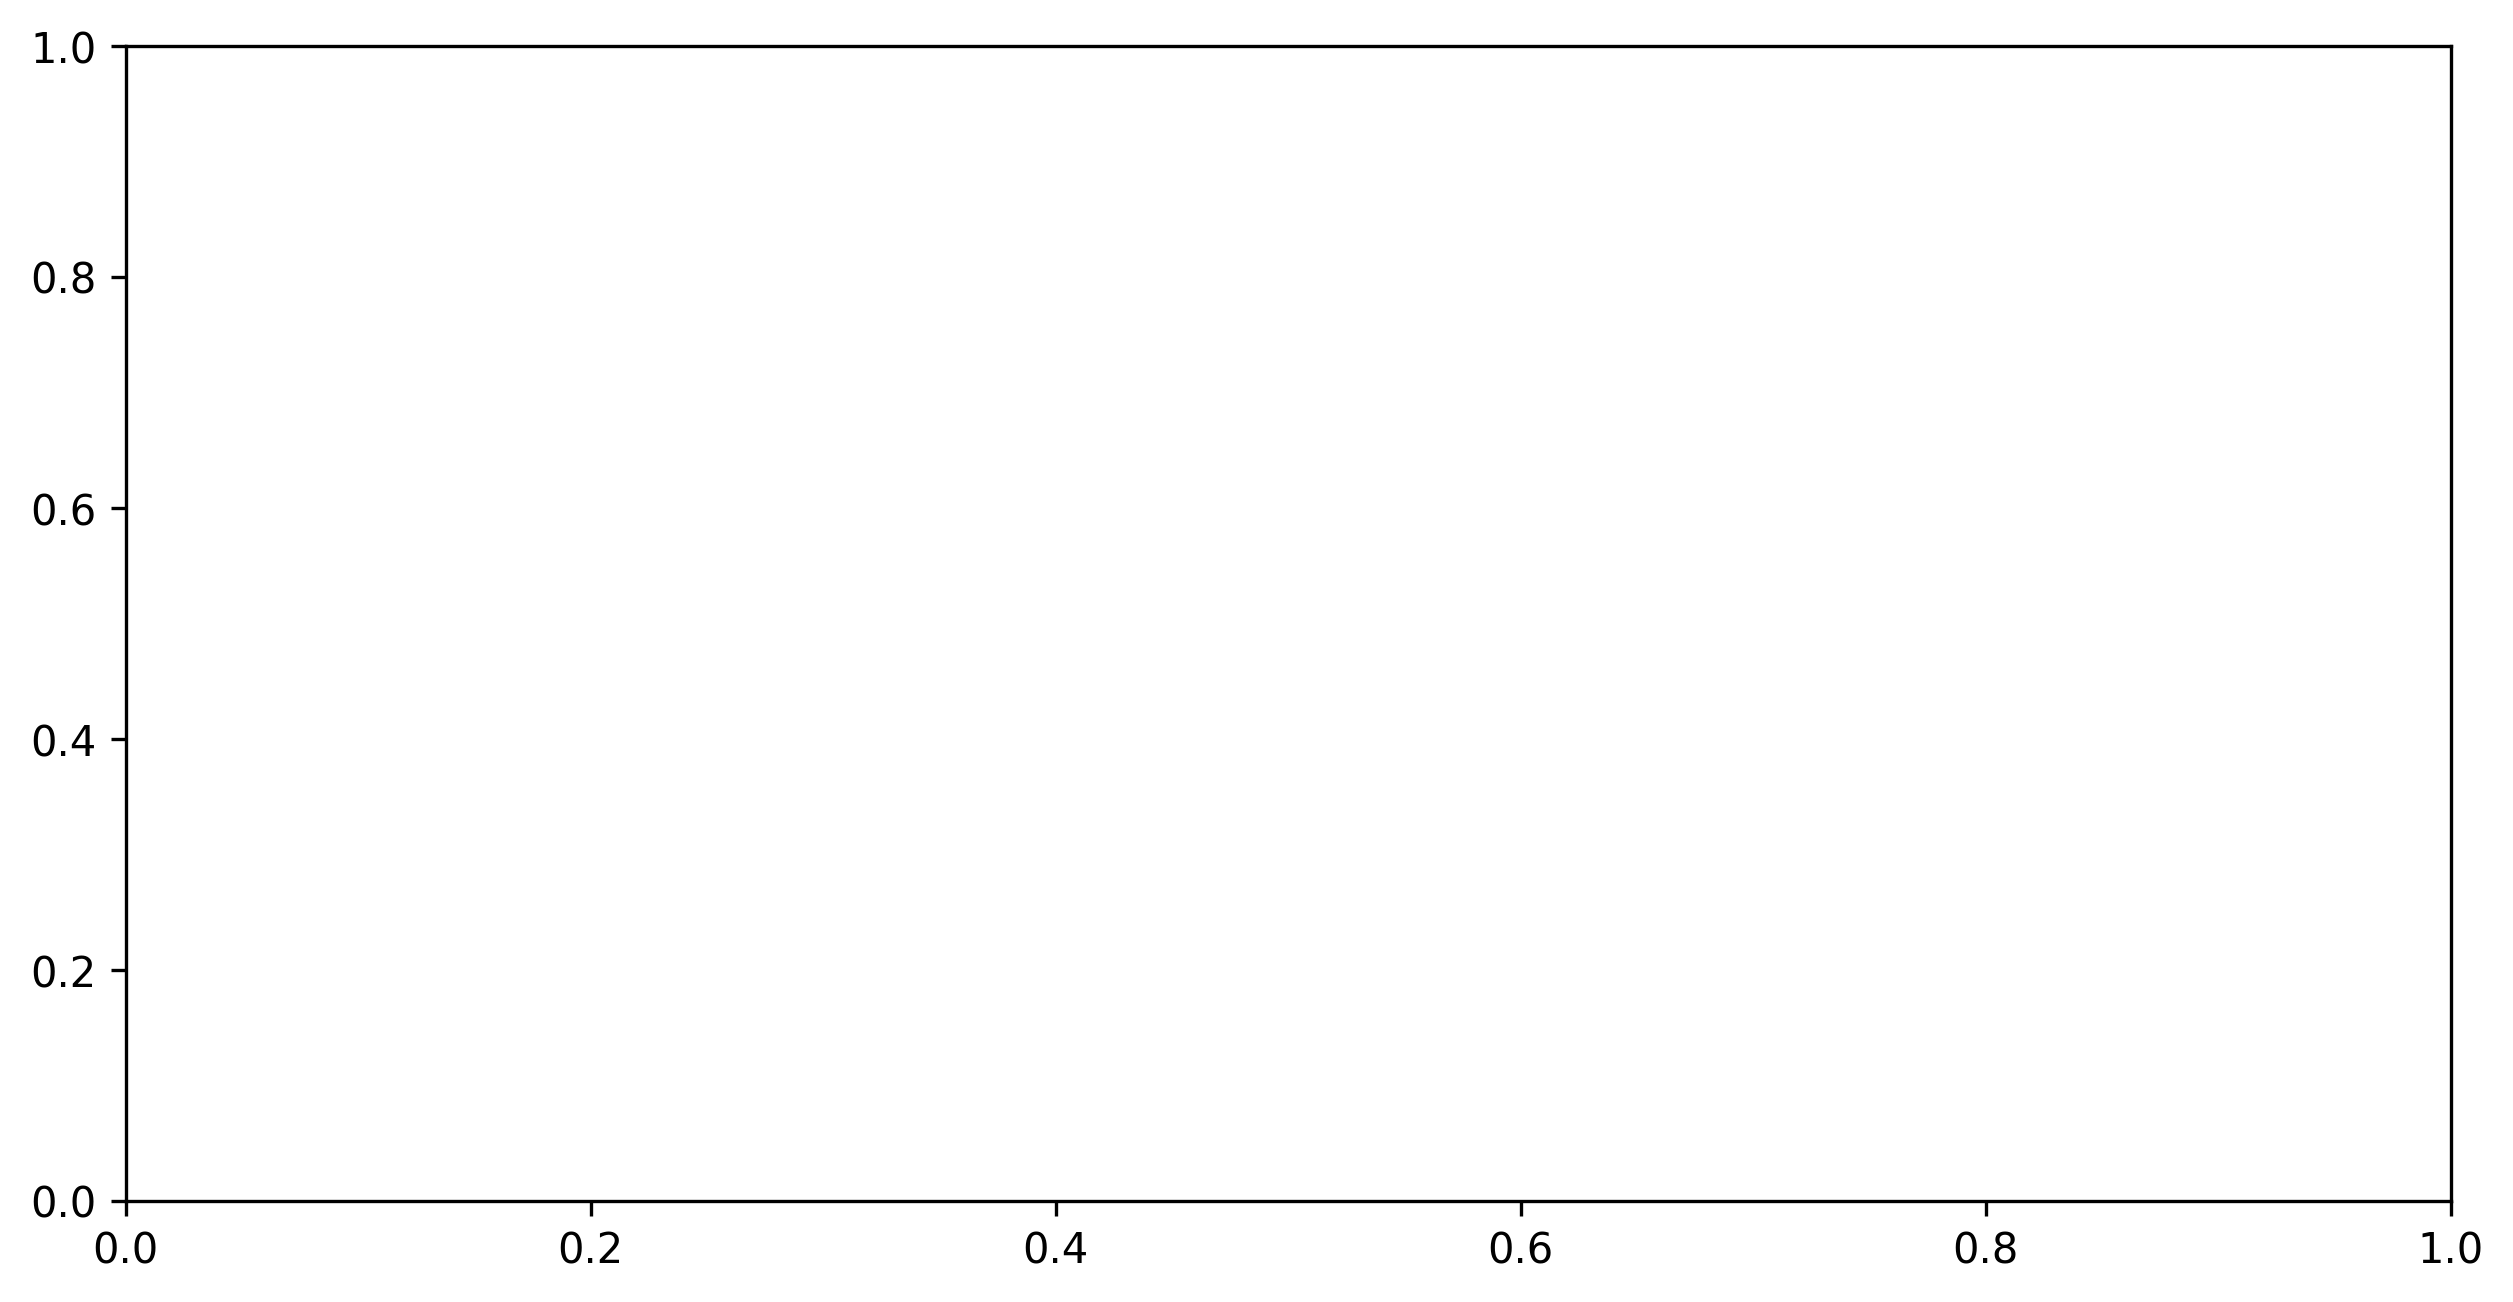

In [18]:
fig

> **Truco**
>
>Suele ser habitual encontrar `ax` como nombre de variable de axes devuelto por la función `add_subplot()`.

> **Nota**
>
> La escala por defecto de cada eje va de 0 a 1 con marcas cada 0.2

Ahora vamos a generar 4 marcos sobre los que fijaremos un título identificativo:

In [19]:
fig = plt.figure()

<Figure size 3000x1500 with 0 Axes>

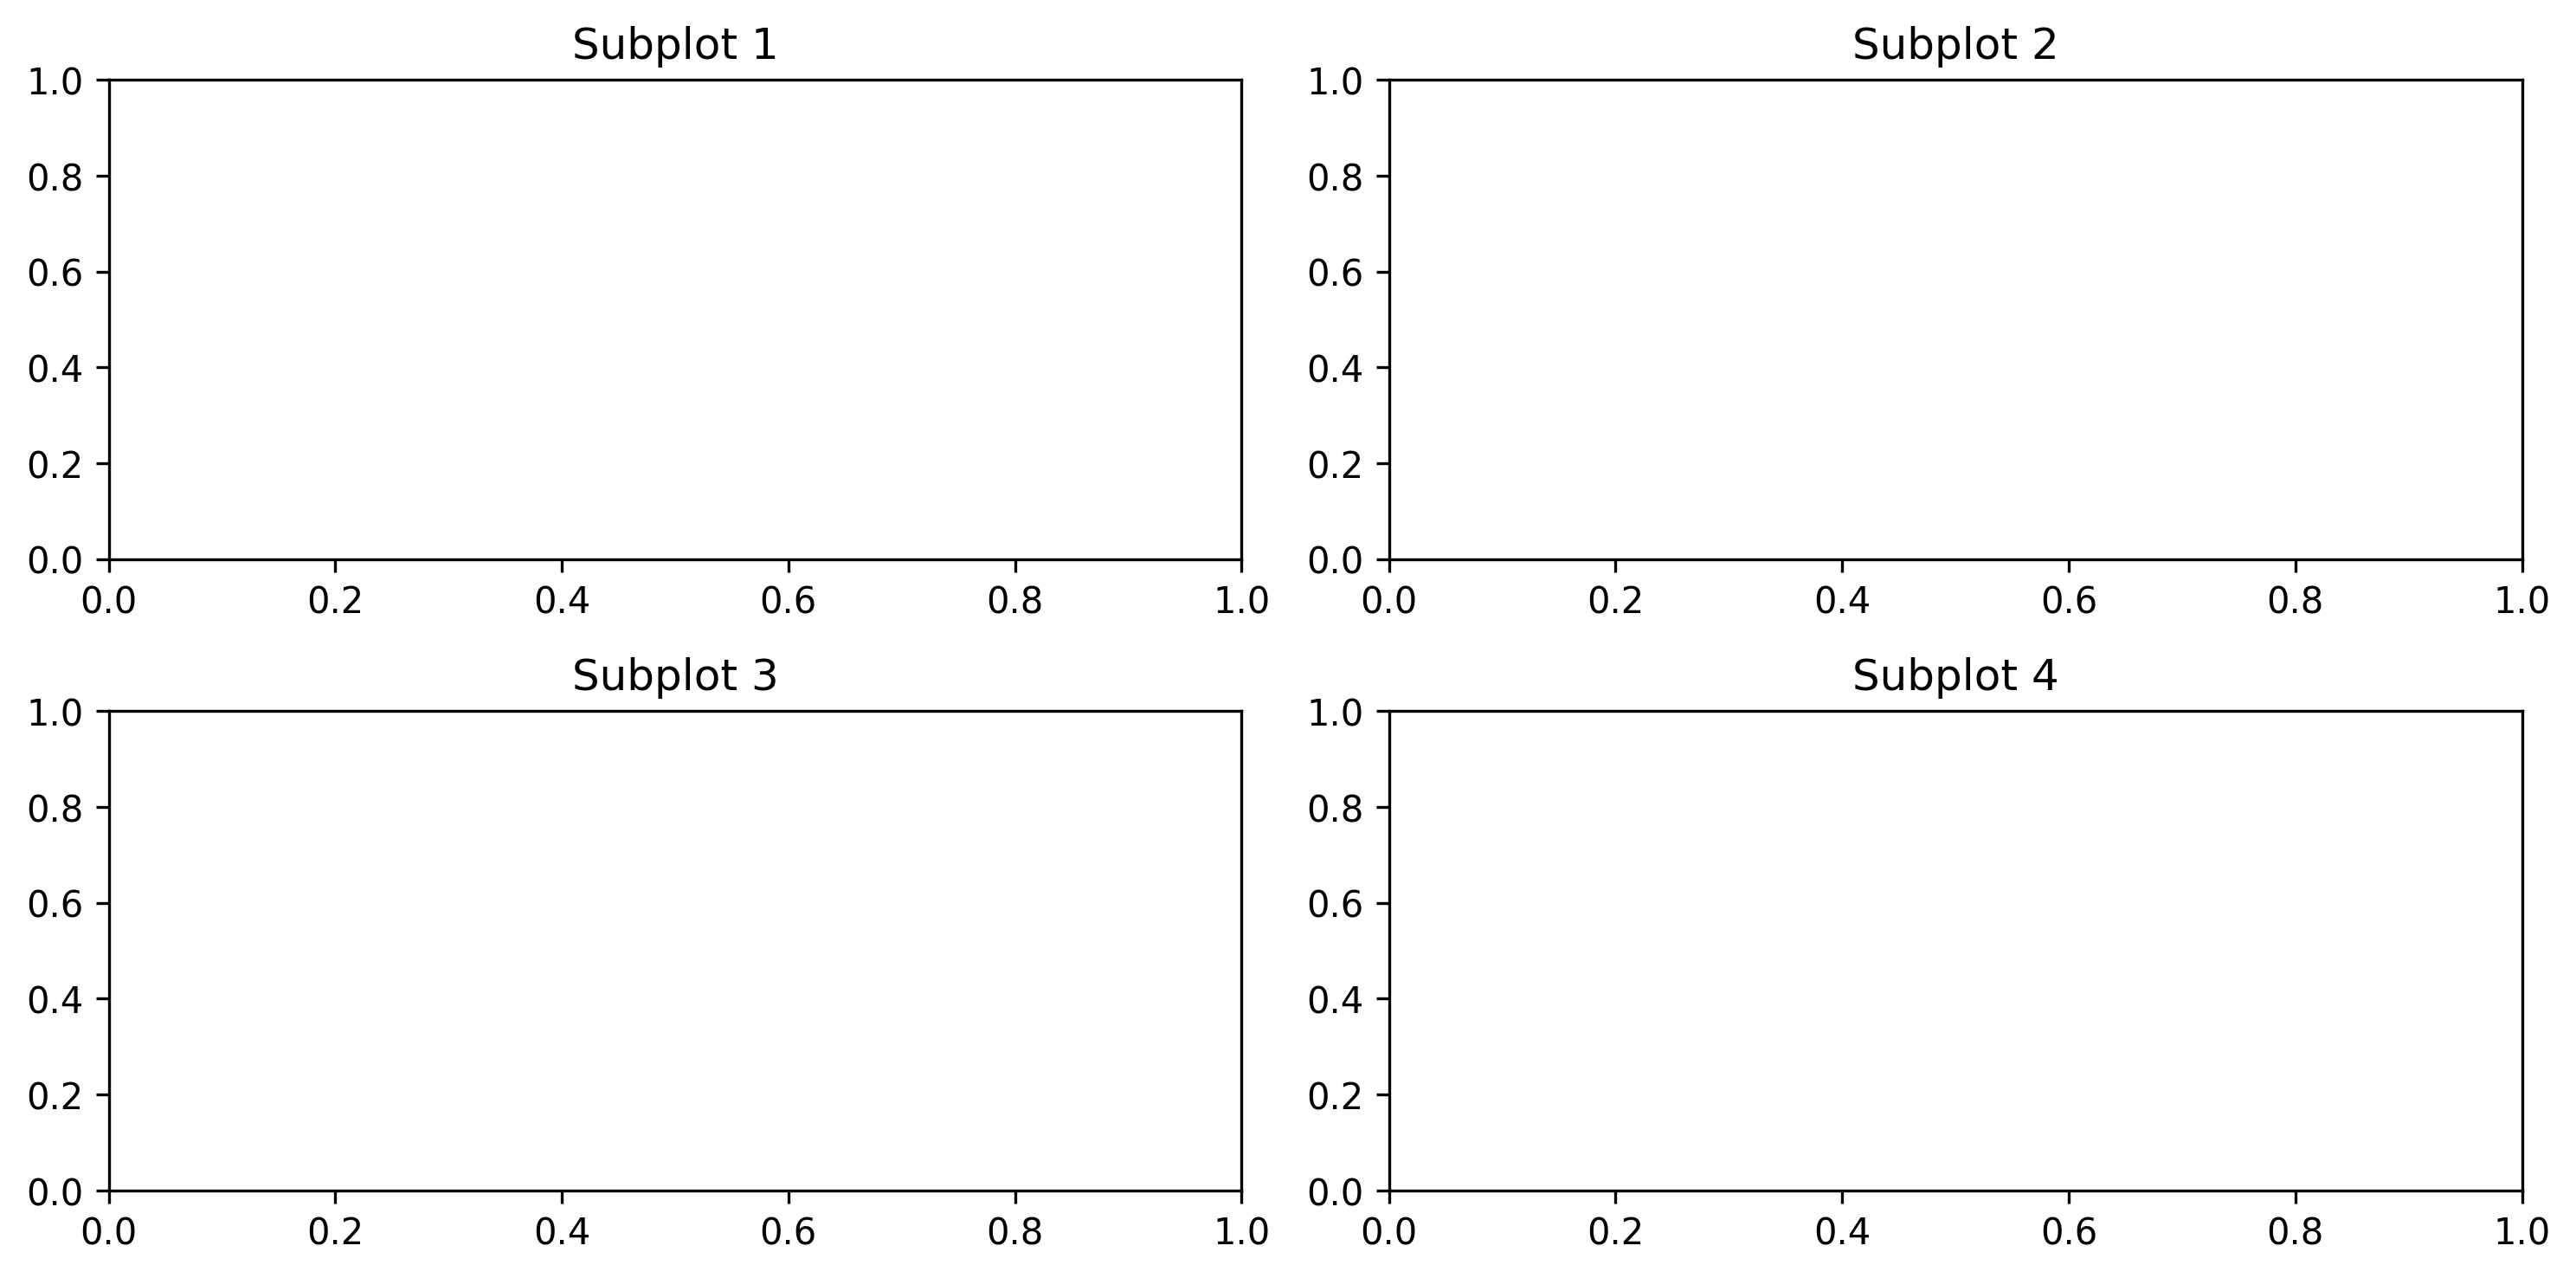

In [20]:
for i in range(1, 5):
  ax = fig.add_subplot(2, 2, i)
  ax.set_title(f'Subplot {i}')

fig.tight_layout(pad = 1) # Sólo para que no se solapen los títulos

fig

### **Atajo para subgráficos**

Matplotlib nos ofrece una forma compacta de crear a la vez tanto la figura como los marcos que necesitemos.

Para ello utilizaremos la función `plt.subplots()` que recibe como parámetros el número de filas y el número de columnas para la disposición de los marcos, y devuelve una tupla con la figura y los marcos.

En el siguiente ejemplo creamos una figura con un único marco:

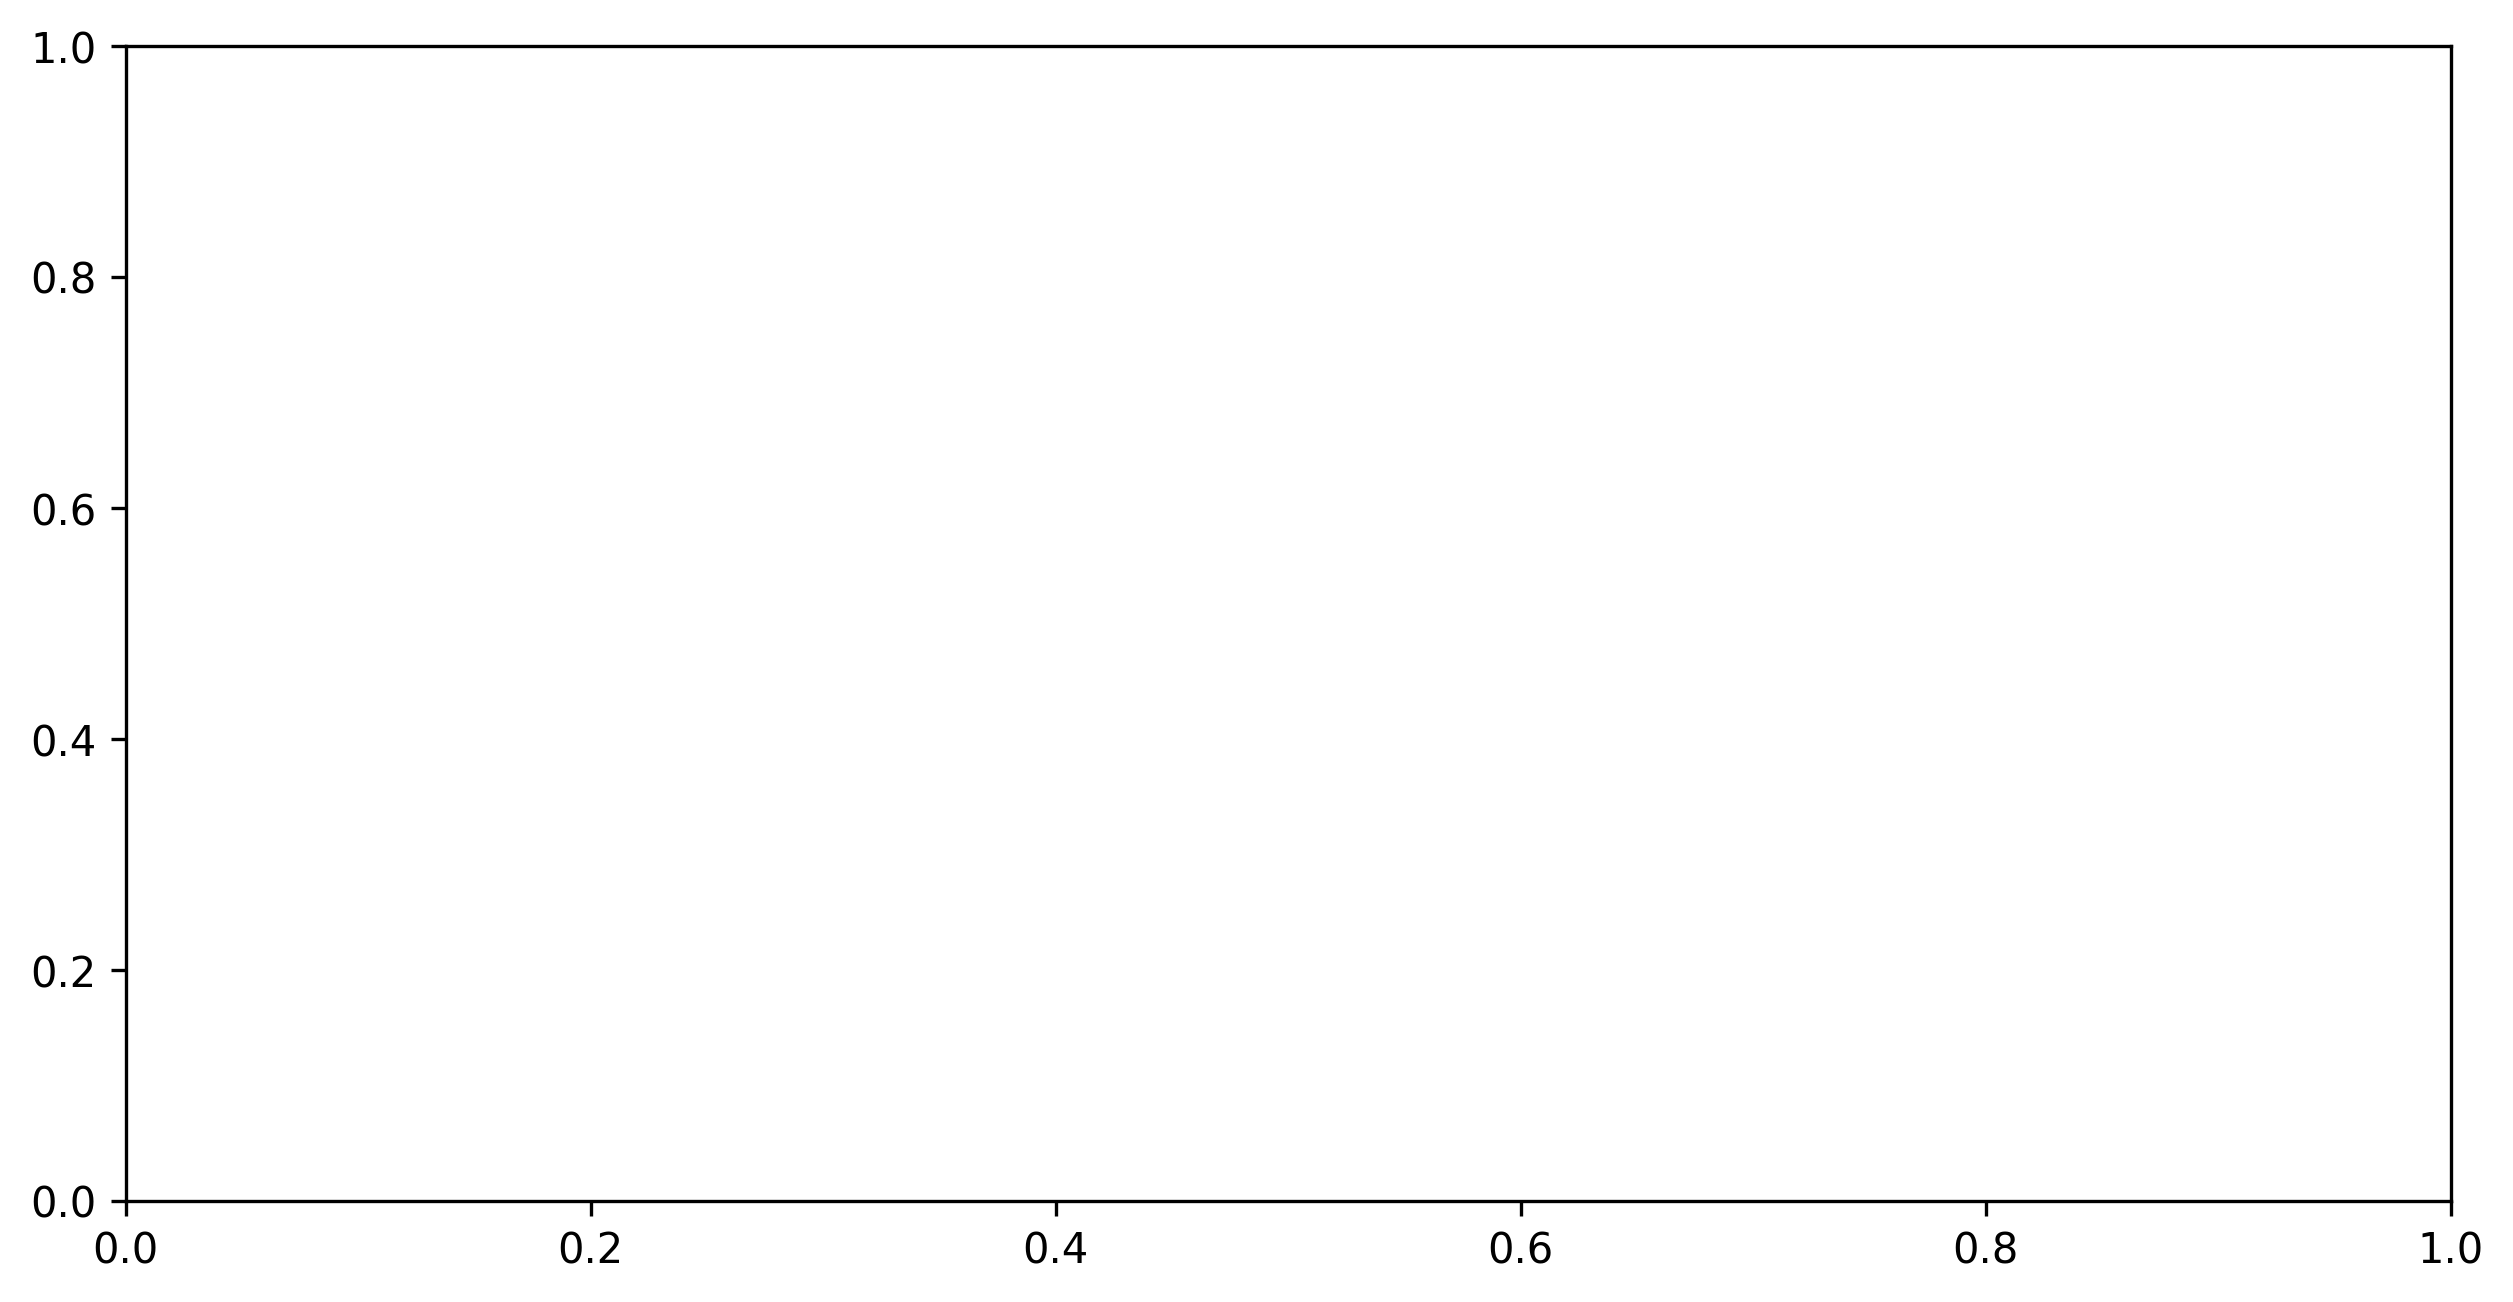

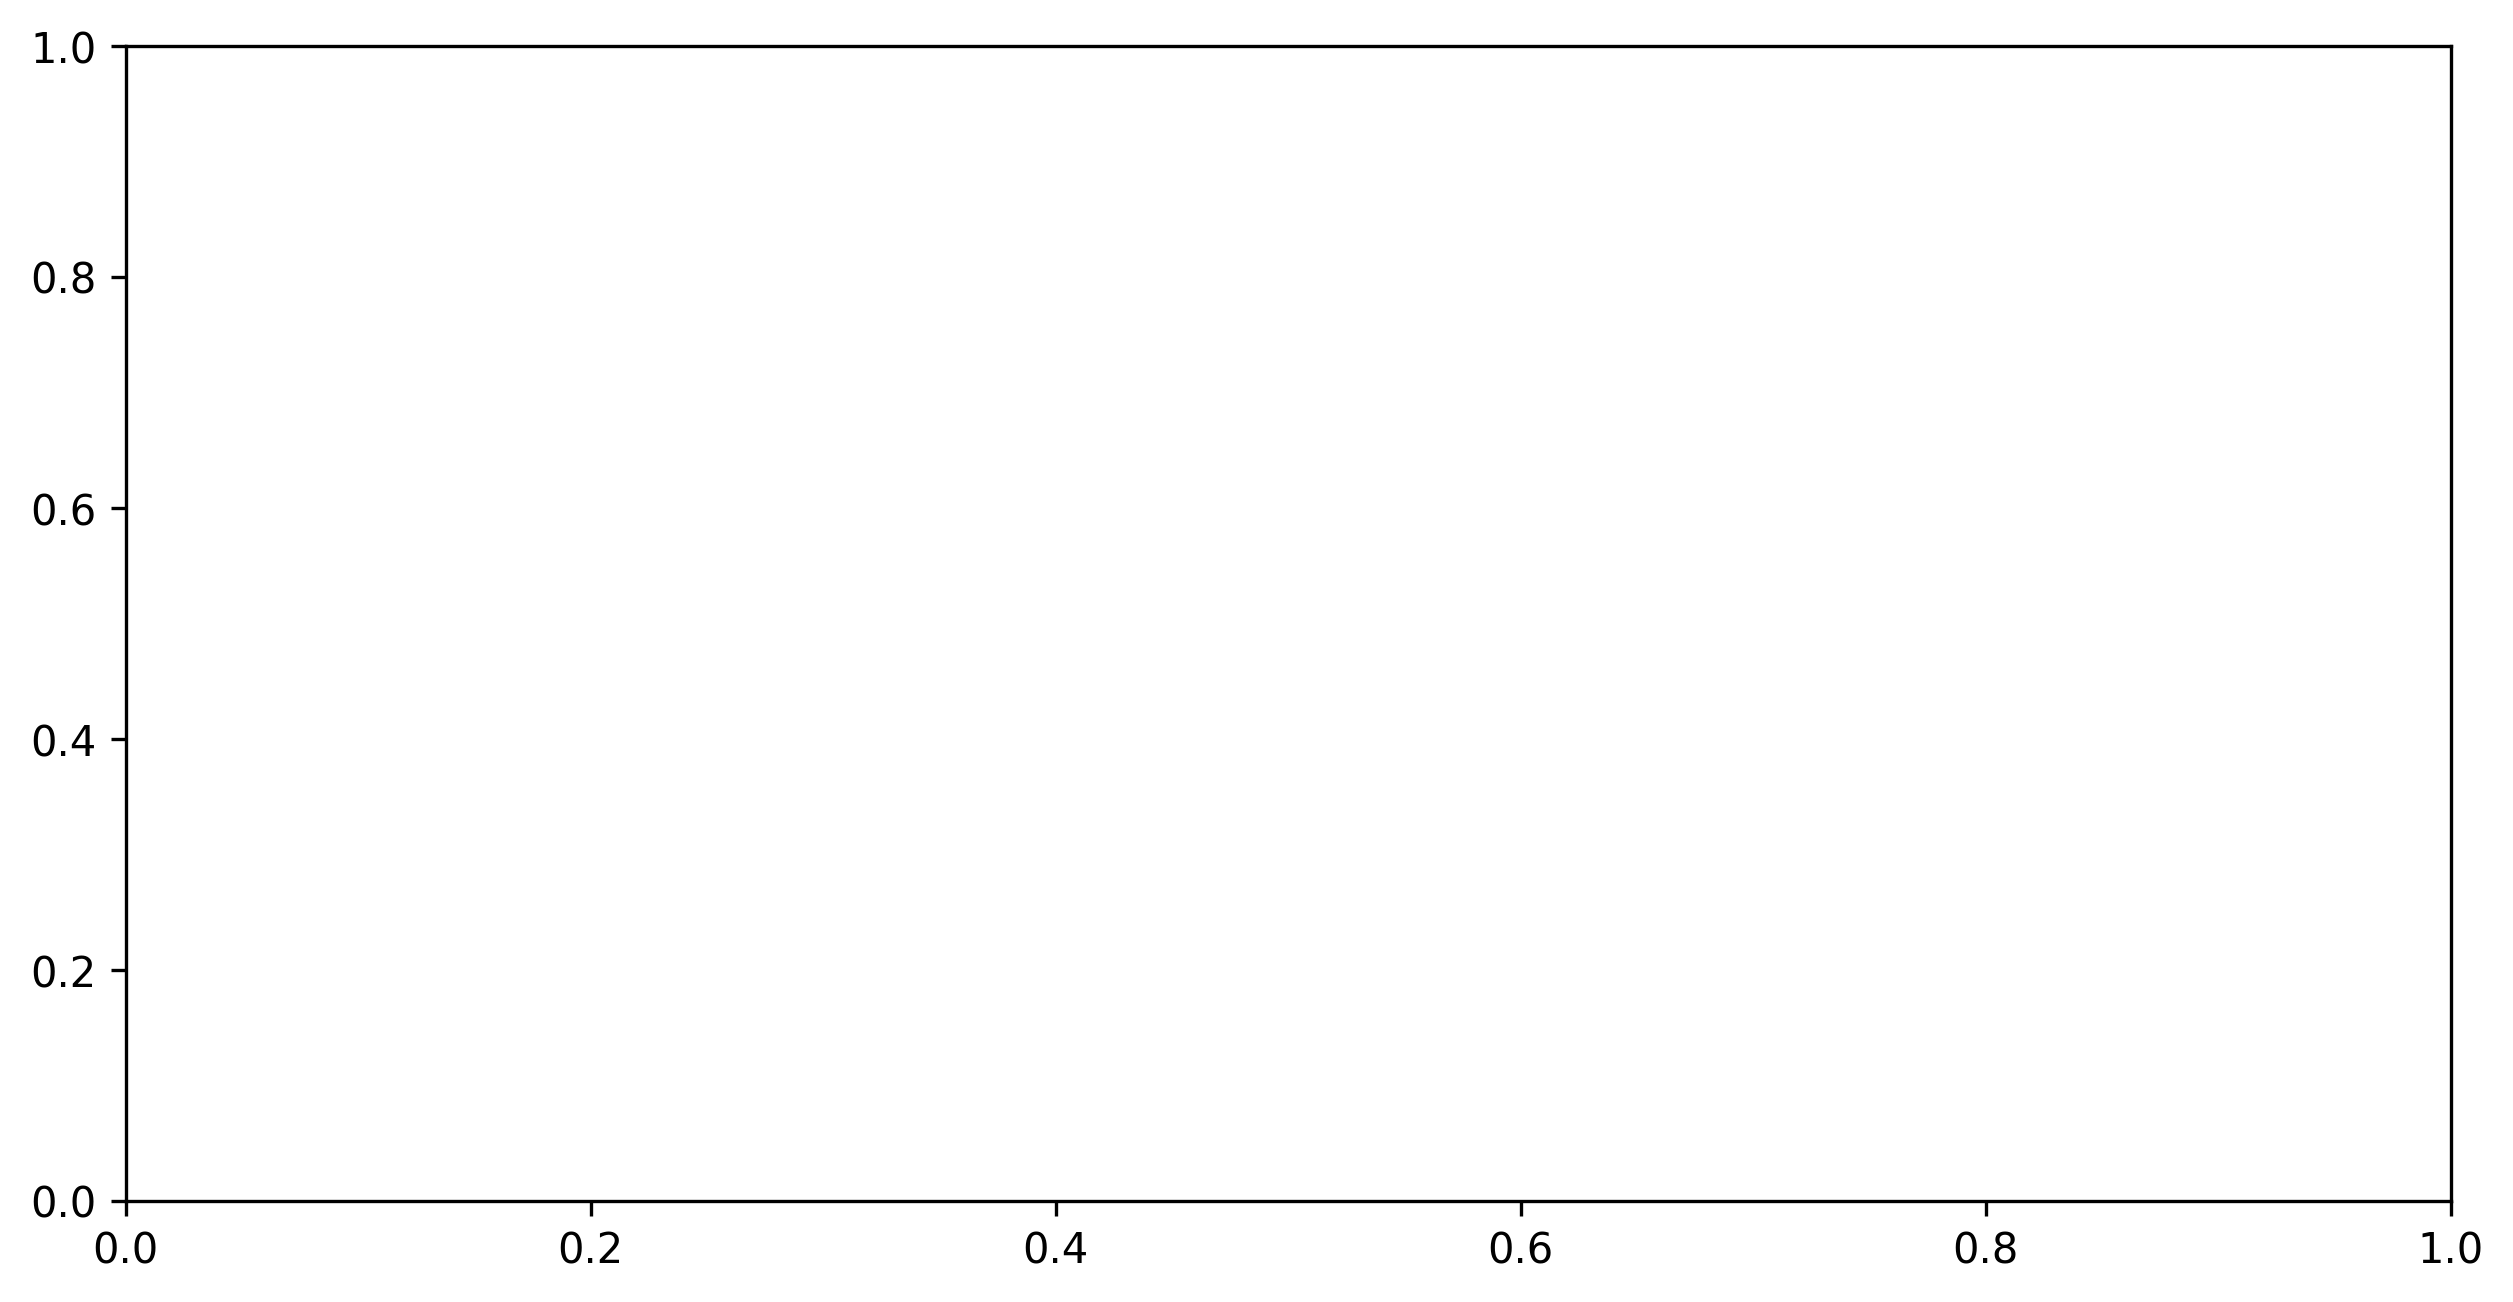

In [21]:
fig, ax = plt.subplots(1, 1)
fig

In [22]:
ax

<Axes: >

> **Truco**
>
> Si invocamos la función `plt.subplots()` sin parámetros, creará (por defecto) un único marco.

En el siguiente ejemplo creamos una figura con 6 marcos en disposición de 2 filas por 3 columnas:

(2, 3)

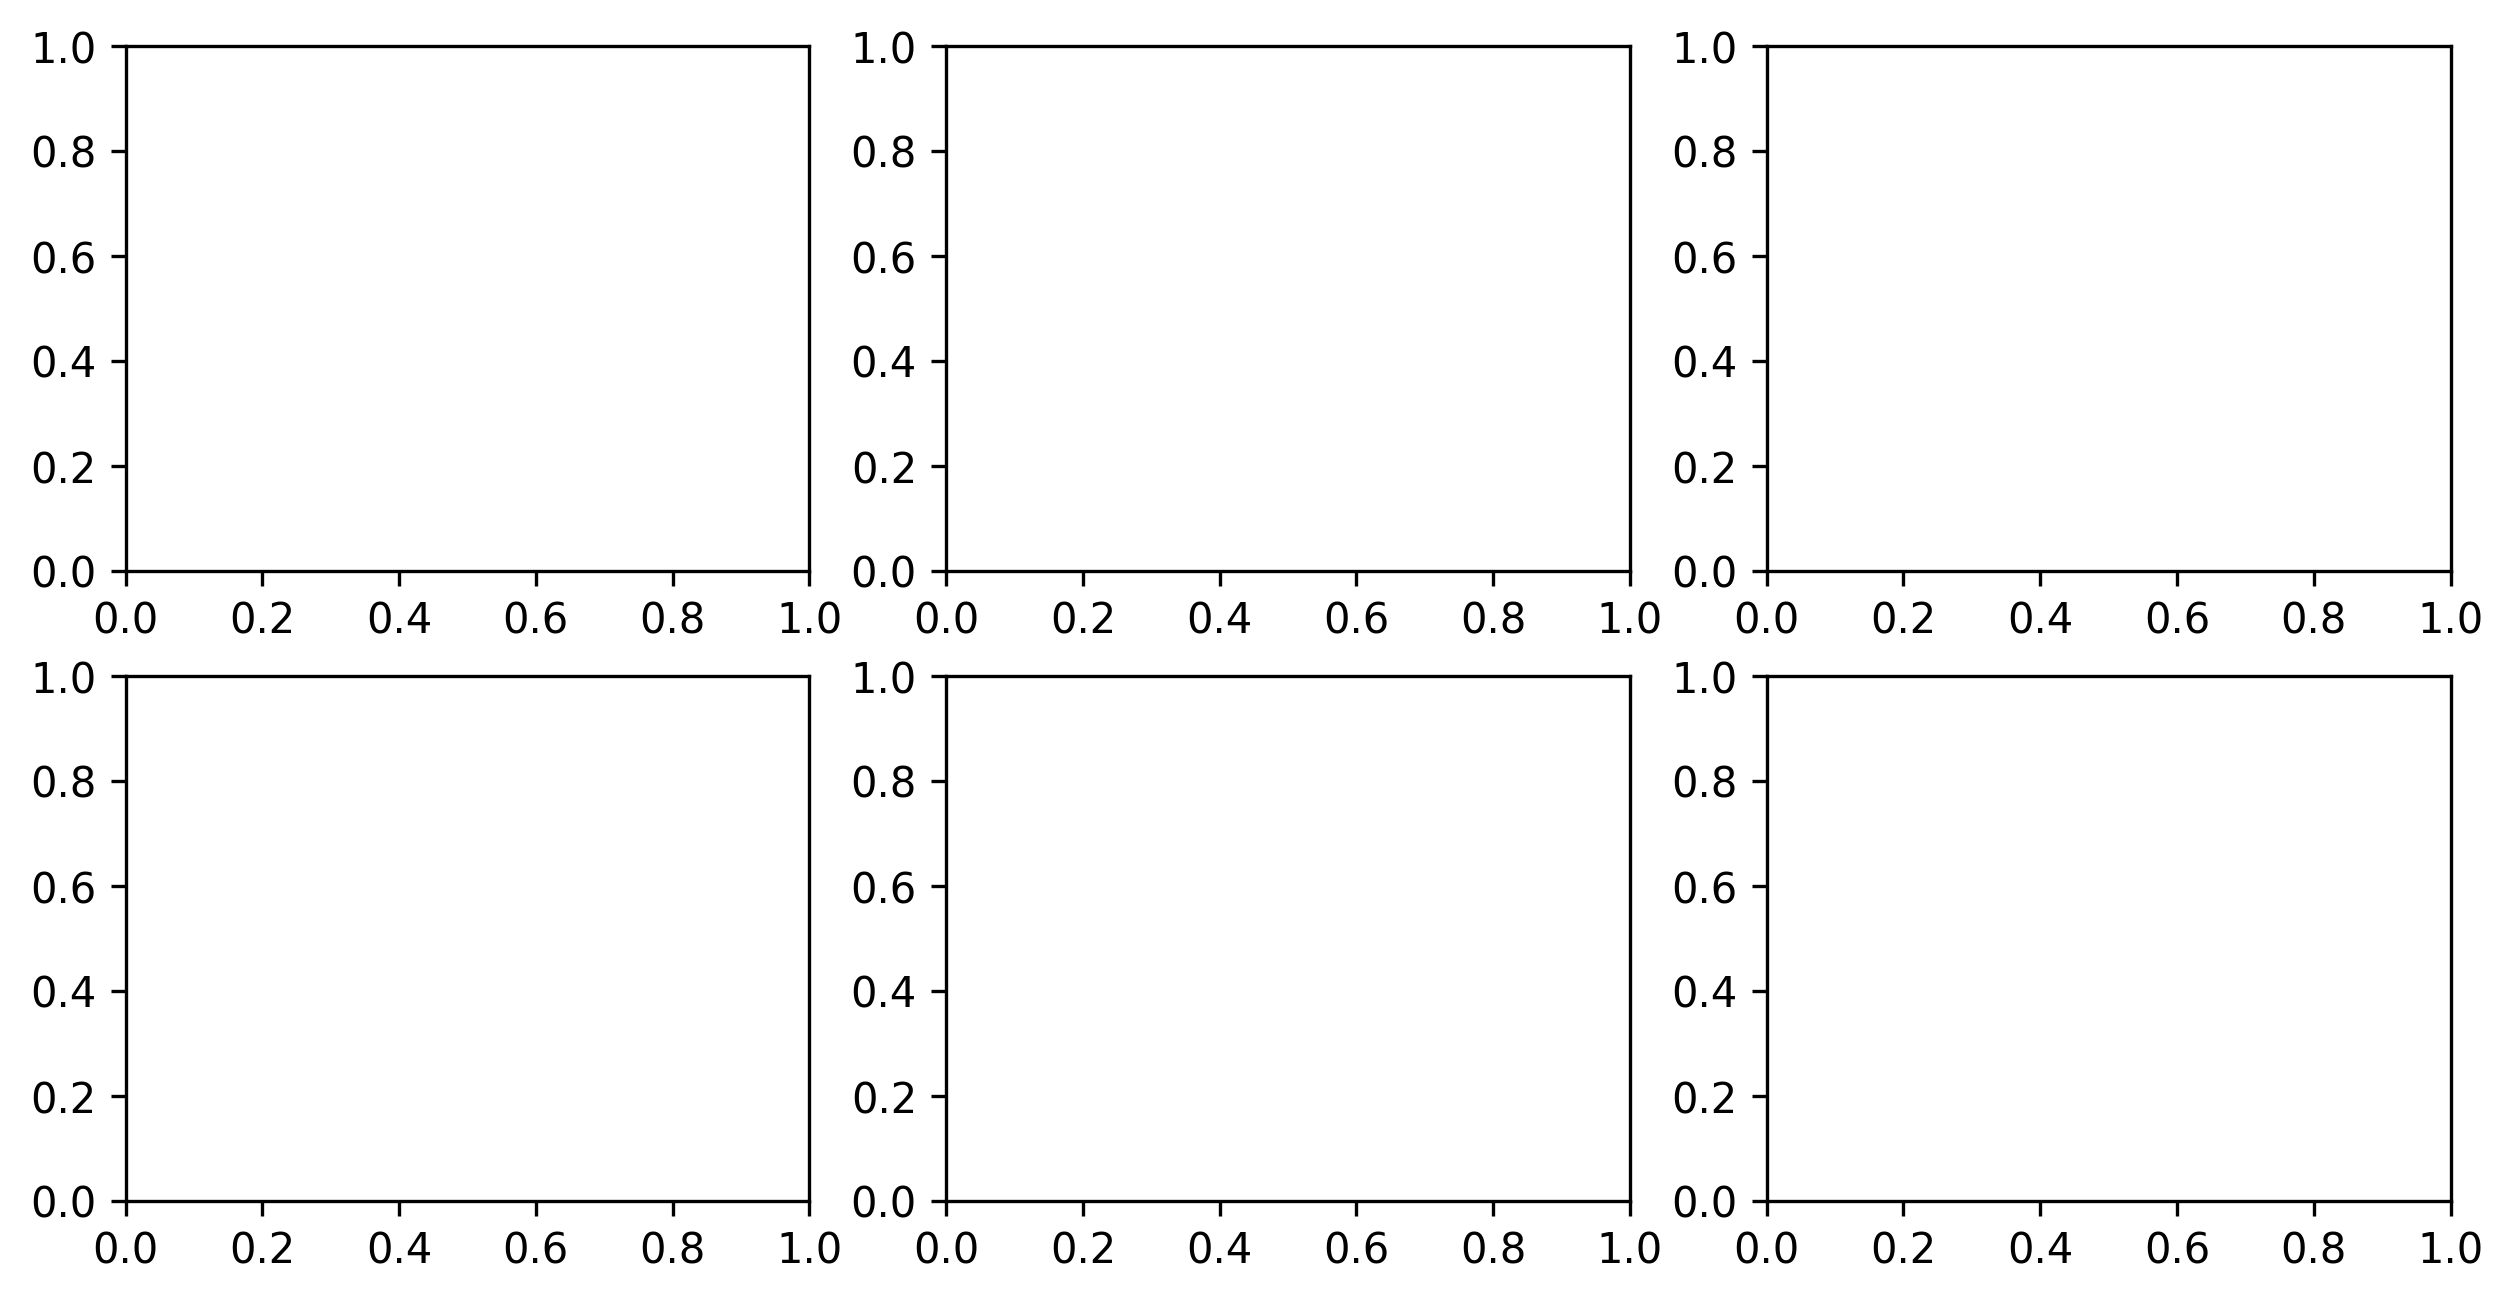

In [24]:
fig, ax = plt.subplots(2, 3)
fig
ax
ax.shape

> **Nota**
>
> Se podría ver la función `subplots()` como una combinación de `figure() + add_subplot()`.

### **Etiquetas**

Dentro de un marco también es posible fijar las etiquetas de los ejes (X e Y). Veamos cómo hacerlo:

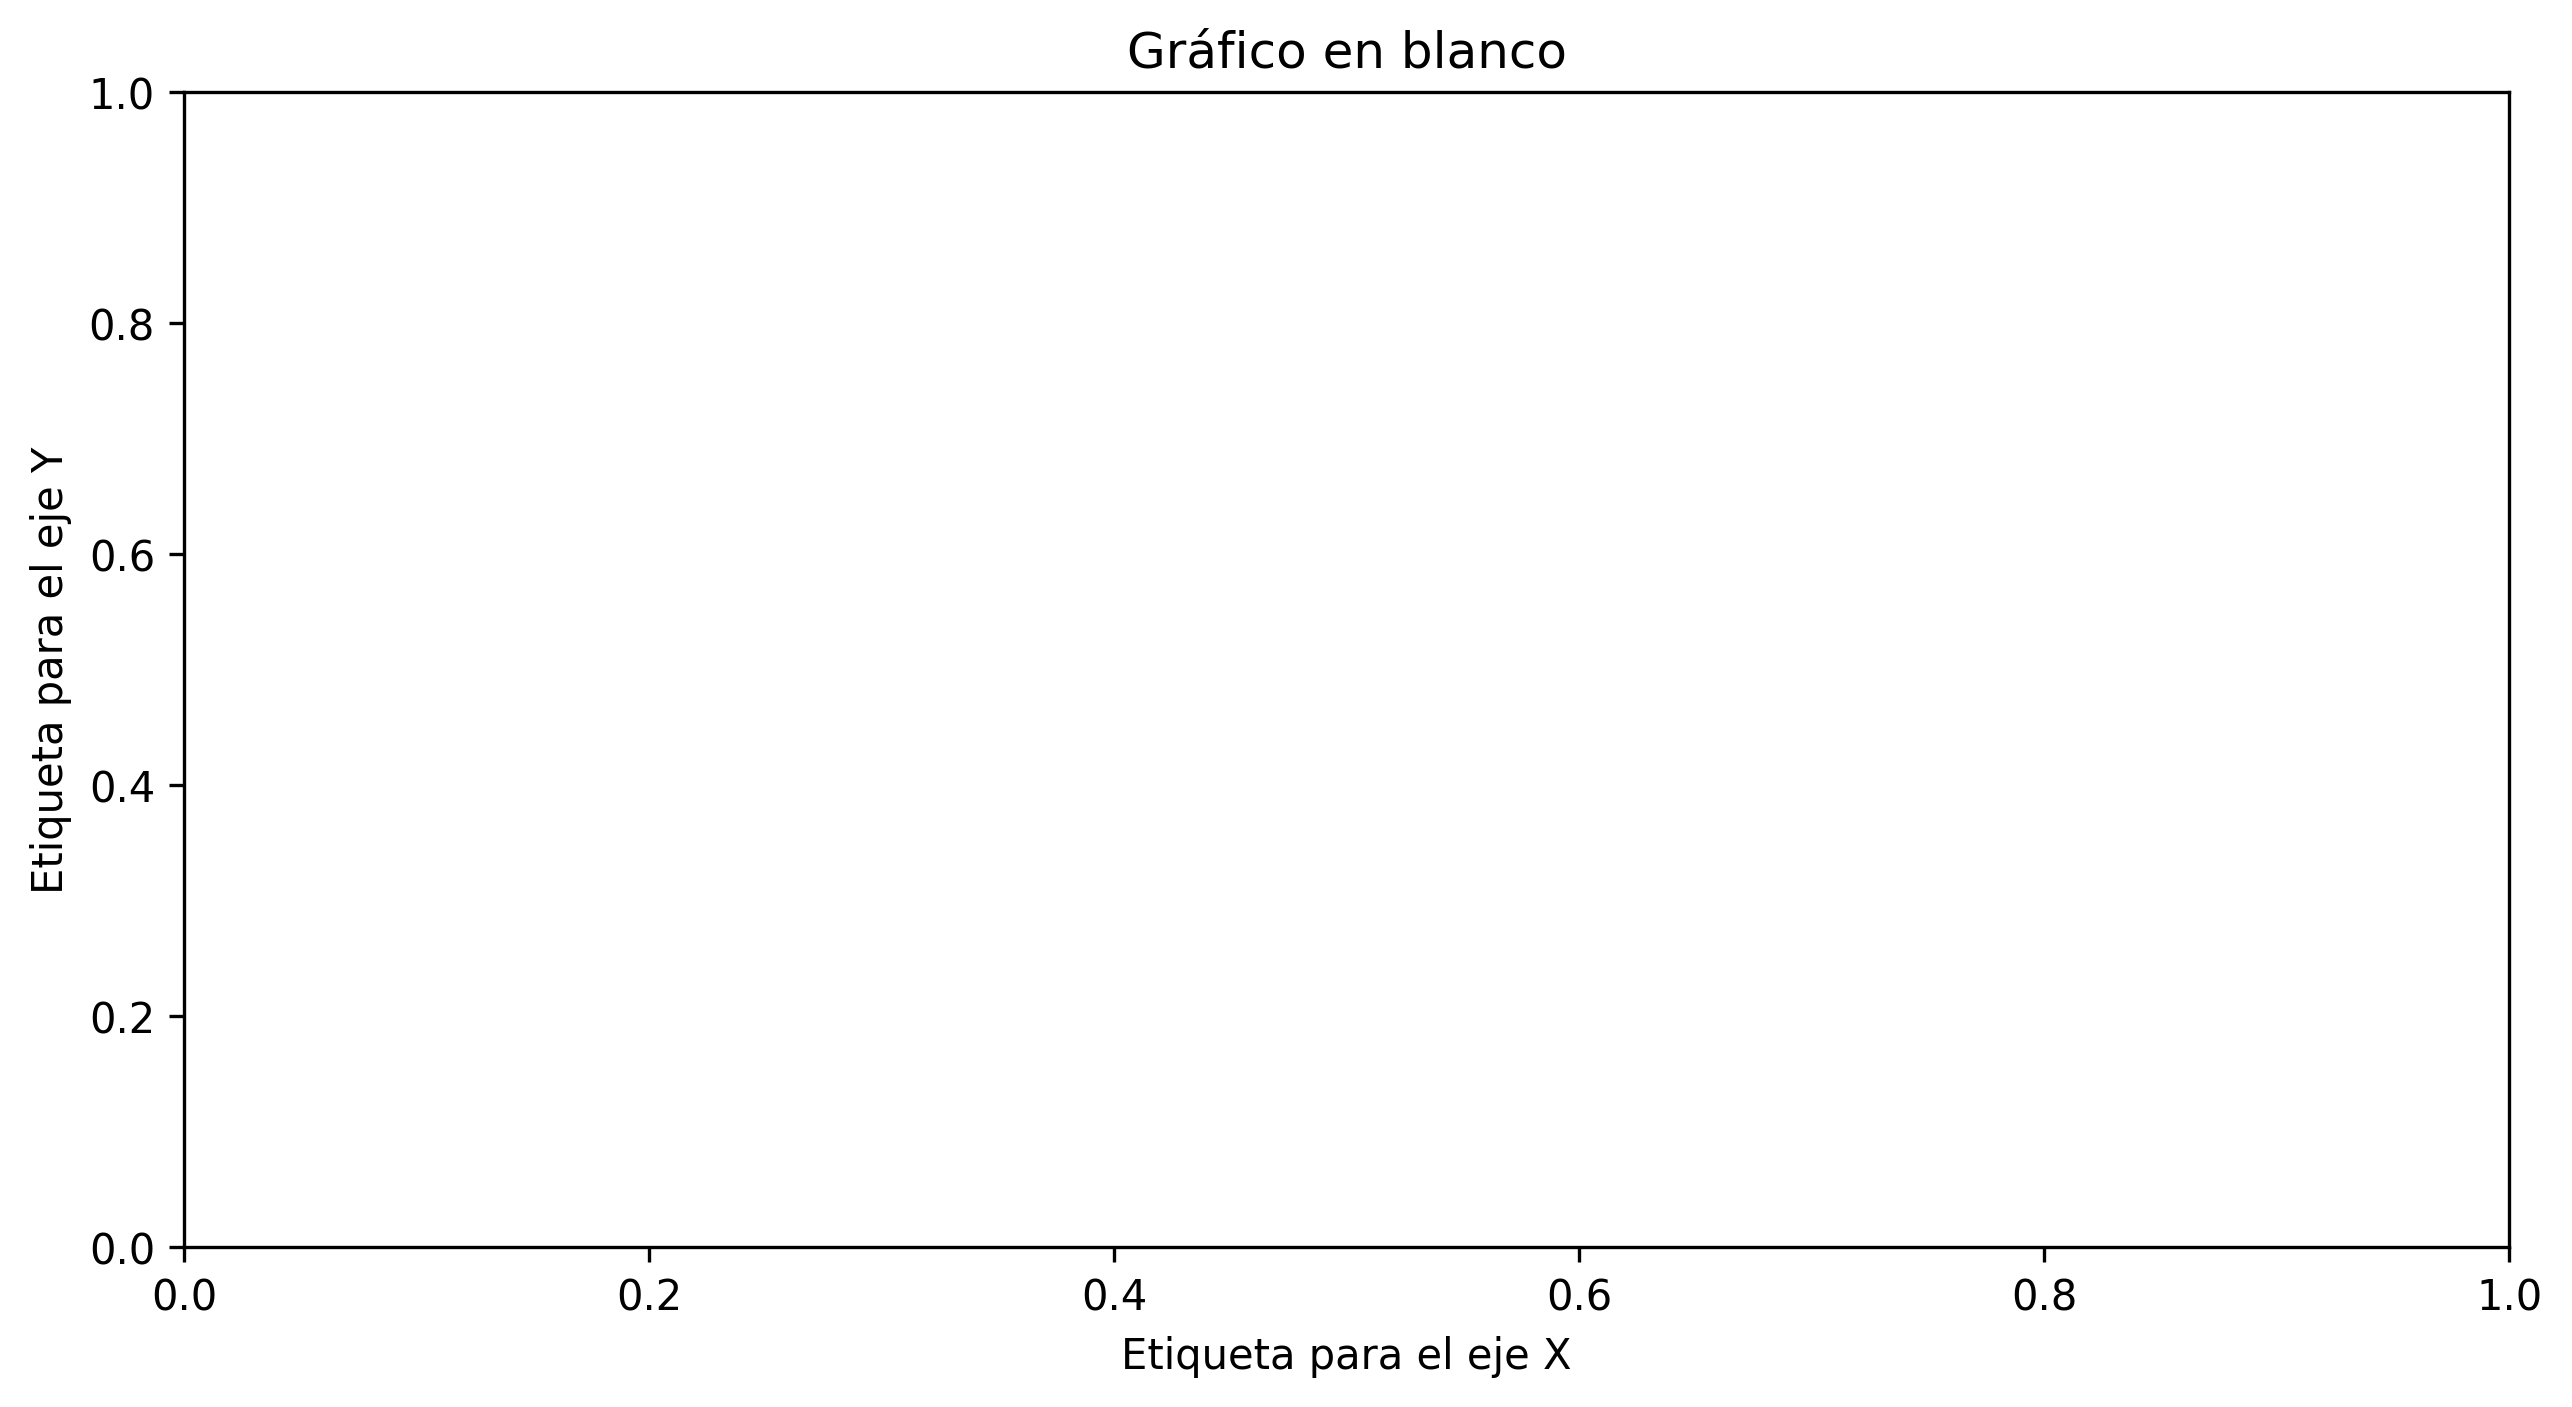

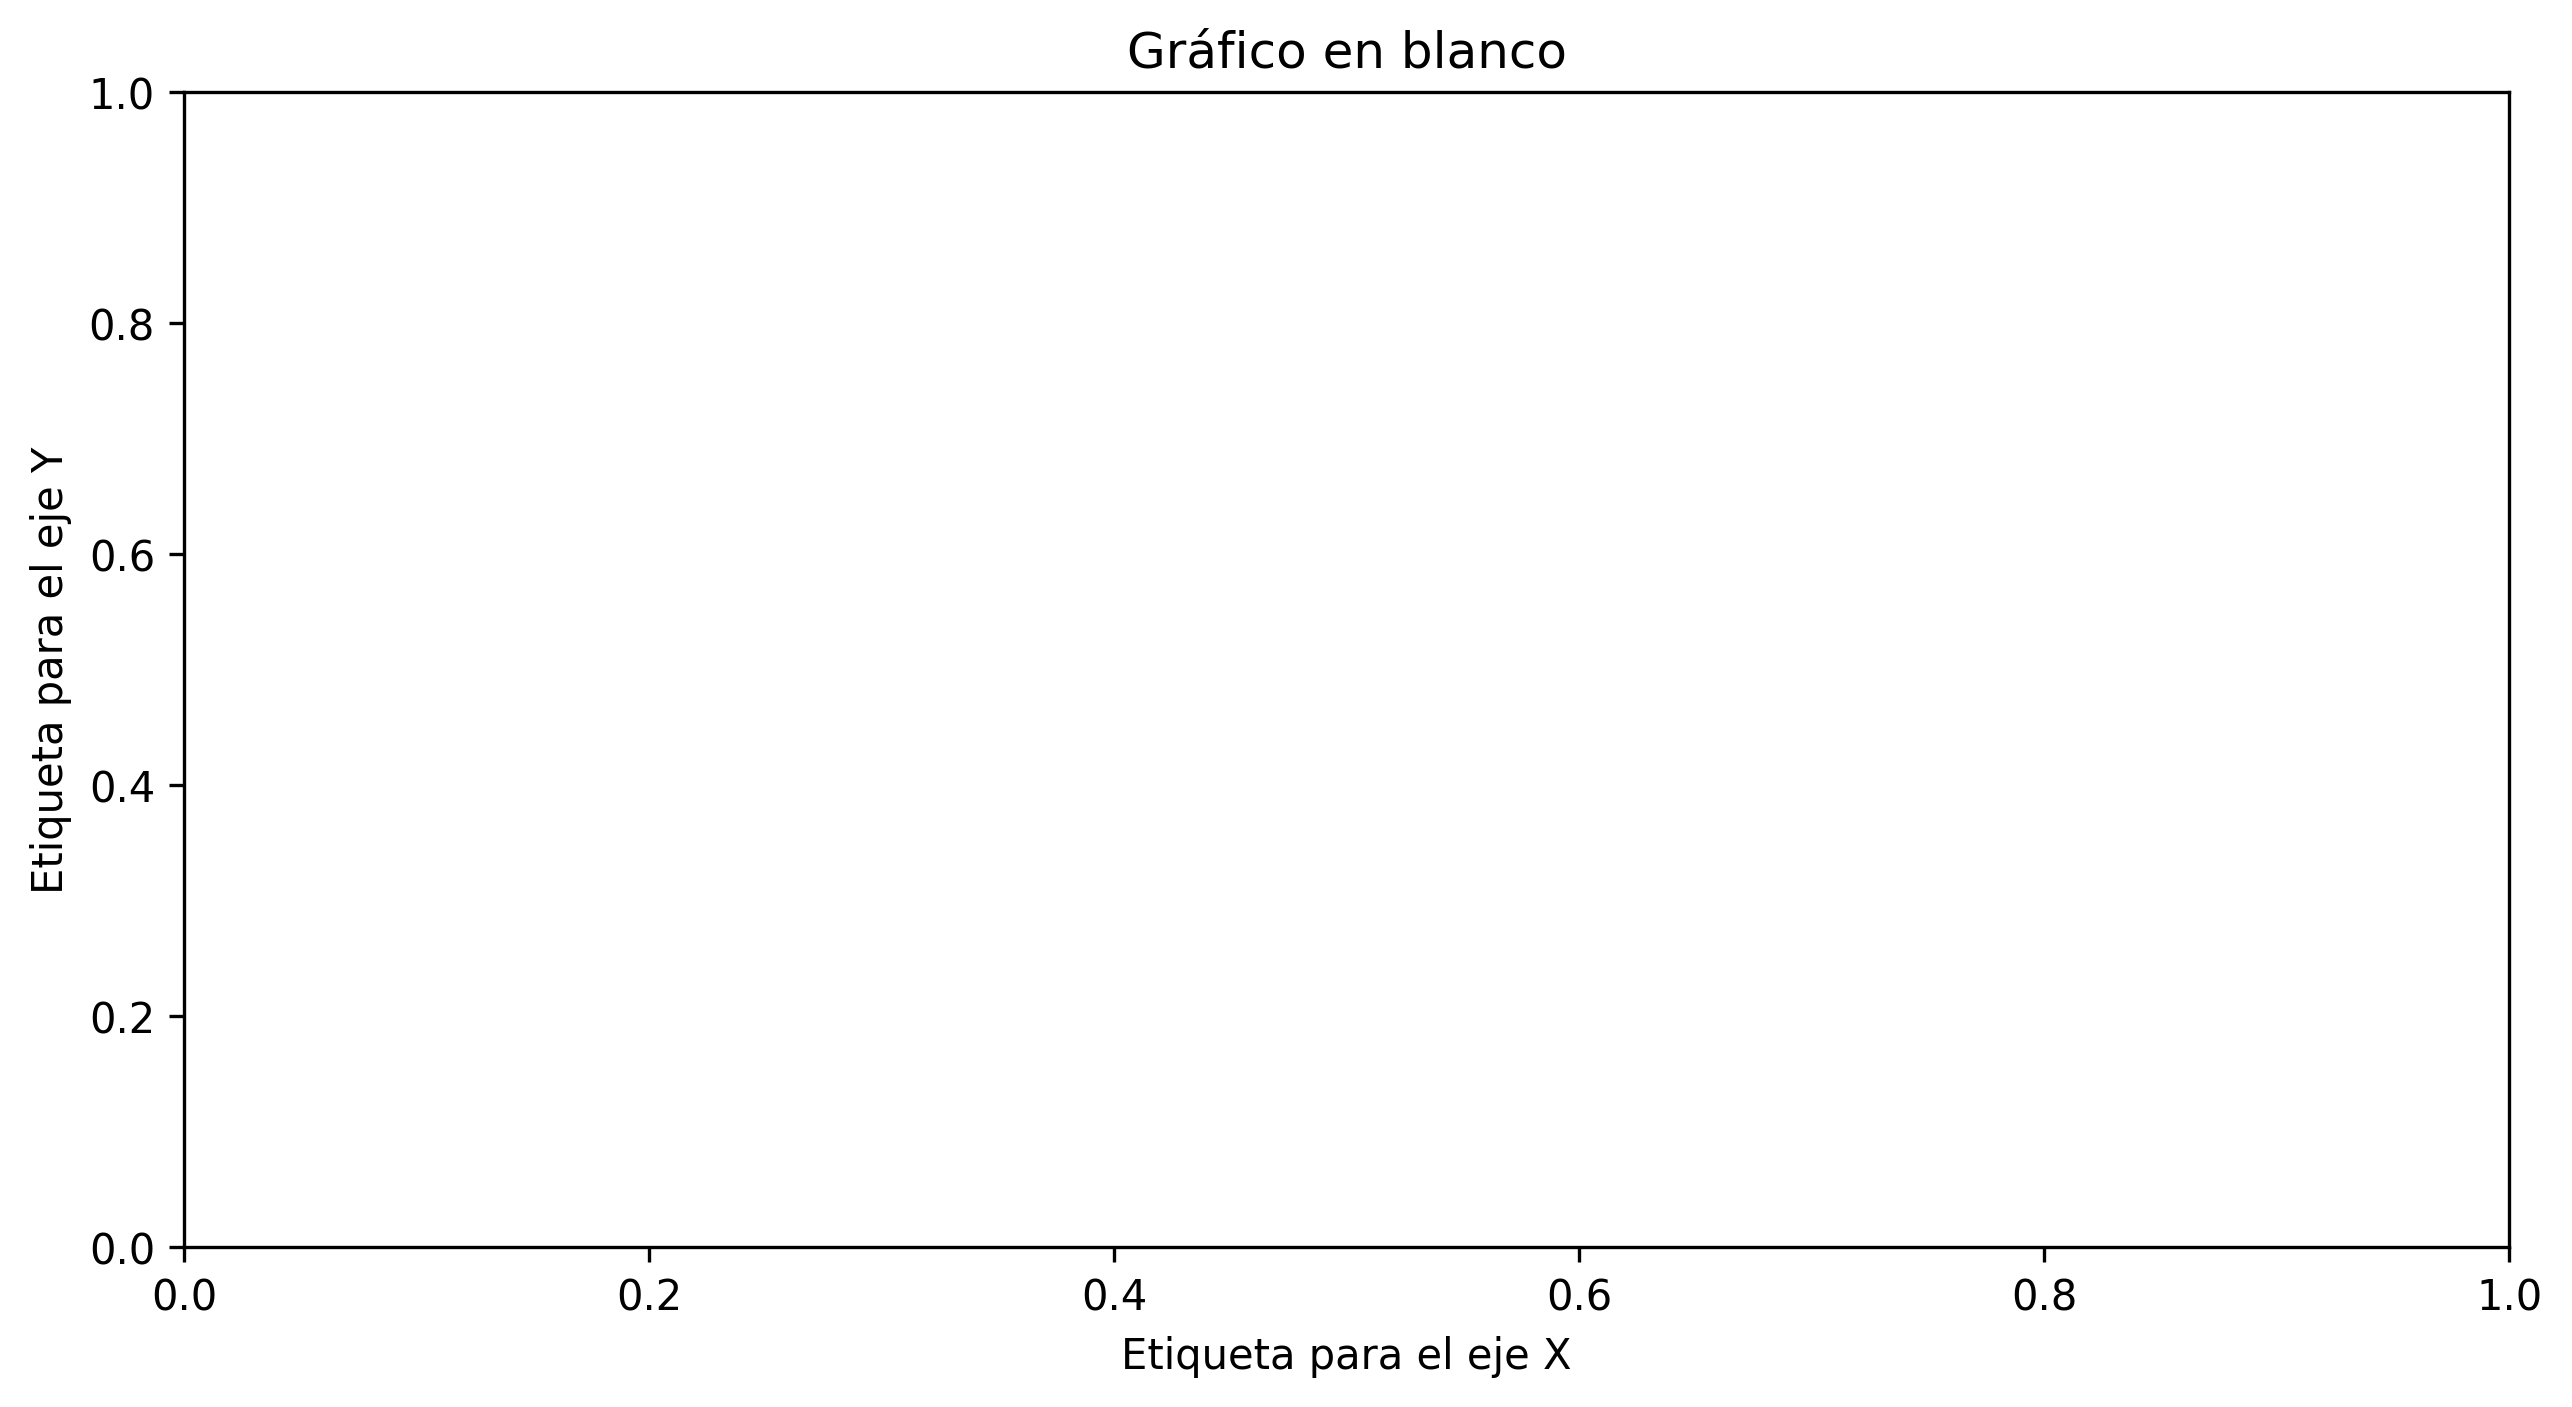

In [25]:
fig, ax = plt.subplots()
ax.set_title('Gráfico en blanco')
ax.set_xlabel('Etiqueta para el eje X')
ax.set_ylabel('Etiqueta para el eje Y')
fig

### **Ejes**

Un marco (2D) está compuesto por dos ejes: eje X e eje Y. Podemos acceder a cada eje mediante sendos atributos:

In [27]:
ax.xaxis

In [28]:
ax.yaxis

**Rejilla**

En cada eje podemos activar o desactivar la rejilla, así como indicar su estilo.

En primer lugar vamos a activar la rejilla en ambos ejes:

In [29]:
ax.xaxis.grid(True)
ax.yaxis.grid(True)

Esto sería equivalente a:

In [30]:
ax.grid(True)

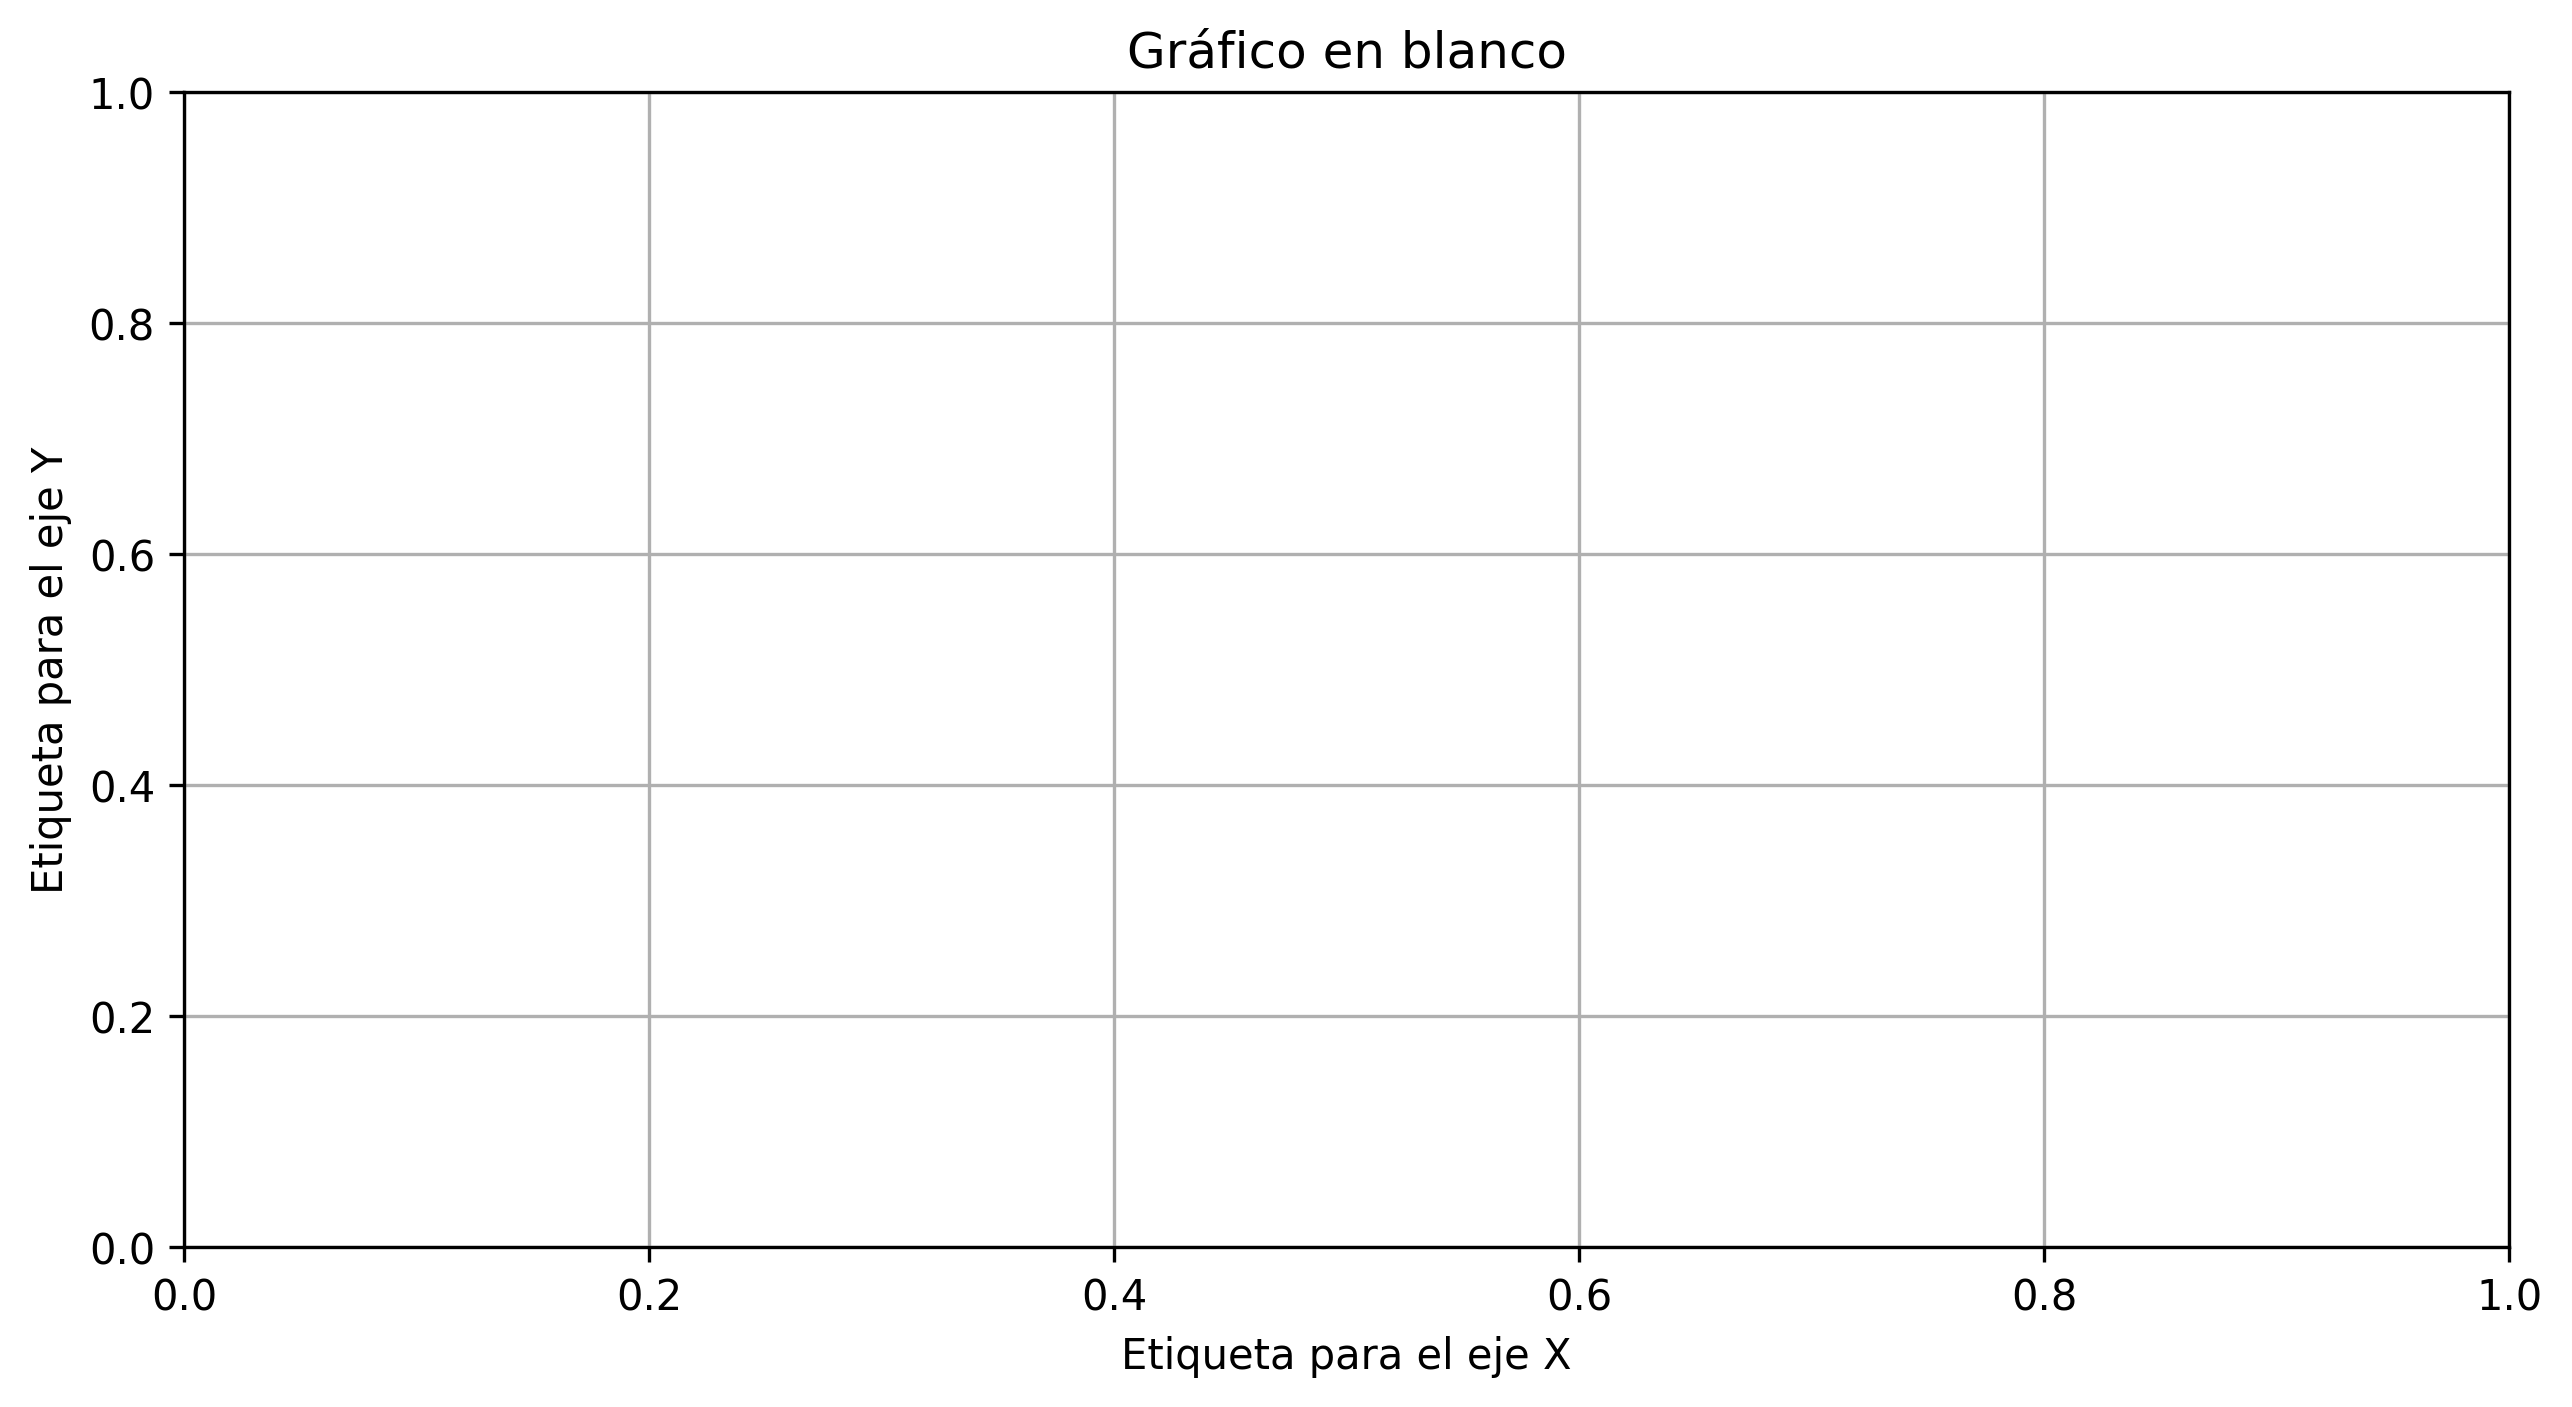

In [31]:
fig

> **Truco**
>
> Las funciones de matplotlib que actúan como «interruptores» tienen por defecto el valor verdadero. En este sentido `ax.grid()` invocada sin parámetros hace que se muestre la rejilla. Esto se puede aplicar a muchas otras funciones.

Supongamos ahora que queremos personalizar la rejilla con estilos diferentes en cada eje:

In [32]:
ax.xaxis.grid(color='r', linestyle='-')  # equivale a color='red',  linestyle='solid'
ax.yaxis.grid(color='b', linestyle='-')  # equivale a color='blue', linestyle='solid'

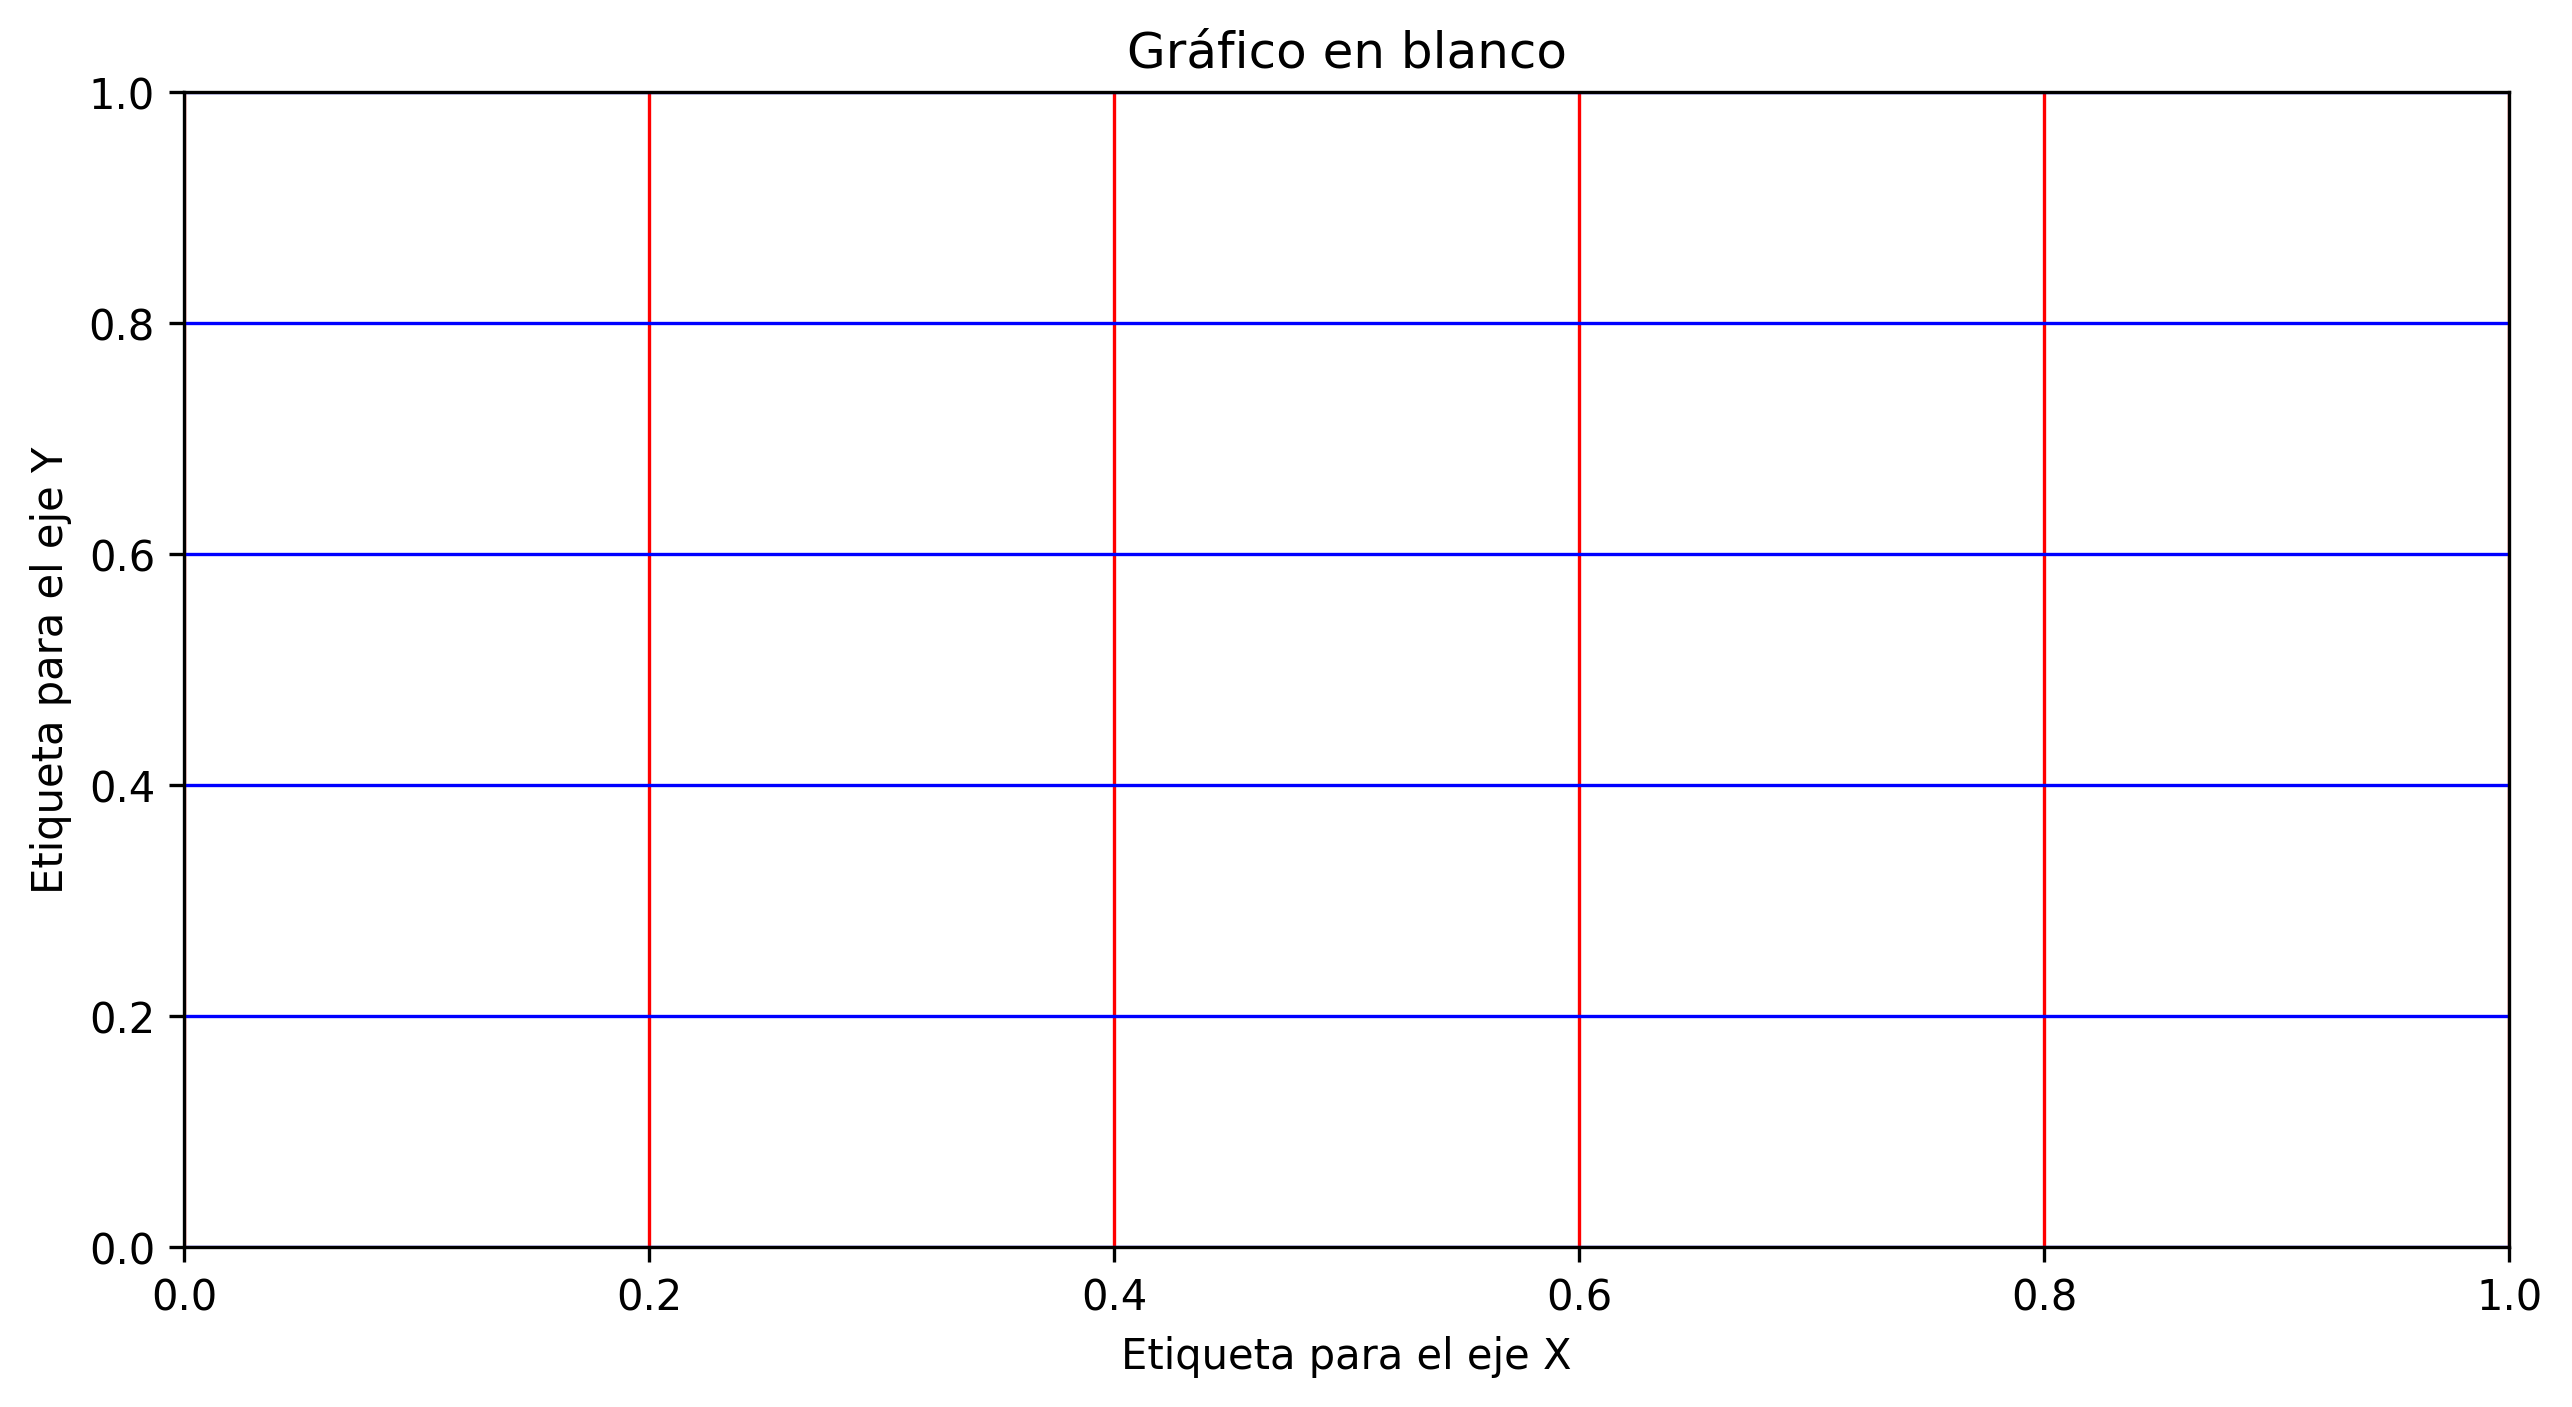

In [33]:
fig

* Parámetros disponibles para creación del grid.
* Listado de nombres de colores en matplotlib.
* Estilos de línea en matplotlib.

**Marcas**

Por defecto, los ejes del marco tiene unas marcas equiespaciadas que constituyen las marcas mayores. Igualemente existen unas marcas menores que, a priori, no están activadas.

Ambos elementos son susceptibles de modificarse. Veamos un ejemplo en el que establecemos las marcas menores con distinto espaciado en cada eje y además le damos un estilo diferente a cada rejilla:

In [34]:
from matplotlib.ticker import MultipleLocator

ax.xaxis.set_minor_locator(MultipleLocator(0.1))   # X: separación cada 0.1 unidades
ax.yaxis.set_minor_locator(MultipleLocator(0.05))  # Y: separación cada 0.05 unidades

ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightskyblue')

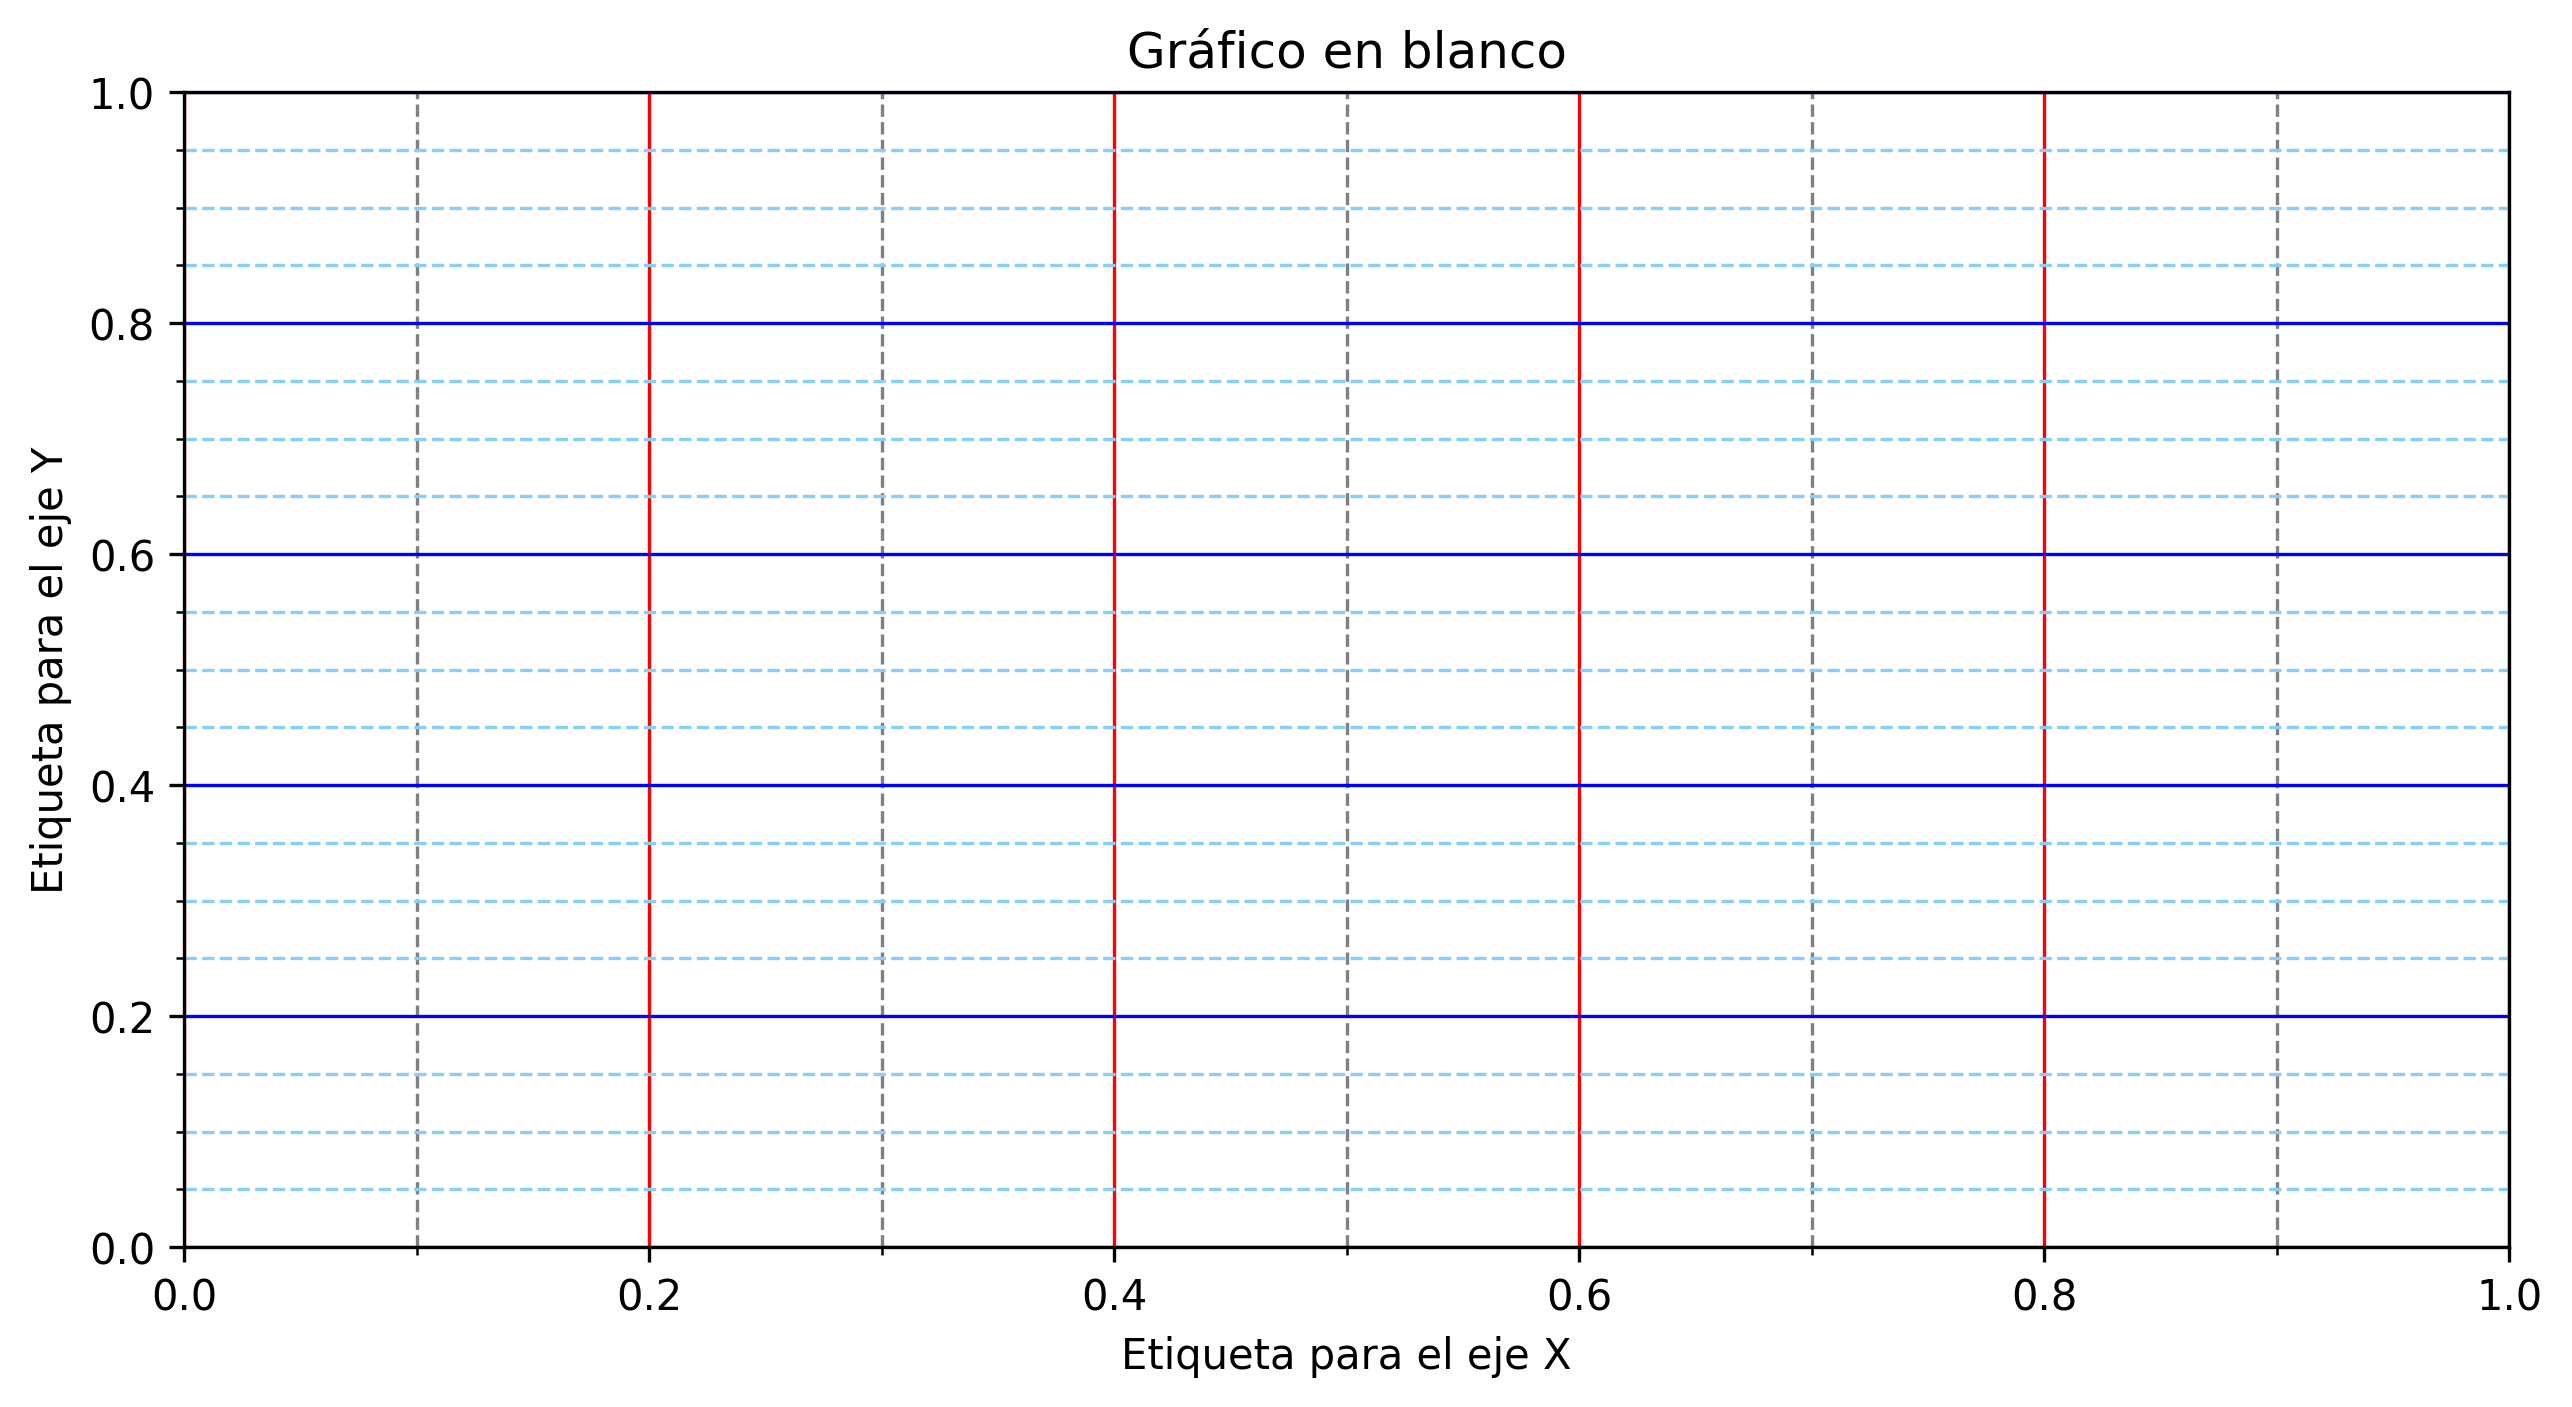

In [35]:
fig

También es posible asignar etiquetas a las marcas menores. En ese sentido, veremos un ejemplo en el que incorporamos los valores a los ejes con estilos propios:

* Marcas menores en el eje X: precisión de 1 decimal, tamaño de letra 8 y color gris.

* Marcas menores en el eje Y: precisión de 2 decimales, tamaño de letra 8 y color azul.

In [36]:
# Eje X
ax.xaxis.set_minor_formatter('{x:.1f}')
ax.tick_params(axis='x', which='minor', labelsize=8, labelcolor='gray')

# Eje Y
ax.yaxis.set_minor_formatter('{x:.2f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightskyblue')

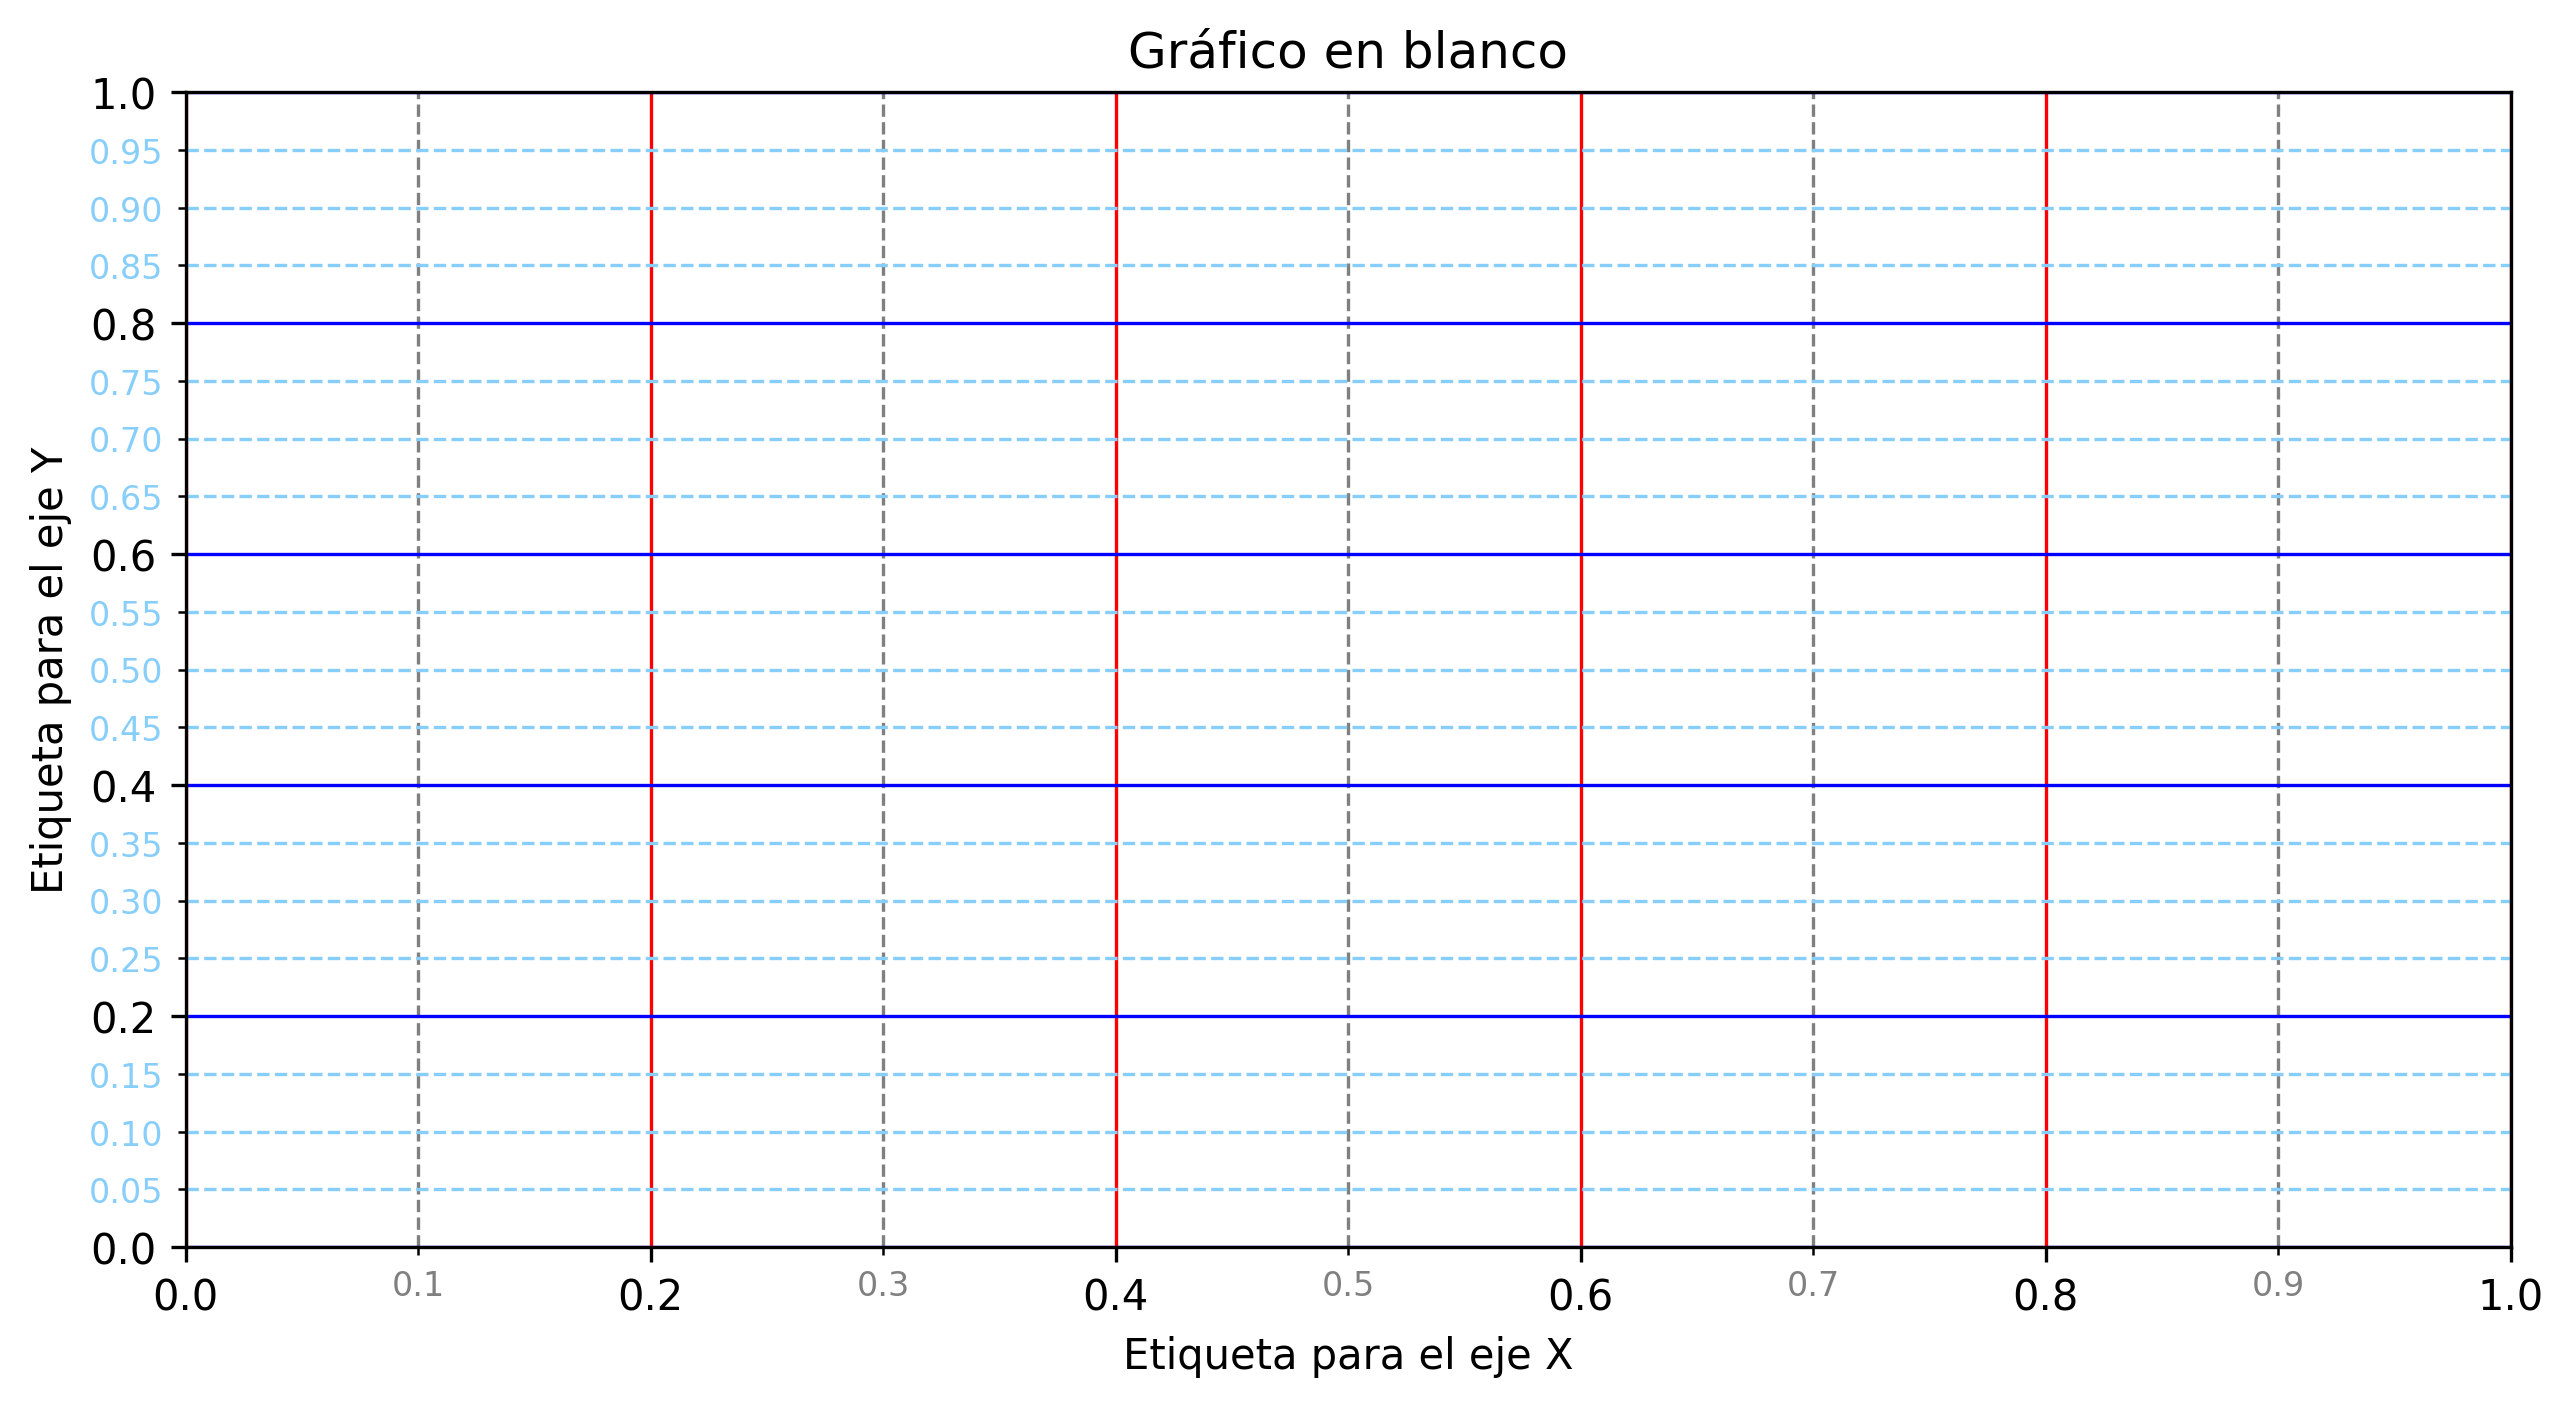

In [37]:
fig

### **Primeros pasos**

Vamos a empezar por representar la función $f(x)=\sin(x)$
. Para ello crearemos una variable $x$
 con valores flotantes equidistantes y una variable $y$
 aplicando la función senoidal. Nos apoyamos en numpy para ello. A continuación usaremos la función `plot()` del marco para representar la función creada:

In [38]:
import numpy as np

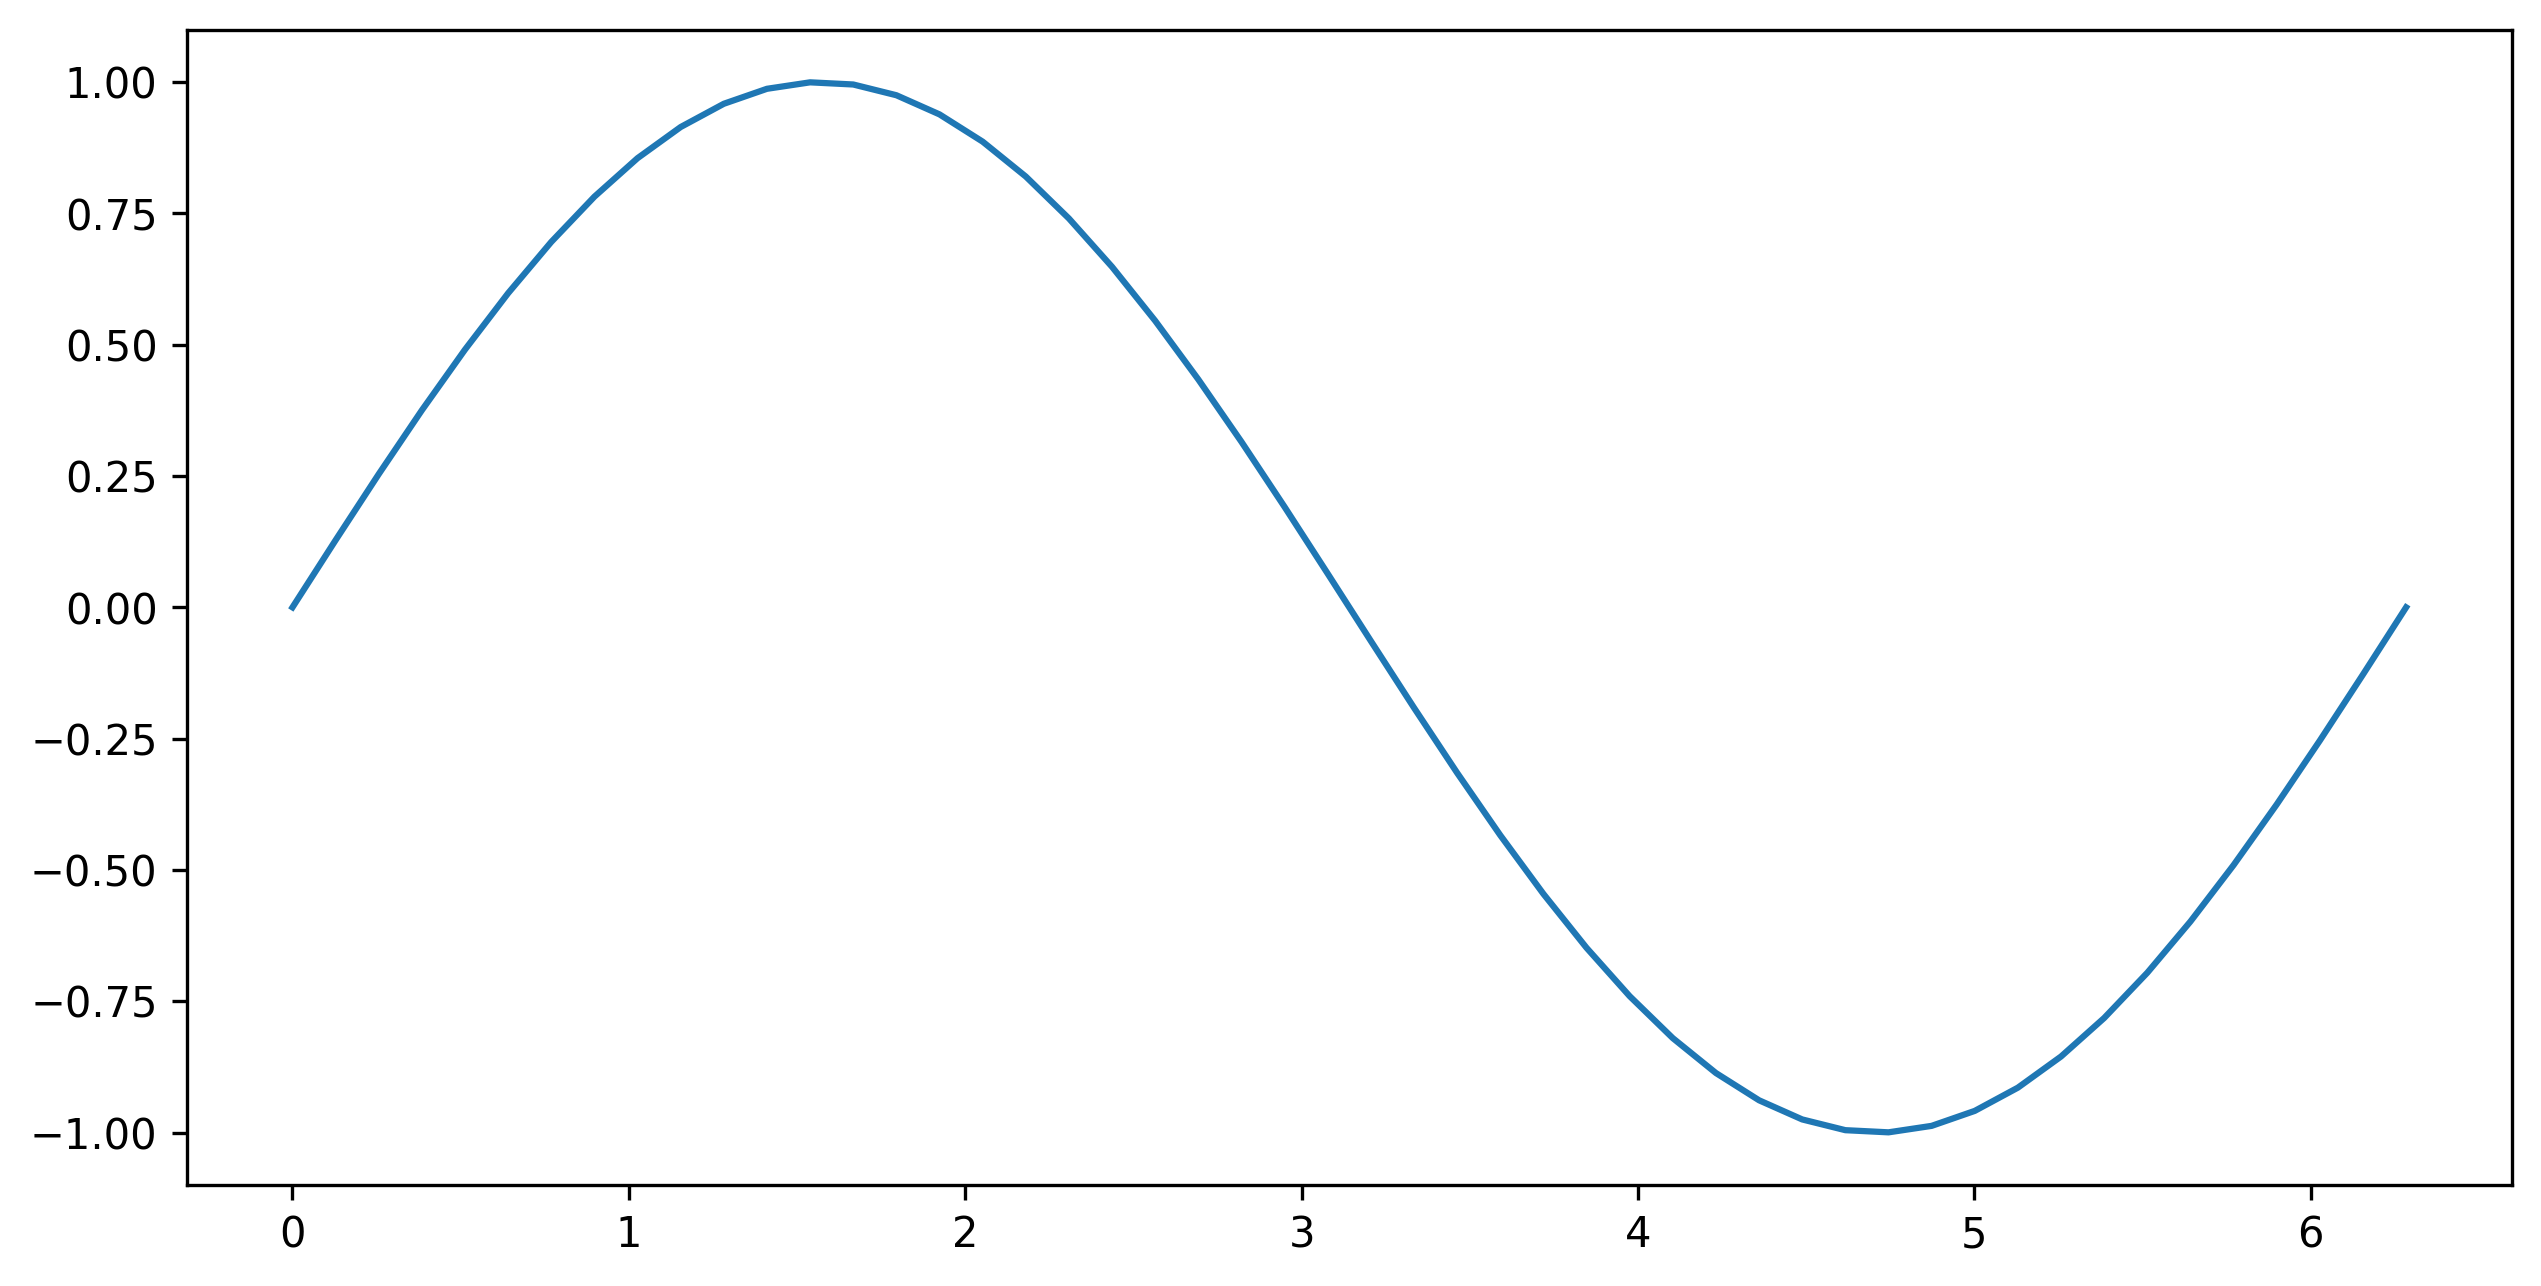

In [39]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

**Múltiples funciones**

Partiendo de un mismo marco, es posible graficar todas las funciones que necesitemos. A continuación crearemos un marco con las funciones seno y coseno:

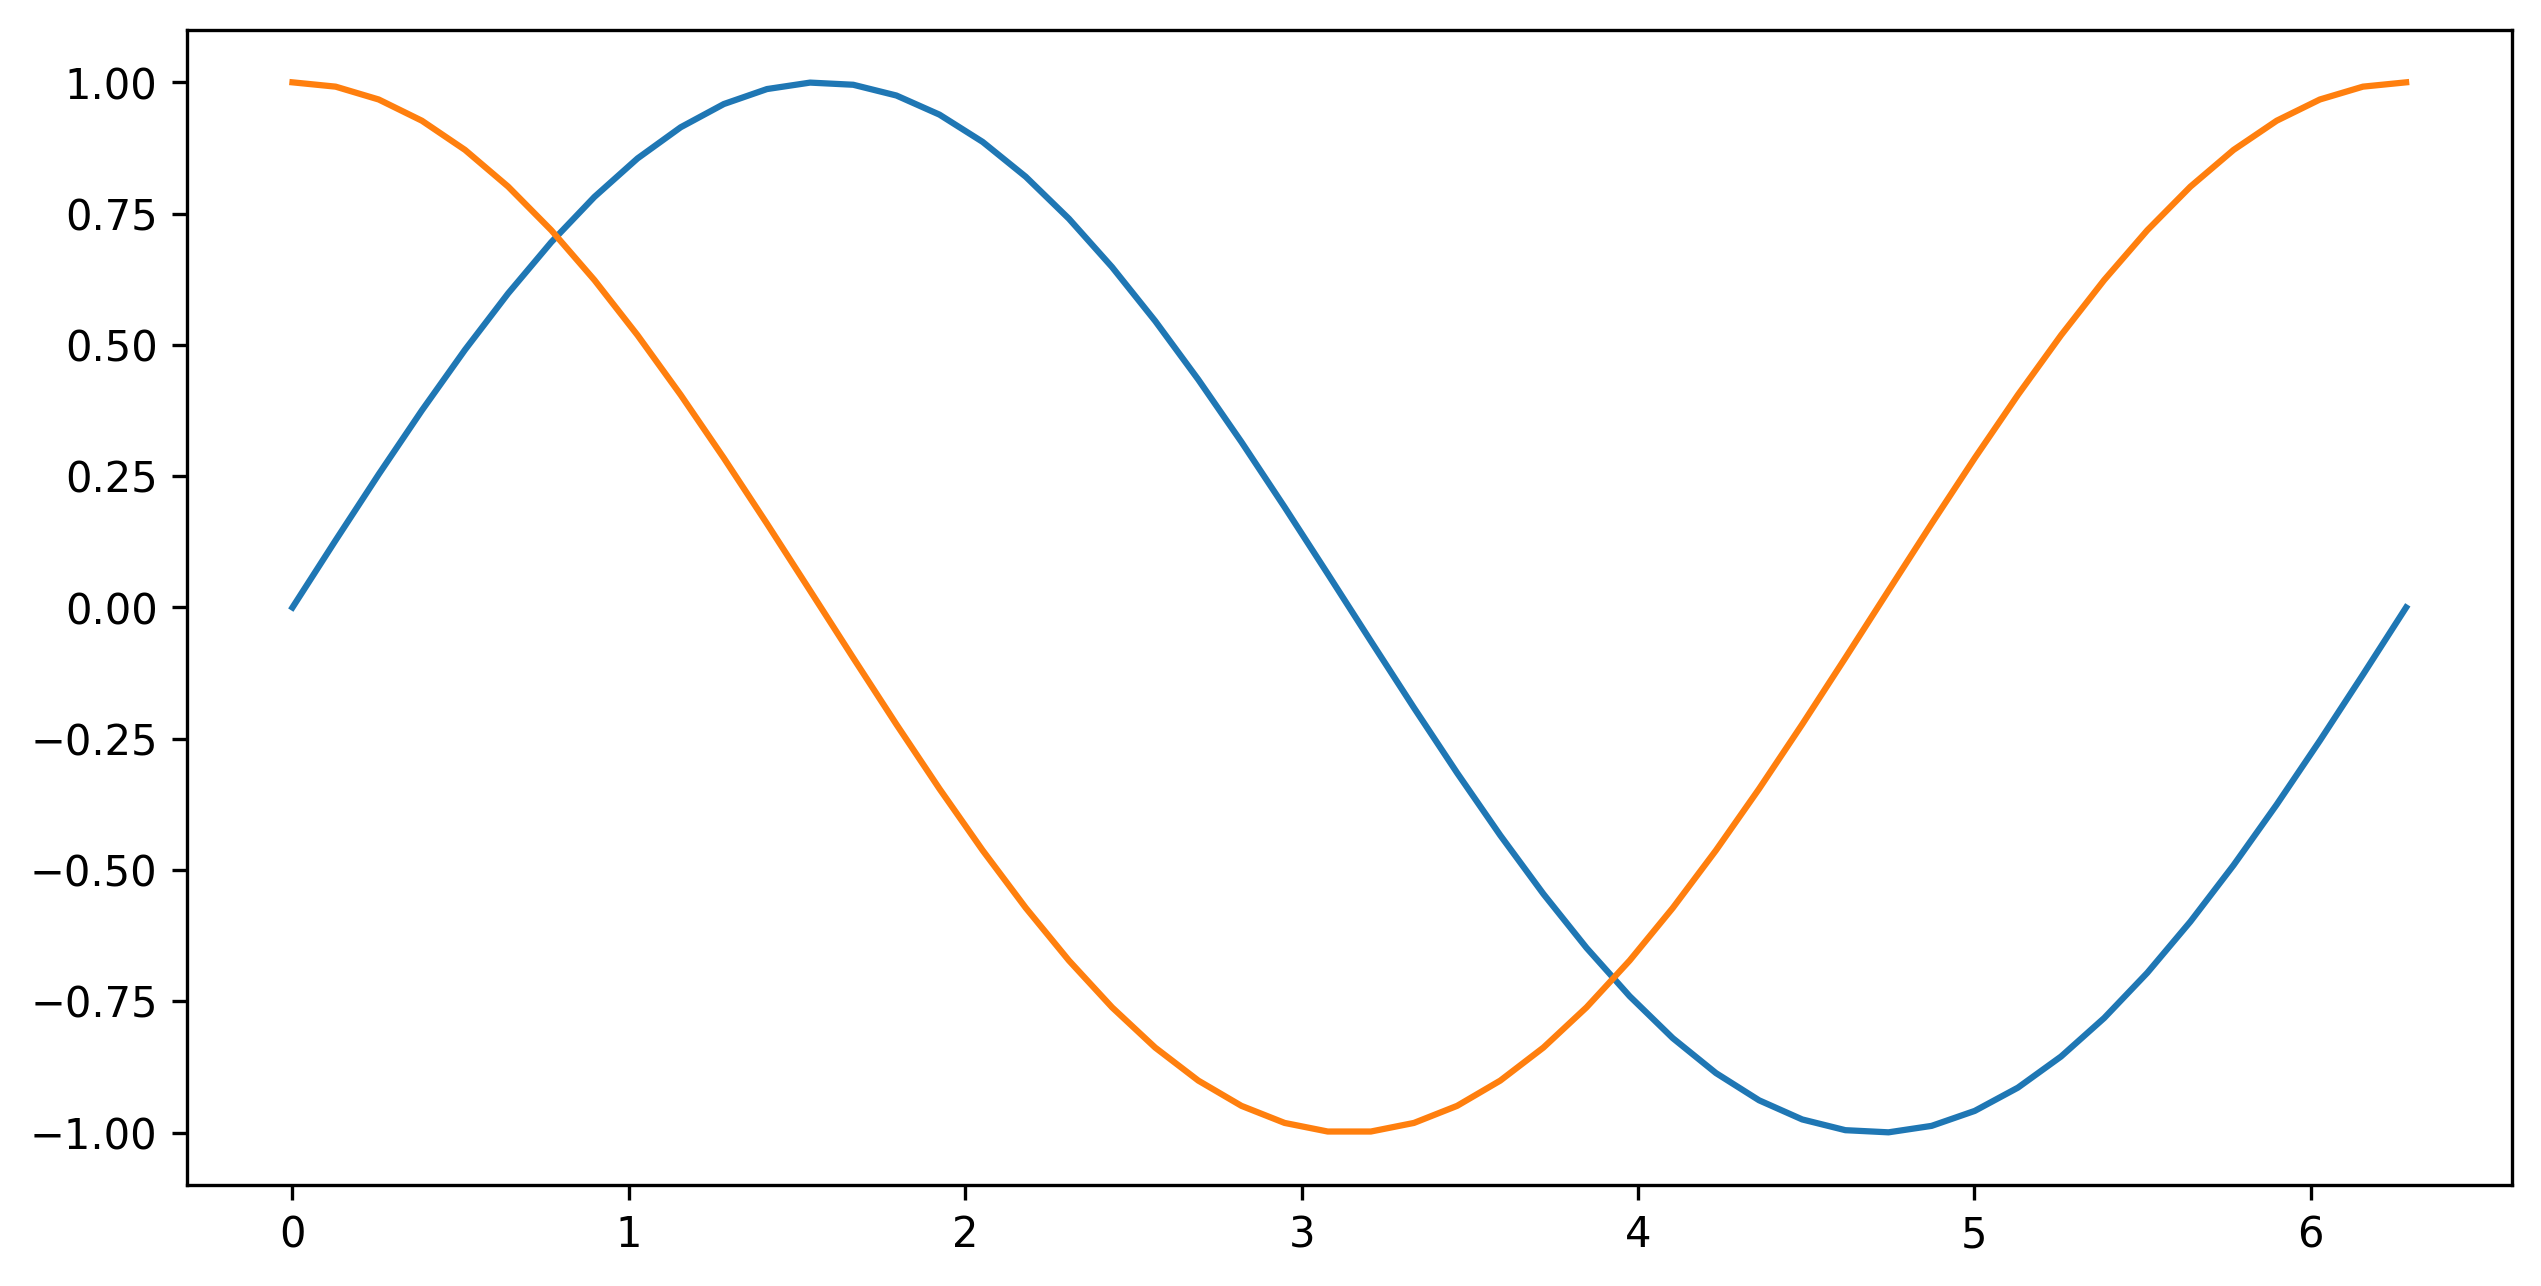

In [40]:
x = np.linspace(0, 2 * np.pi)
sin = np.sin(x)
cos = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, sin)
ax.plot(x, cos)

> **Nota**
>
> Los colores «auto» asignados a las funciones siguen un ciclo establecido por matplotlib que es igualmente personalizable.

**Leyenda**

En el caso de que tengamos múltiples gráficos en el mismo marco puede ser deseable mostrar una leyenda identificativa. Para usarla necesitamos asignar etiquetas a cada función. Veamos a continuación cómo incorporar una leyenda:

In [41]:
ax.plot(x, sin, label='sin')
ax.plot(x, cos, label='cos')

ax.legend()

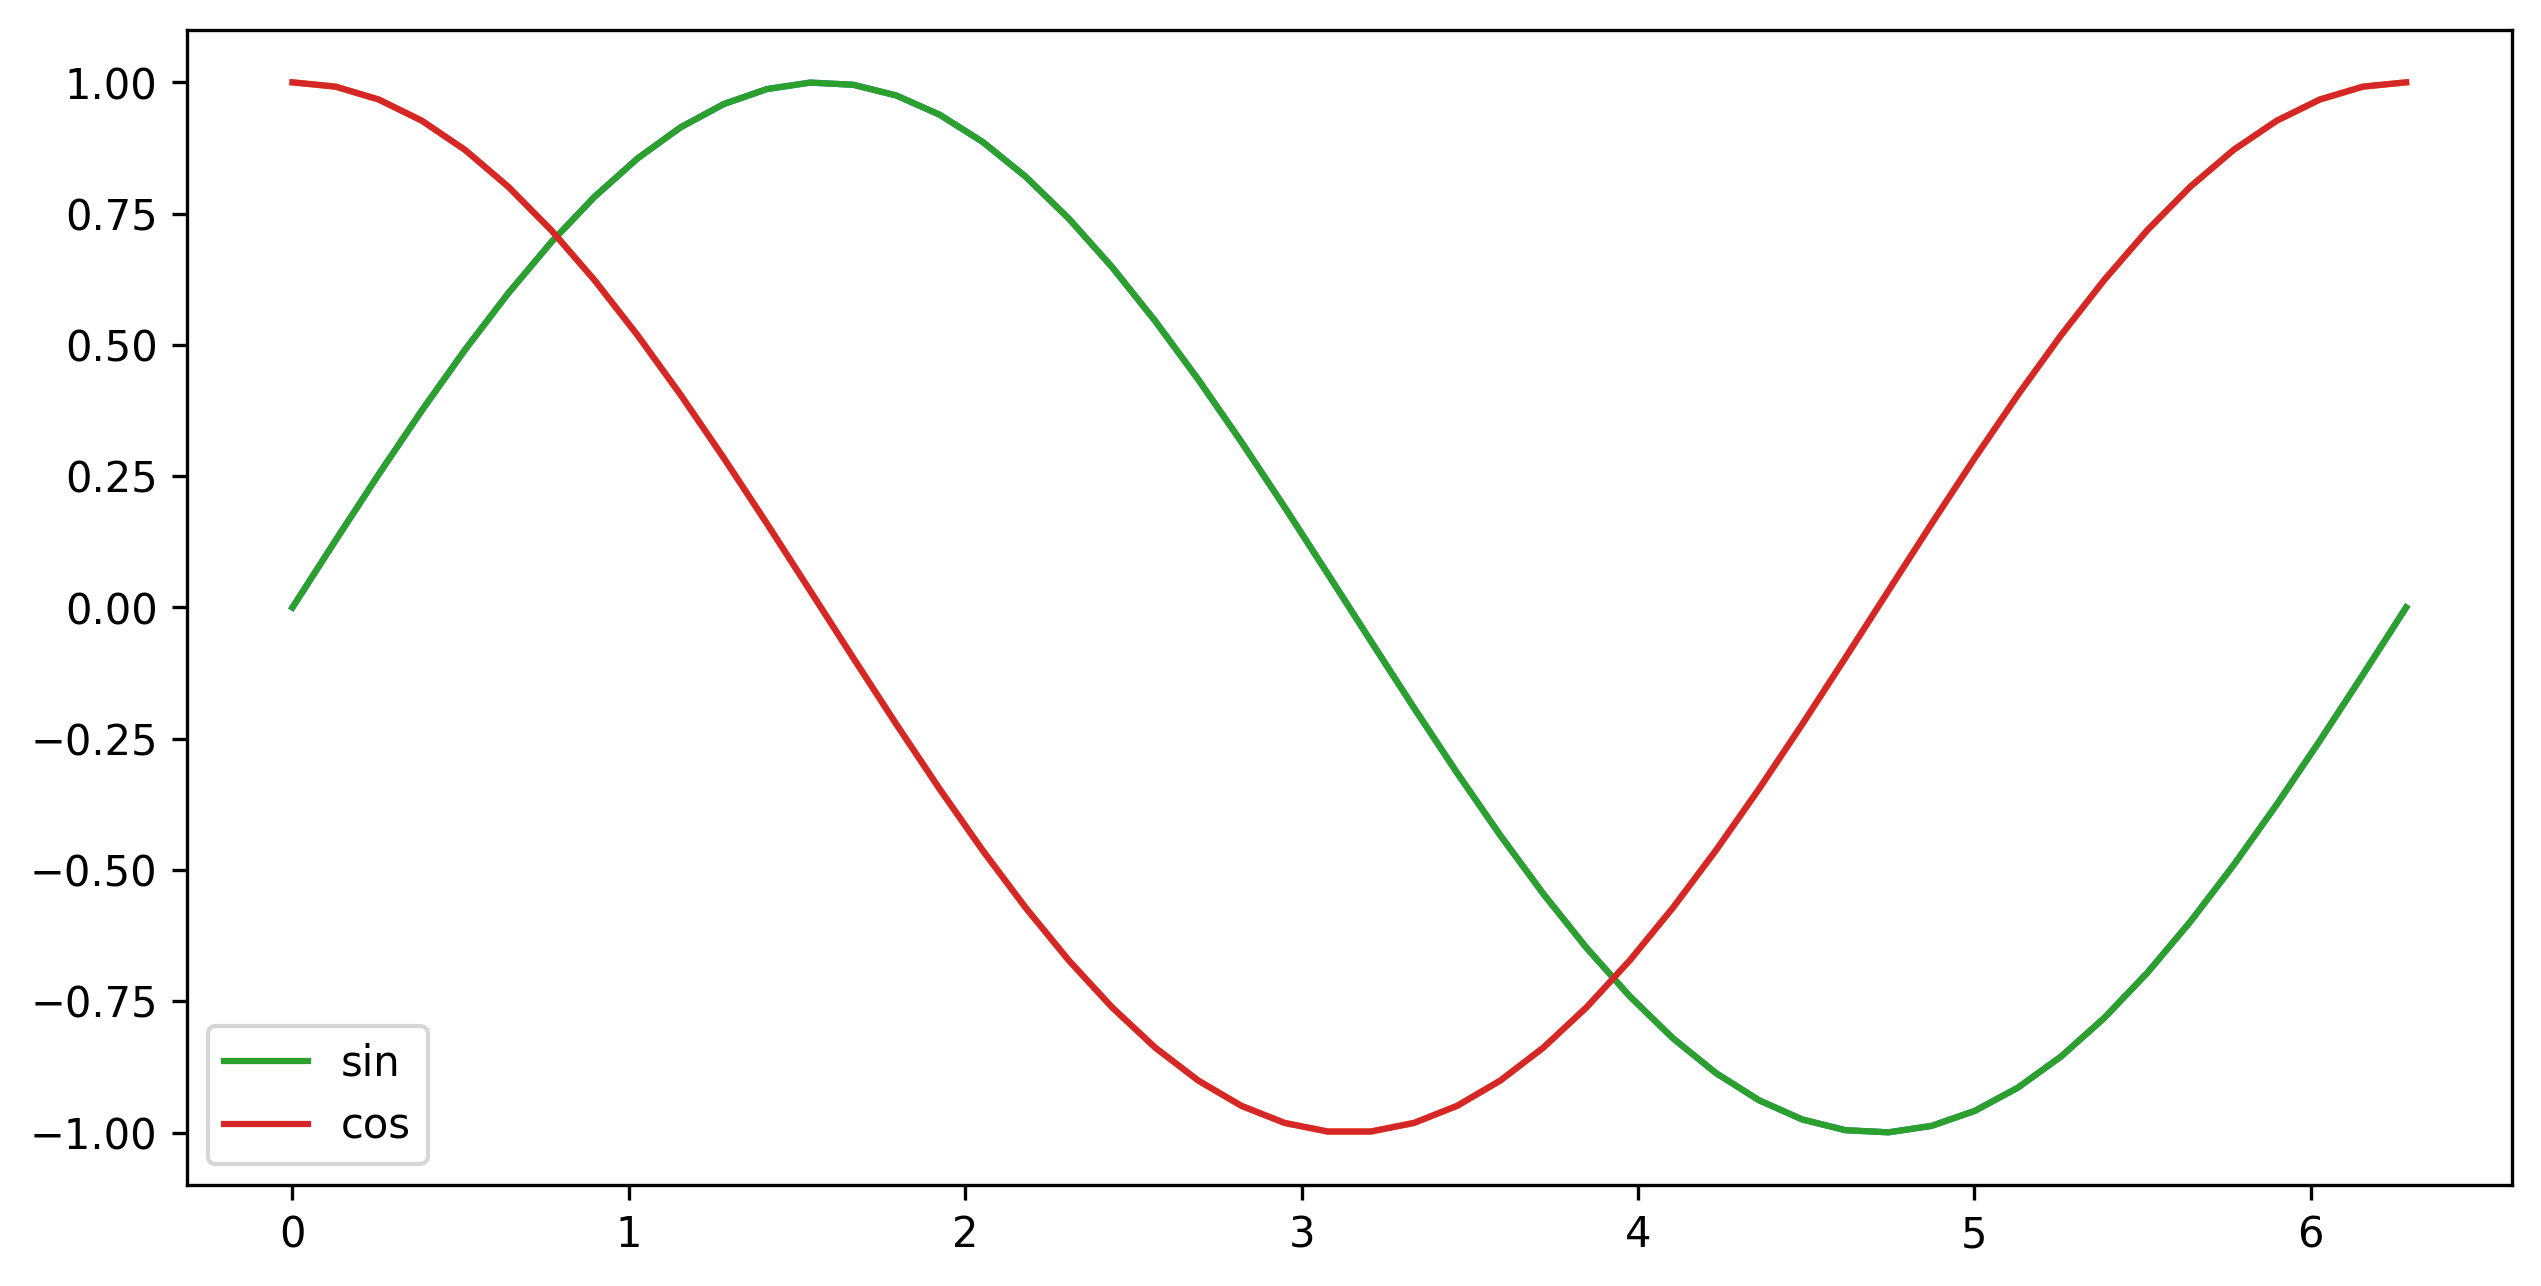

In [42]:
fig

Es posible incorporar sintaxis Latex en los distintos elementos textuales de matplotlib. En el siguiente ejemplo usaremos esta notación en las etiquetas de las funciones utilizando el símbolo $ ... $ para ello:

In [45]:
ax.plot(x, sin, label='$f_1(x) = sin(x)$')
ax.plot(x, cos, label='$f_2(x) = cos(x)$')
ax.legend()

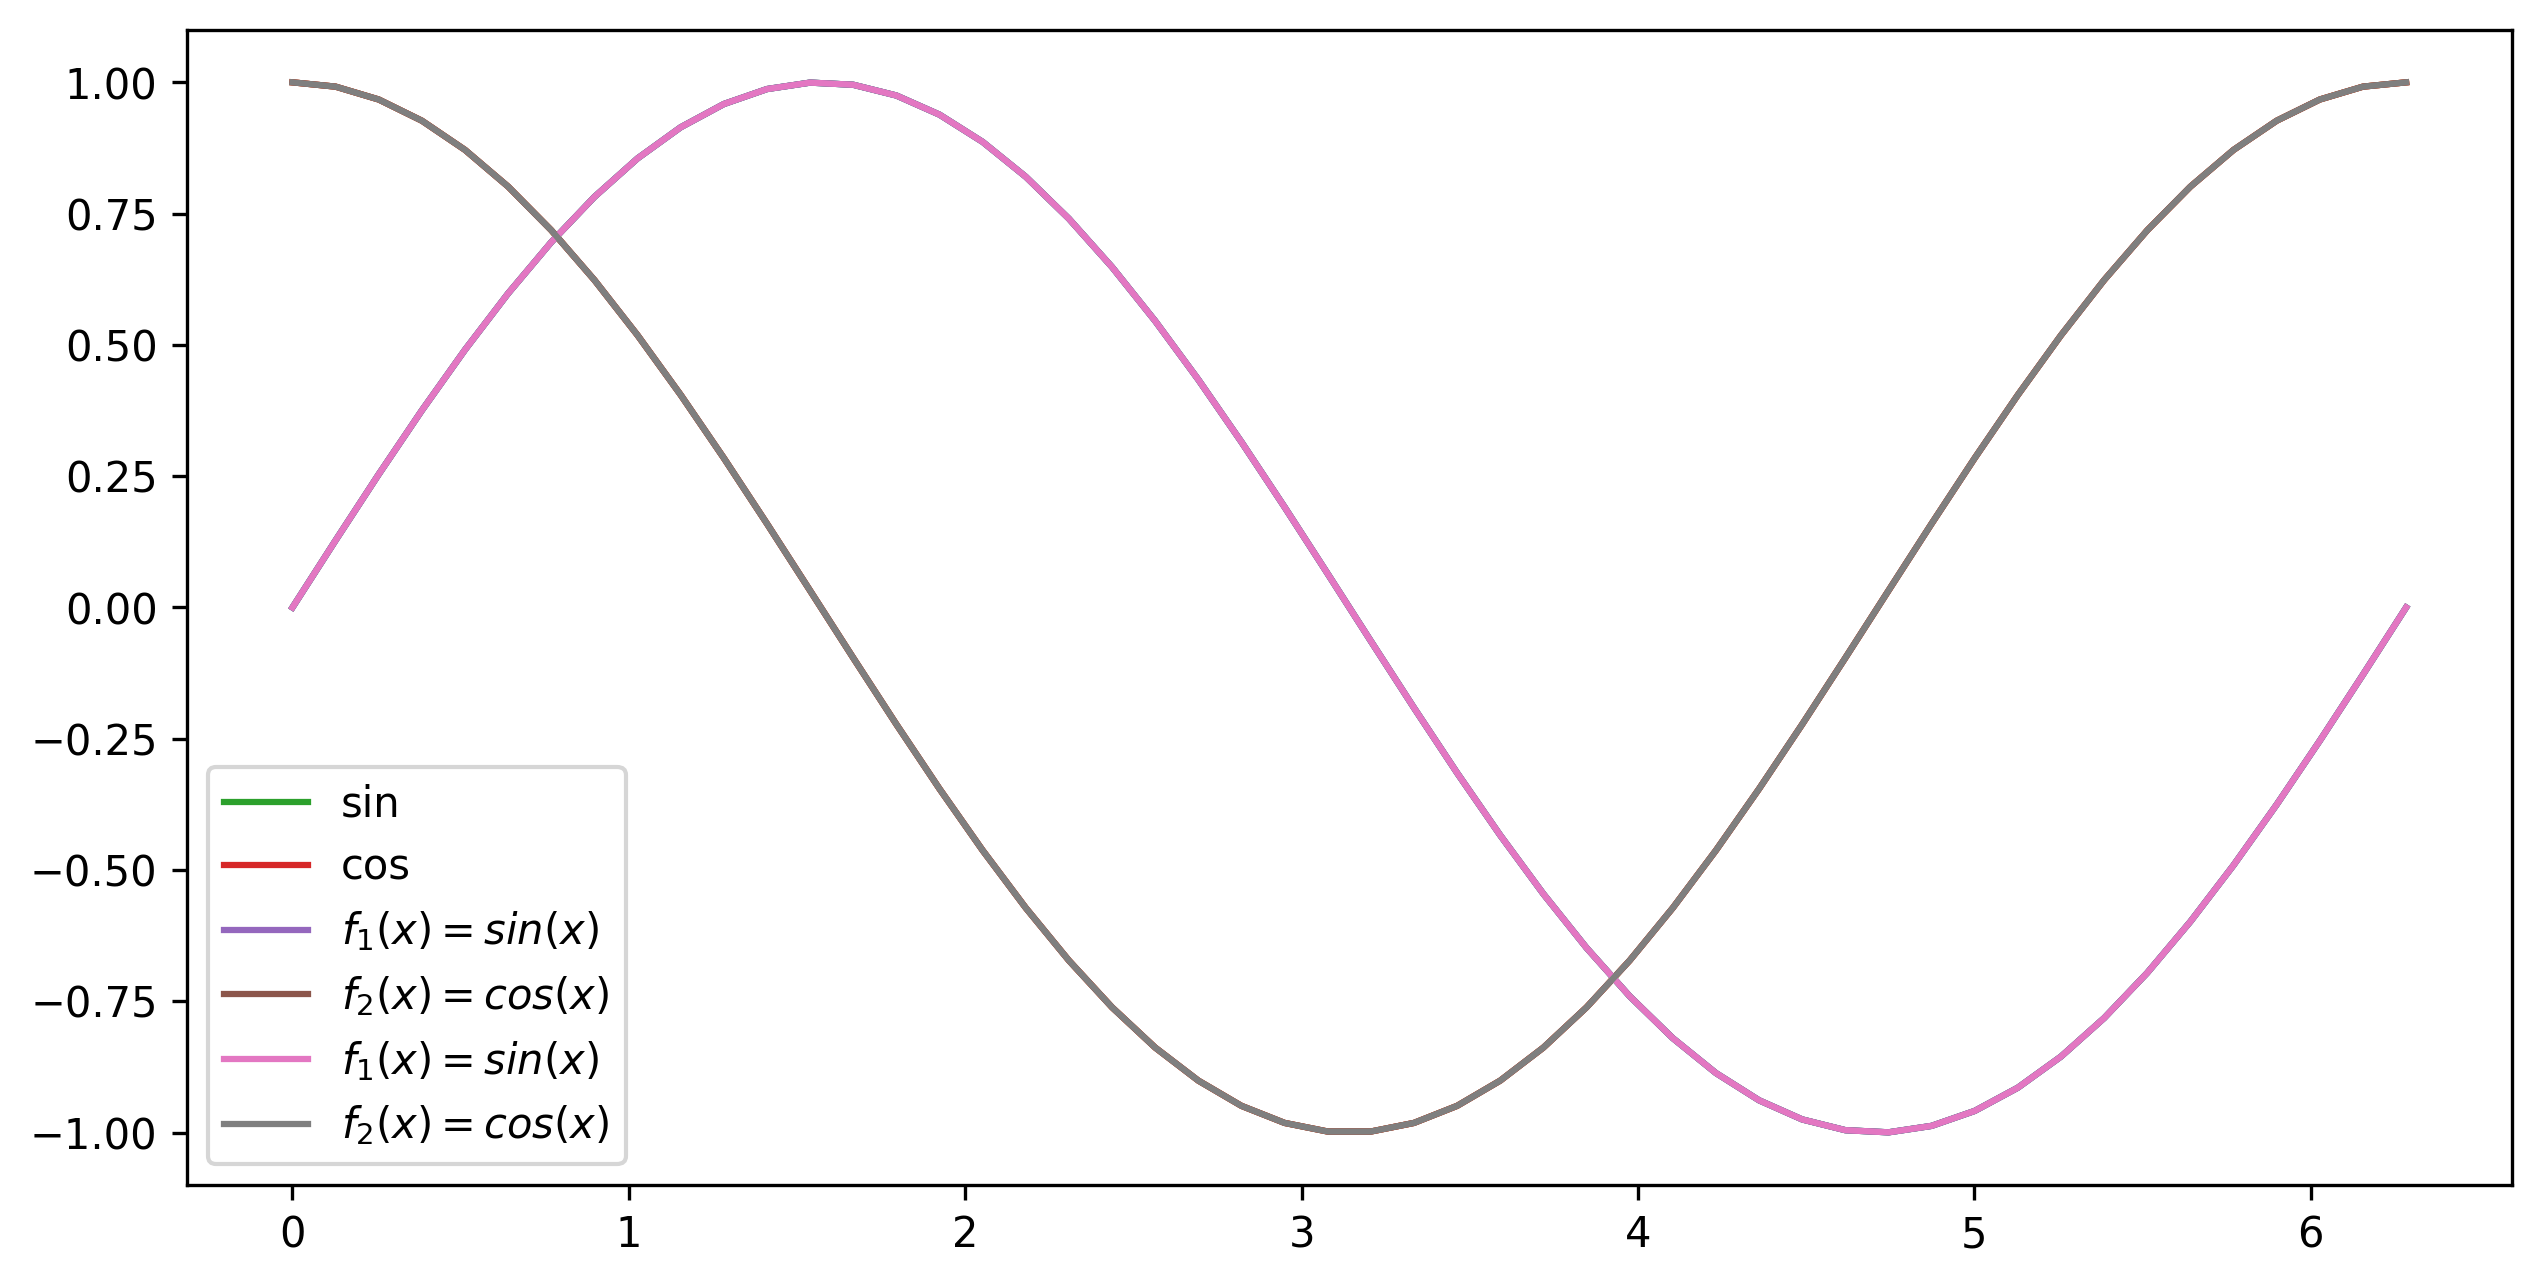

In [46]:
fig

**UBICACIÓN DE LA LEYENDA**

Matplotlib intenta encontrar la mejor ubicación para la leyenda en el marco. Sin embargo, también es posible personalizar el lugar en el que queremos colocarla.

Si nos interesa situar la leyenda en la parte superior central del marco haríamos lo siguiente:

In [47]:
ax.legend(loc='upper center')

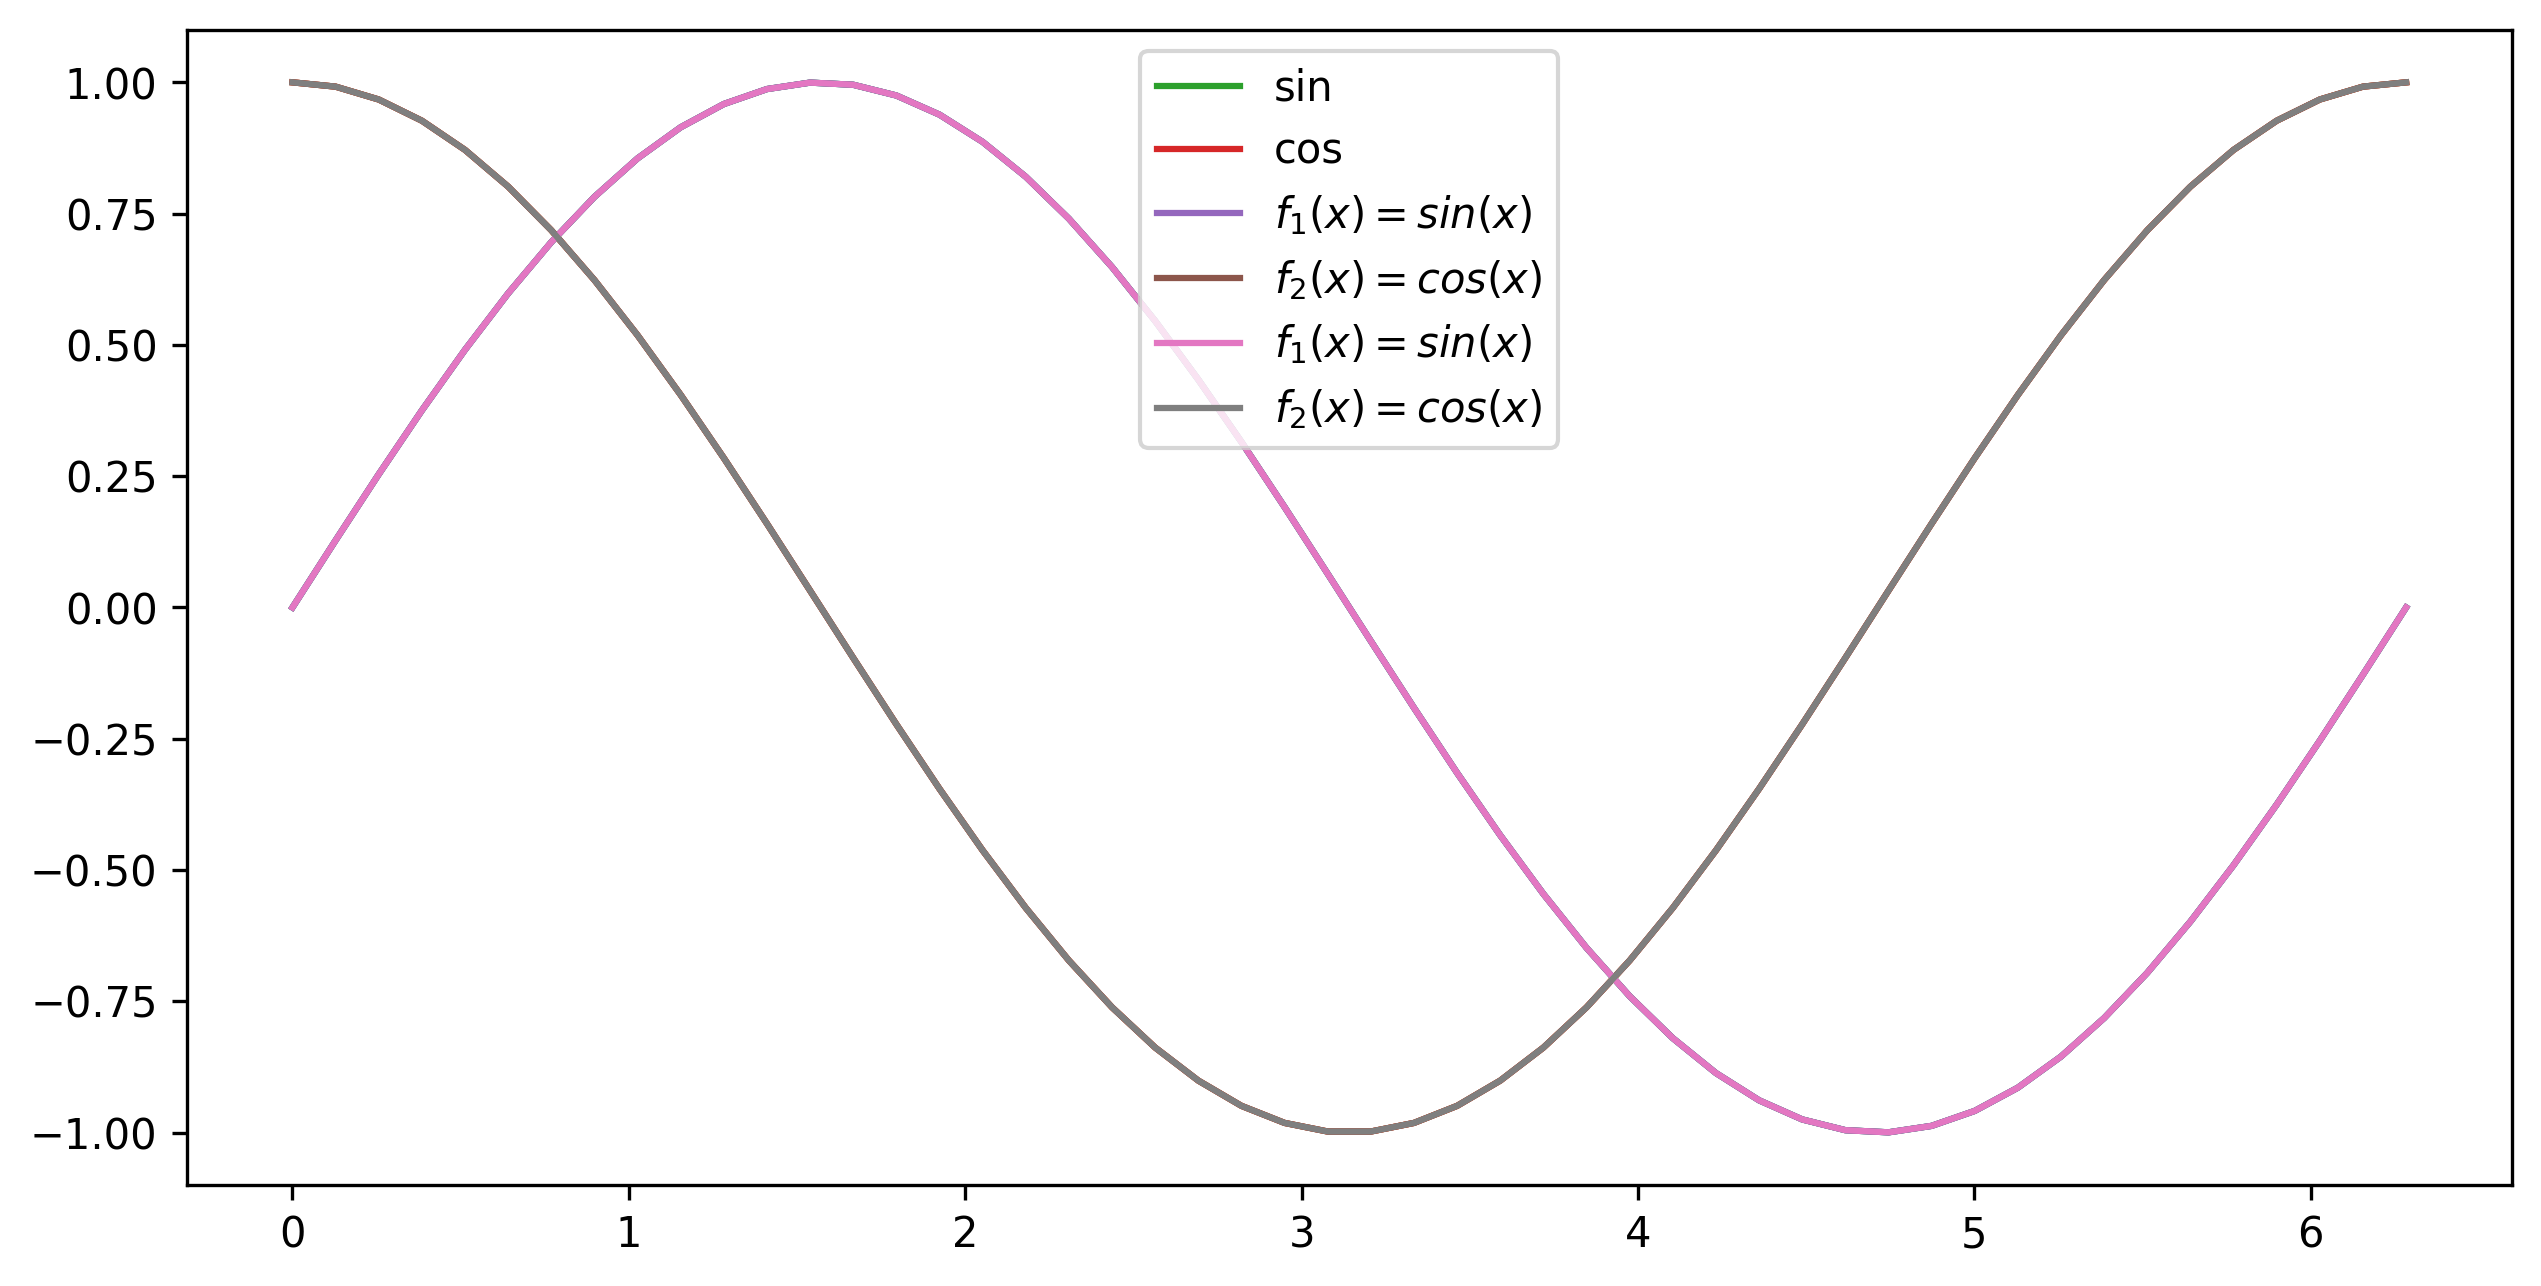

In [48]:
fig

**Aplicando estilos**

Para cada función que incluimos en el marco es posible establecer un estilo personalizado con multitud de parámetros. Veamos la aplicación de algunos de estos parámetros a las funciones seno y coseno con las que hemos estado trabajando:

In [49]:
sin_style = dict(linewidth=3, color='darkorange')
cos_style = dict(marker='o', markerfacecolor='limegreen', color='darkgreen')

ax.plot(x, sin, label='$f_1(x) = sin(x)$', **sin_style)
ax.plot(x, cos, label='$f_2(x) = cos(x)$', **cos_style)

In [51]:
ax.legend()

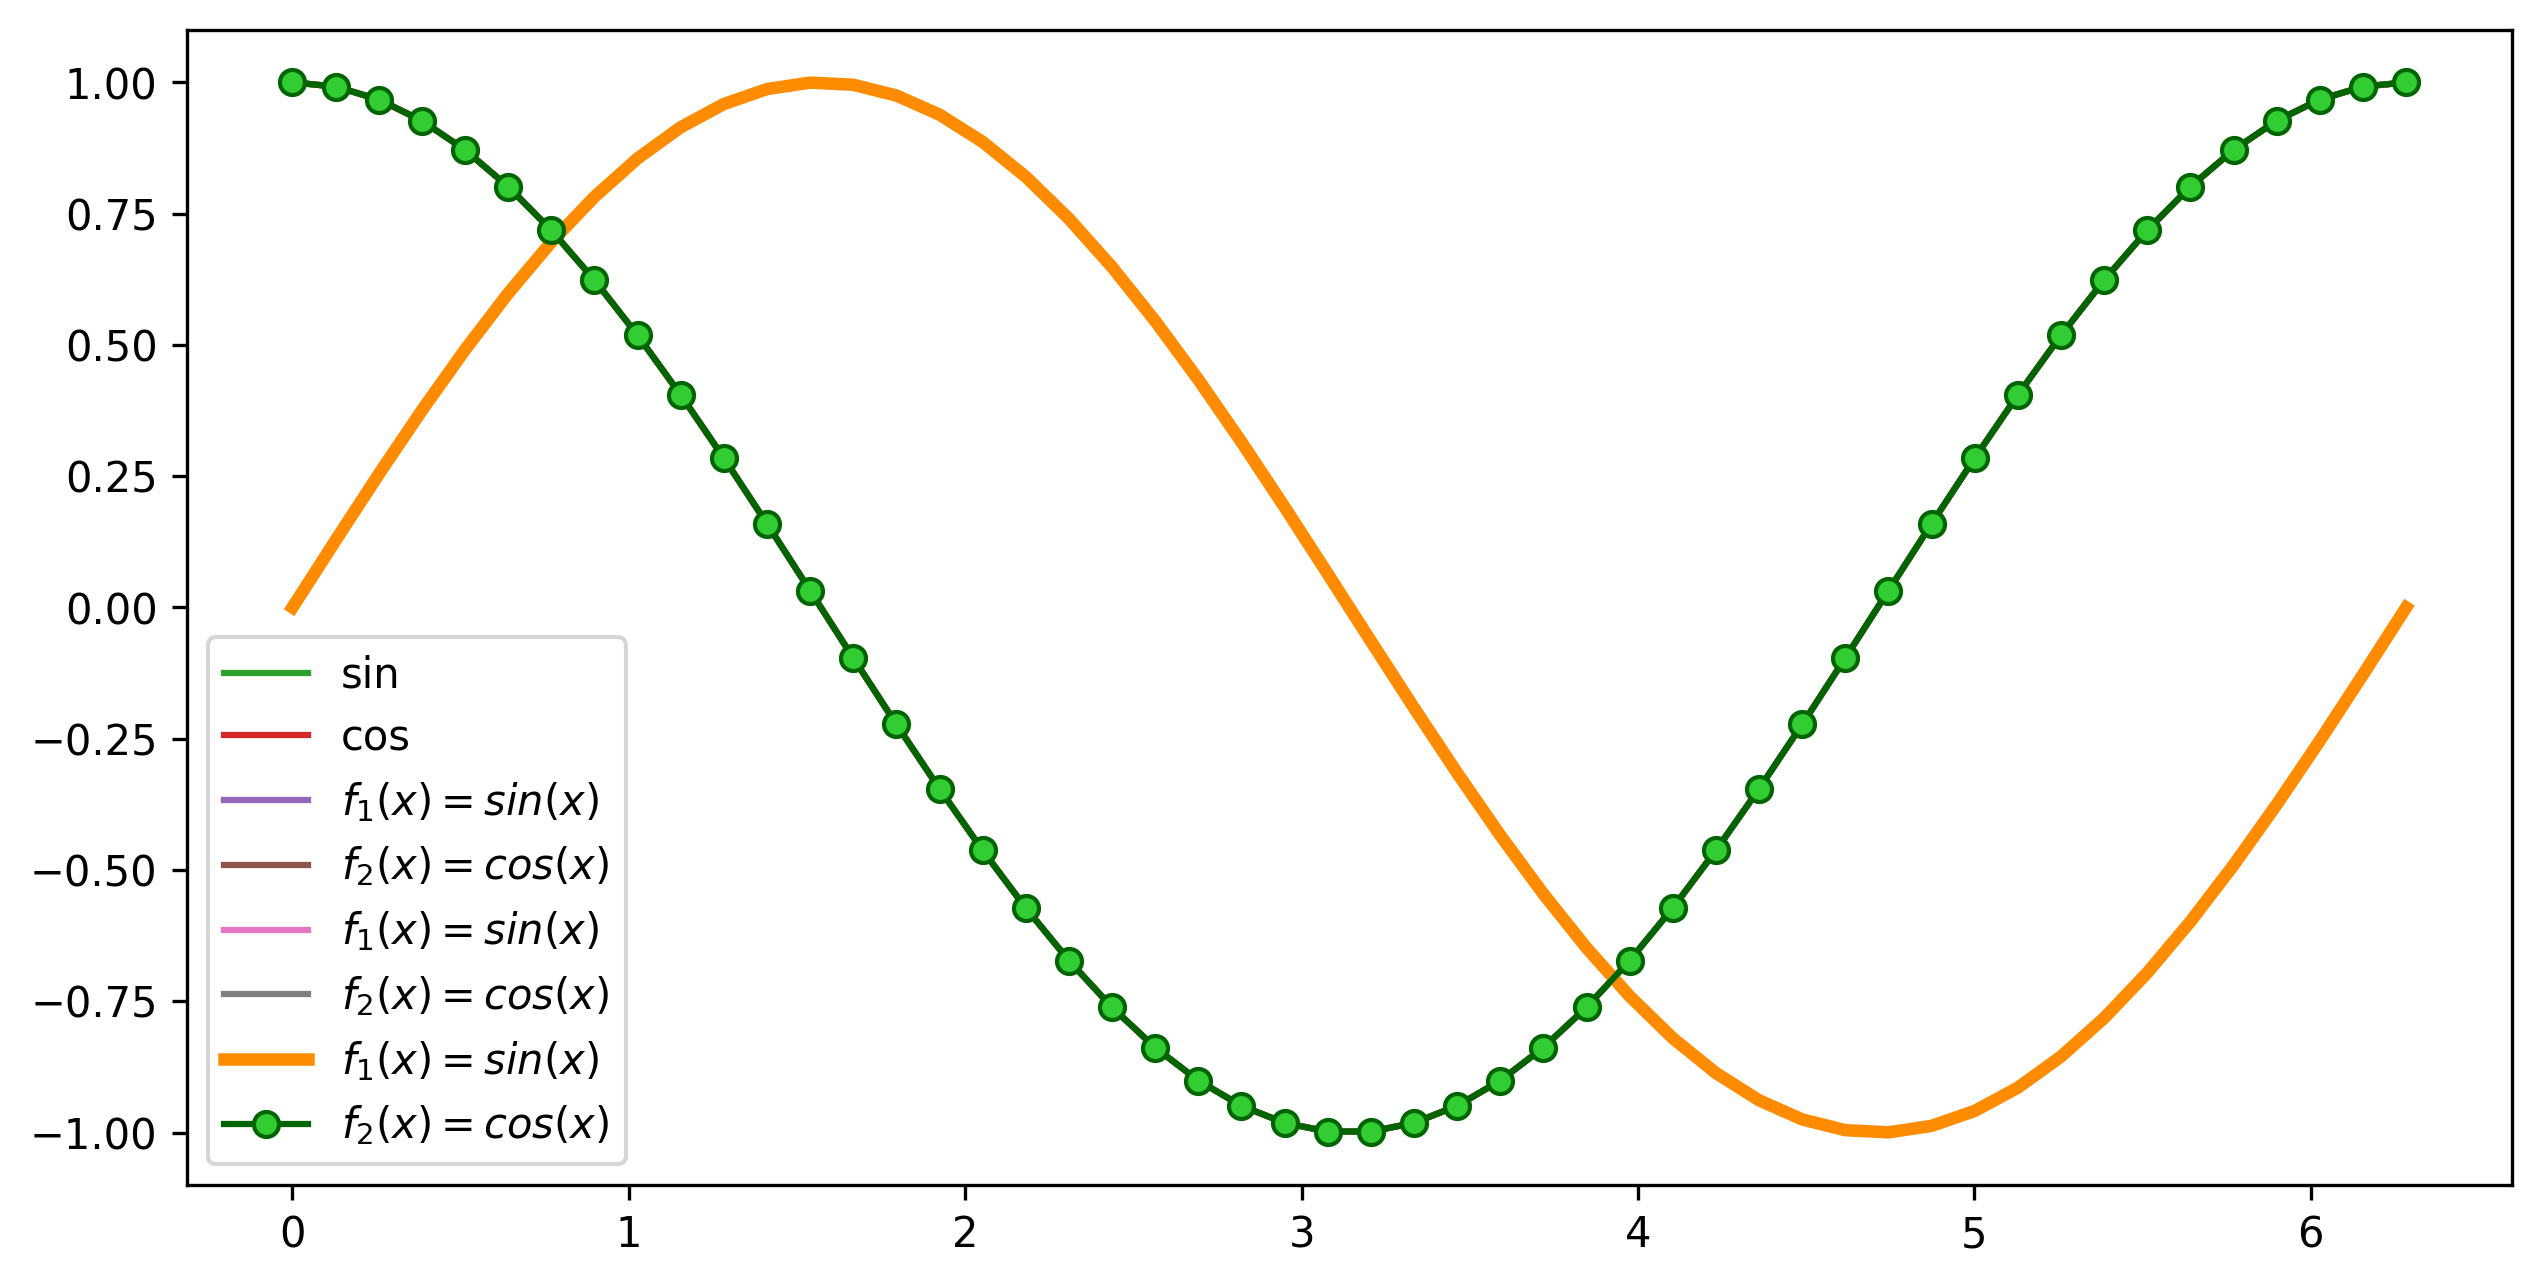

In [52]:
fig

**Acotando ejes**

Hay veces que nos interesa definir los límites de los ejes. En ese caso, podemos hacerlo de una manera muy sencilla:

In [53]:
ax.set_xlim(0, np.pi / 2)
ax.set_ylim(0, 1)

ax.grid()  # sólo a efectos estéticos

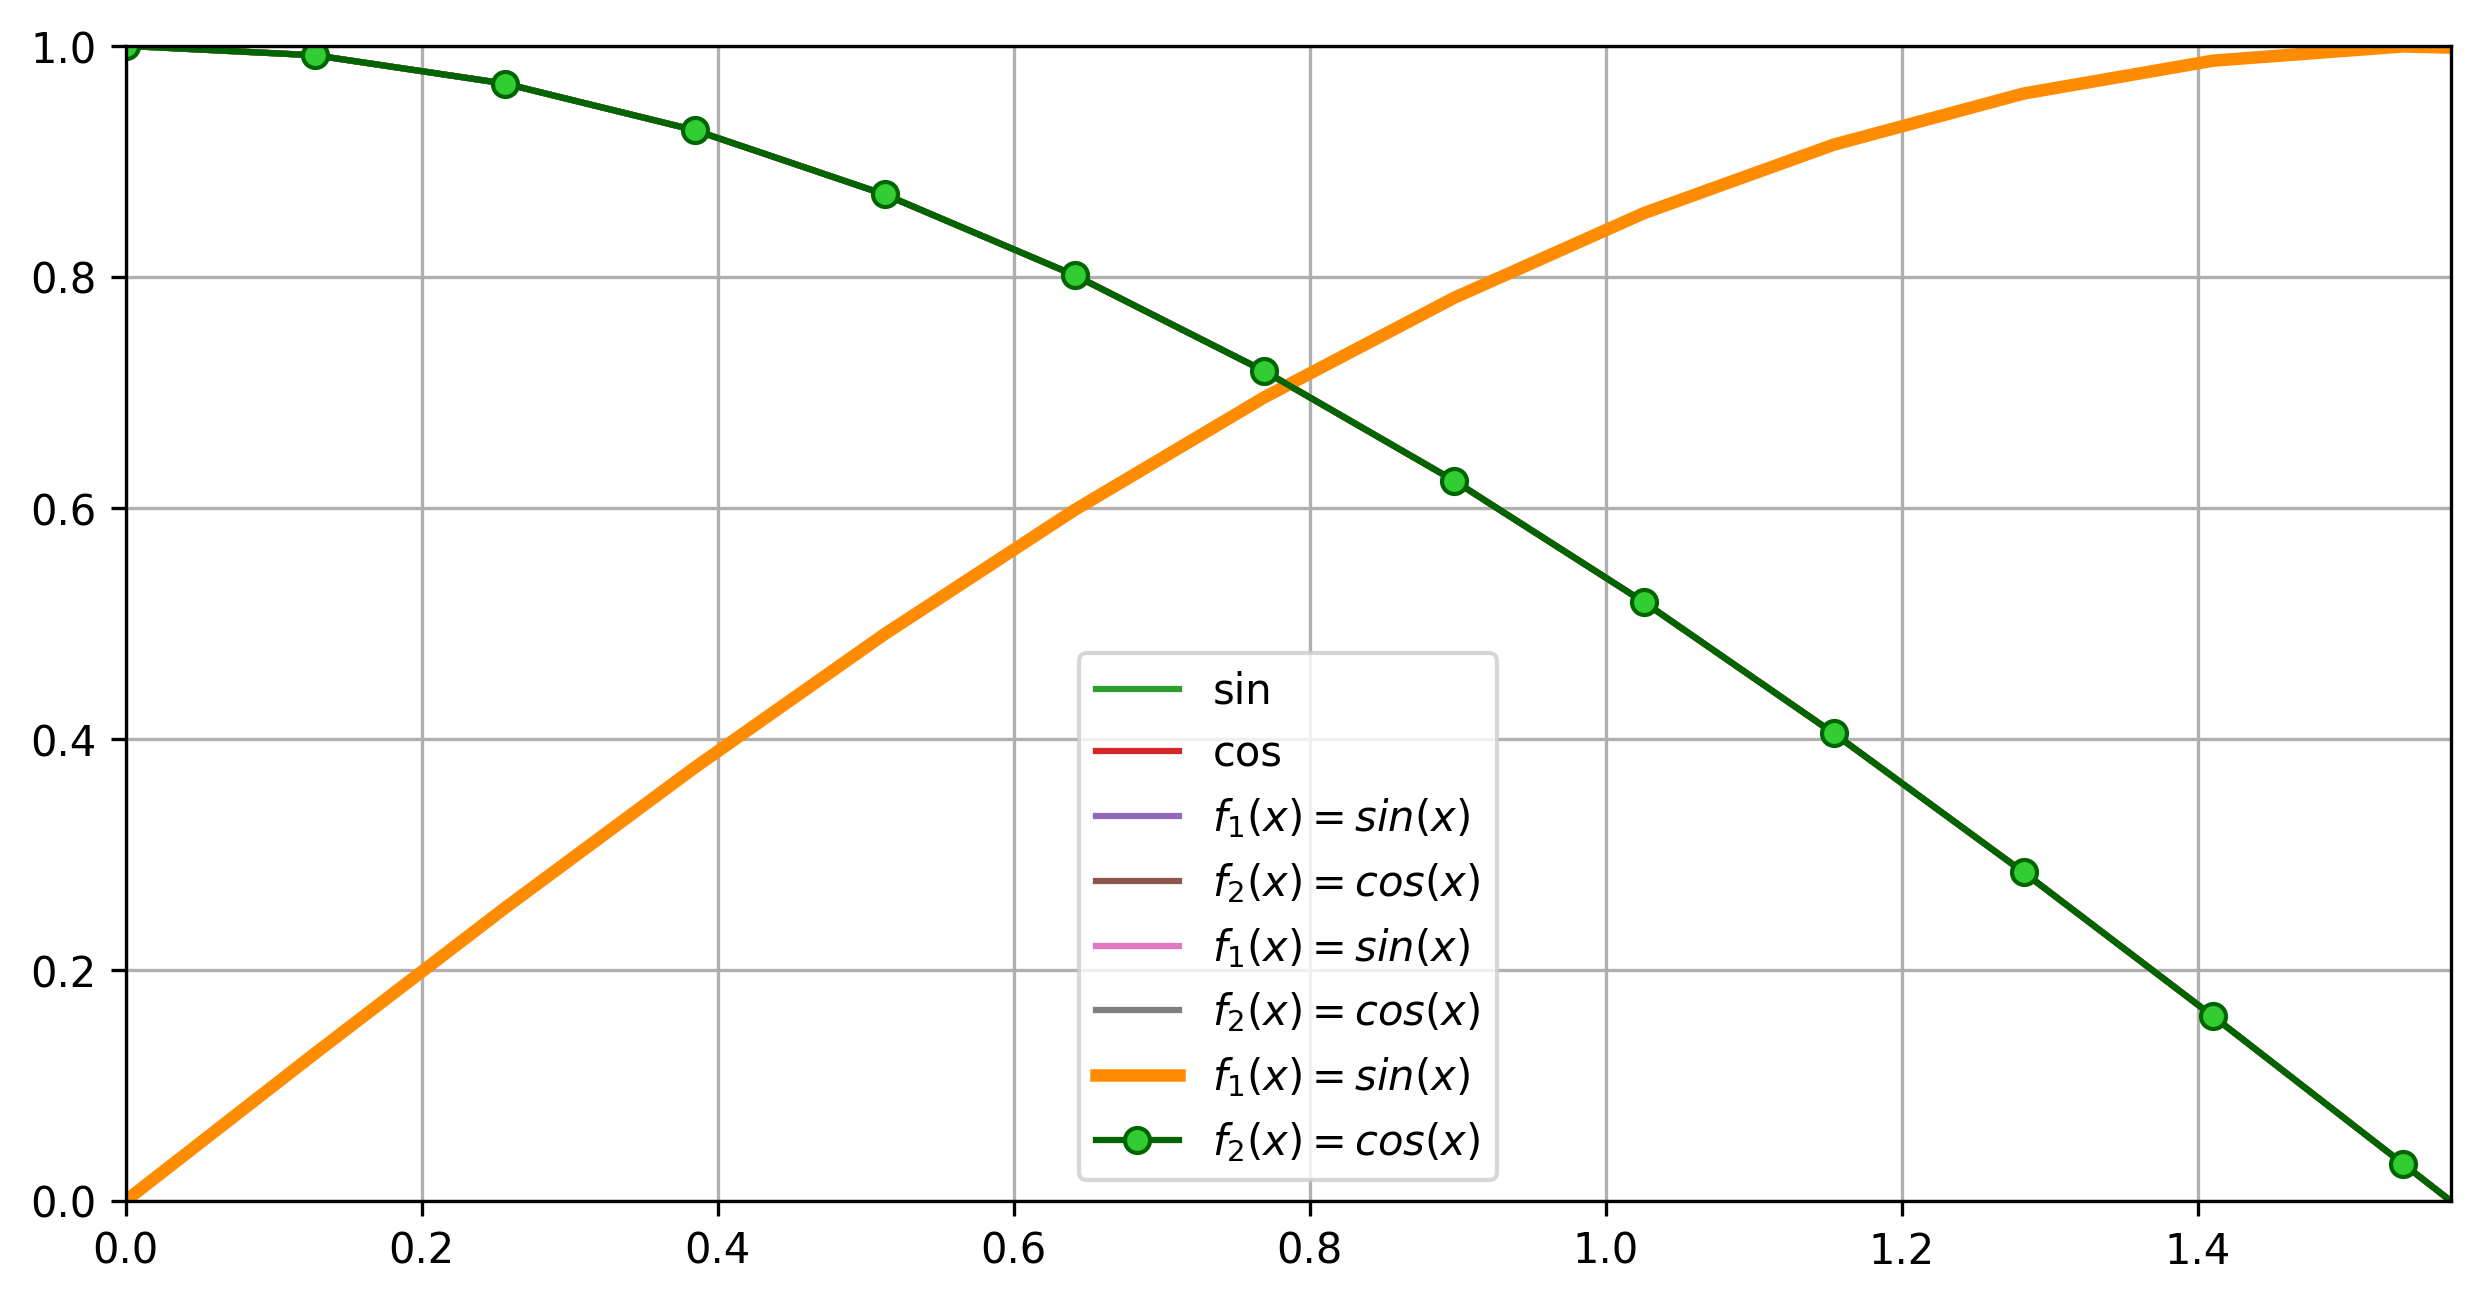

In [54]:
fig

> **Truco**
>
>También es posible especificar únicamente límite inferior o superior en ambas funciones `set_xlim()` y `set_ylim()`. En ese caso, el otro valor sería ajustado automáticamente por matplotlib.

**Anotaciones**

En ocasiones necesitamos añadir ciertas anotaciones al gráfico que estamos diseñando. Esto permite destacar áreas o detalles que pueden ser relevantes.

Partiendo de las funciones seno y coseno con las que hemos estado trabajando, vamos a suponer que queremos obtener sus puntos de corte, es decir, resolver la siguiente ecuación:

\begin{align*}
\sin(x) &= \cos(x) \\
\Downarrow \\
x &= \frac{\pi}{4} + \pi n, \quad n \in \mathbb{Z}
\end{align*}


Para el caso que nos ocupa haríamos $n=0$
 con lo que obtendríamos la siguiente solución:

In [55]:
xsol = np.pi / 4 + np.pi * 0
ysol = np.sin(xsol)

xsol, ysol

(0.7853981633974483, 0.7071067811865475)

Vamos a insertar una serie de anotaciones en el gráfico:

* Flecha en el punto de corte con etiqueta de ecuación.

* Coordenadas de solución en el punto de corte.

* Proyección del punto de corte hacia ambos ejes.

In [56]:
ax.annotate('$sin(x) = cos(x)$',
            xy=(xsol, ysol),
            xytext=(1.2, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.text(0.47, 0.72, f'({xsol:.2f}, {ysol:.2f})')

ax.plot([xsol, xsol], [0, ysol], color='gray', linestyle='--')
ax.plot([0, xsol], [ysol, ysol], color='gray', linestyle='--')

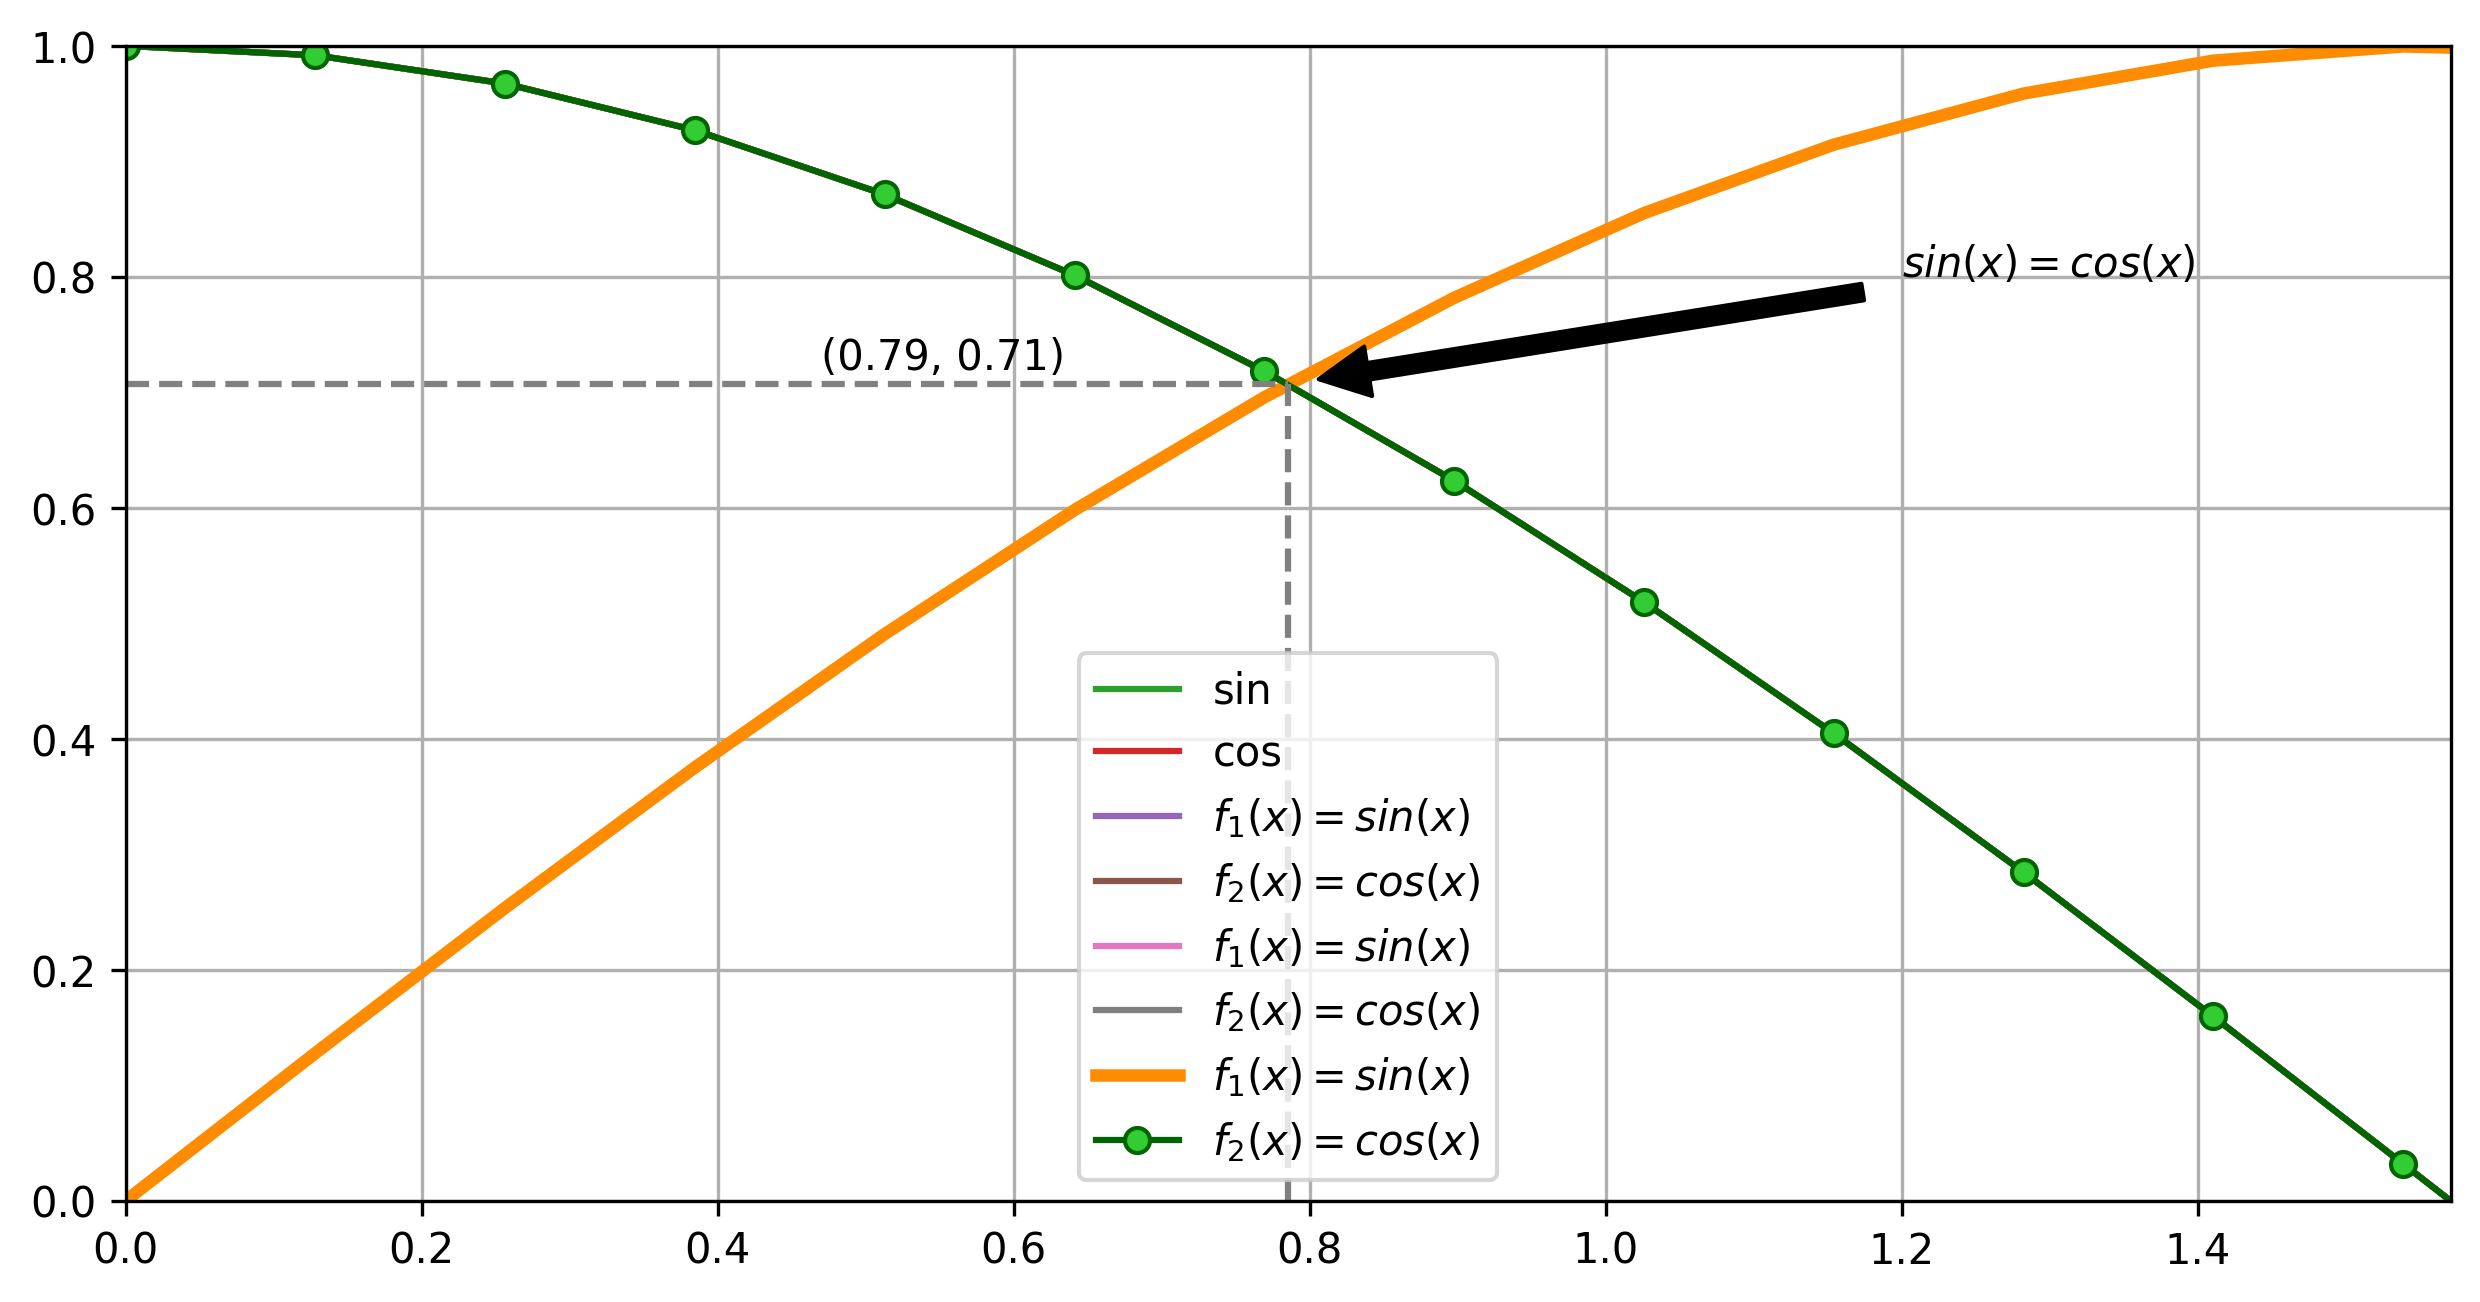

In [57]:
fig

> **Ejercicio**

Escriba el código Python necesario para obtener el siguiente gráfico:

Datos:

* $x \in [0, 2\pi] $ (1000 puntos)

* $y = \varepsilon ^{-\alpha x}\sin(\beta x)$, donde $\alpha = 0.7$ y $\beta = 10$

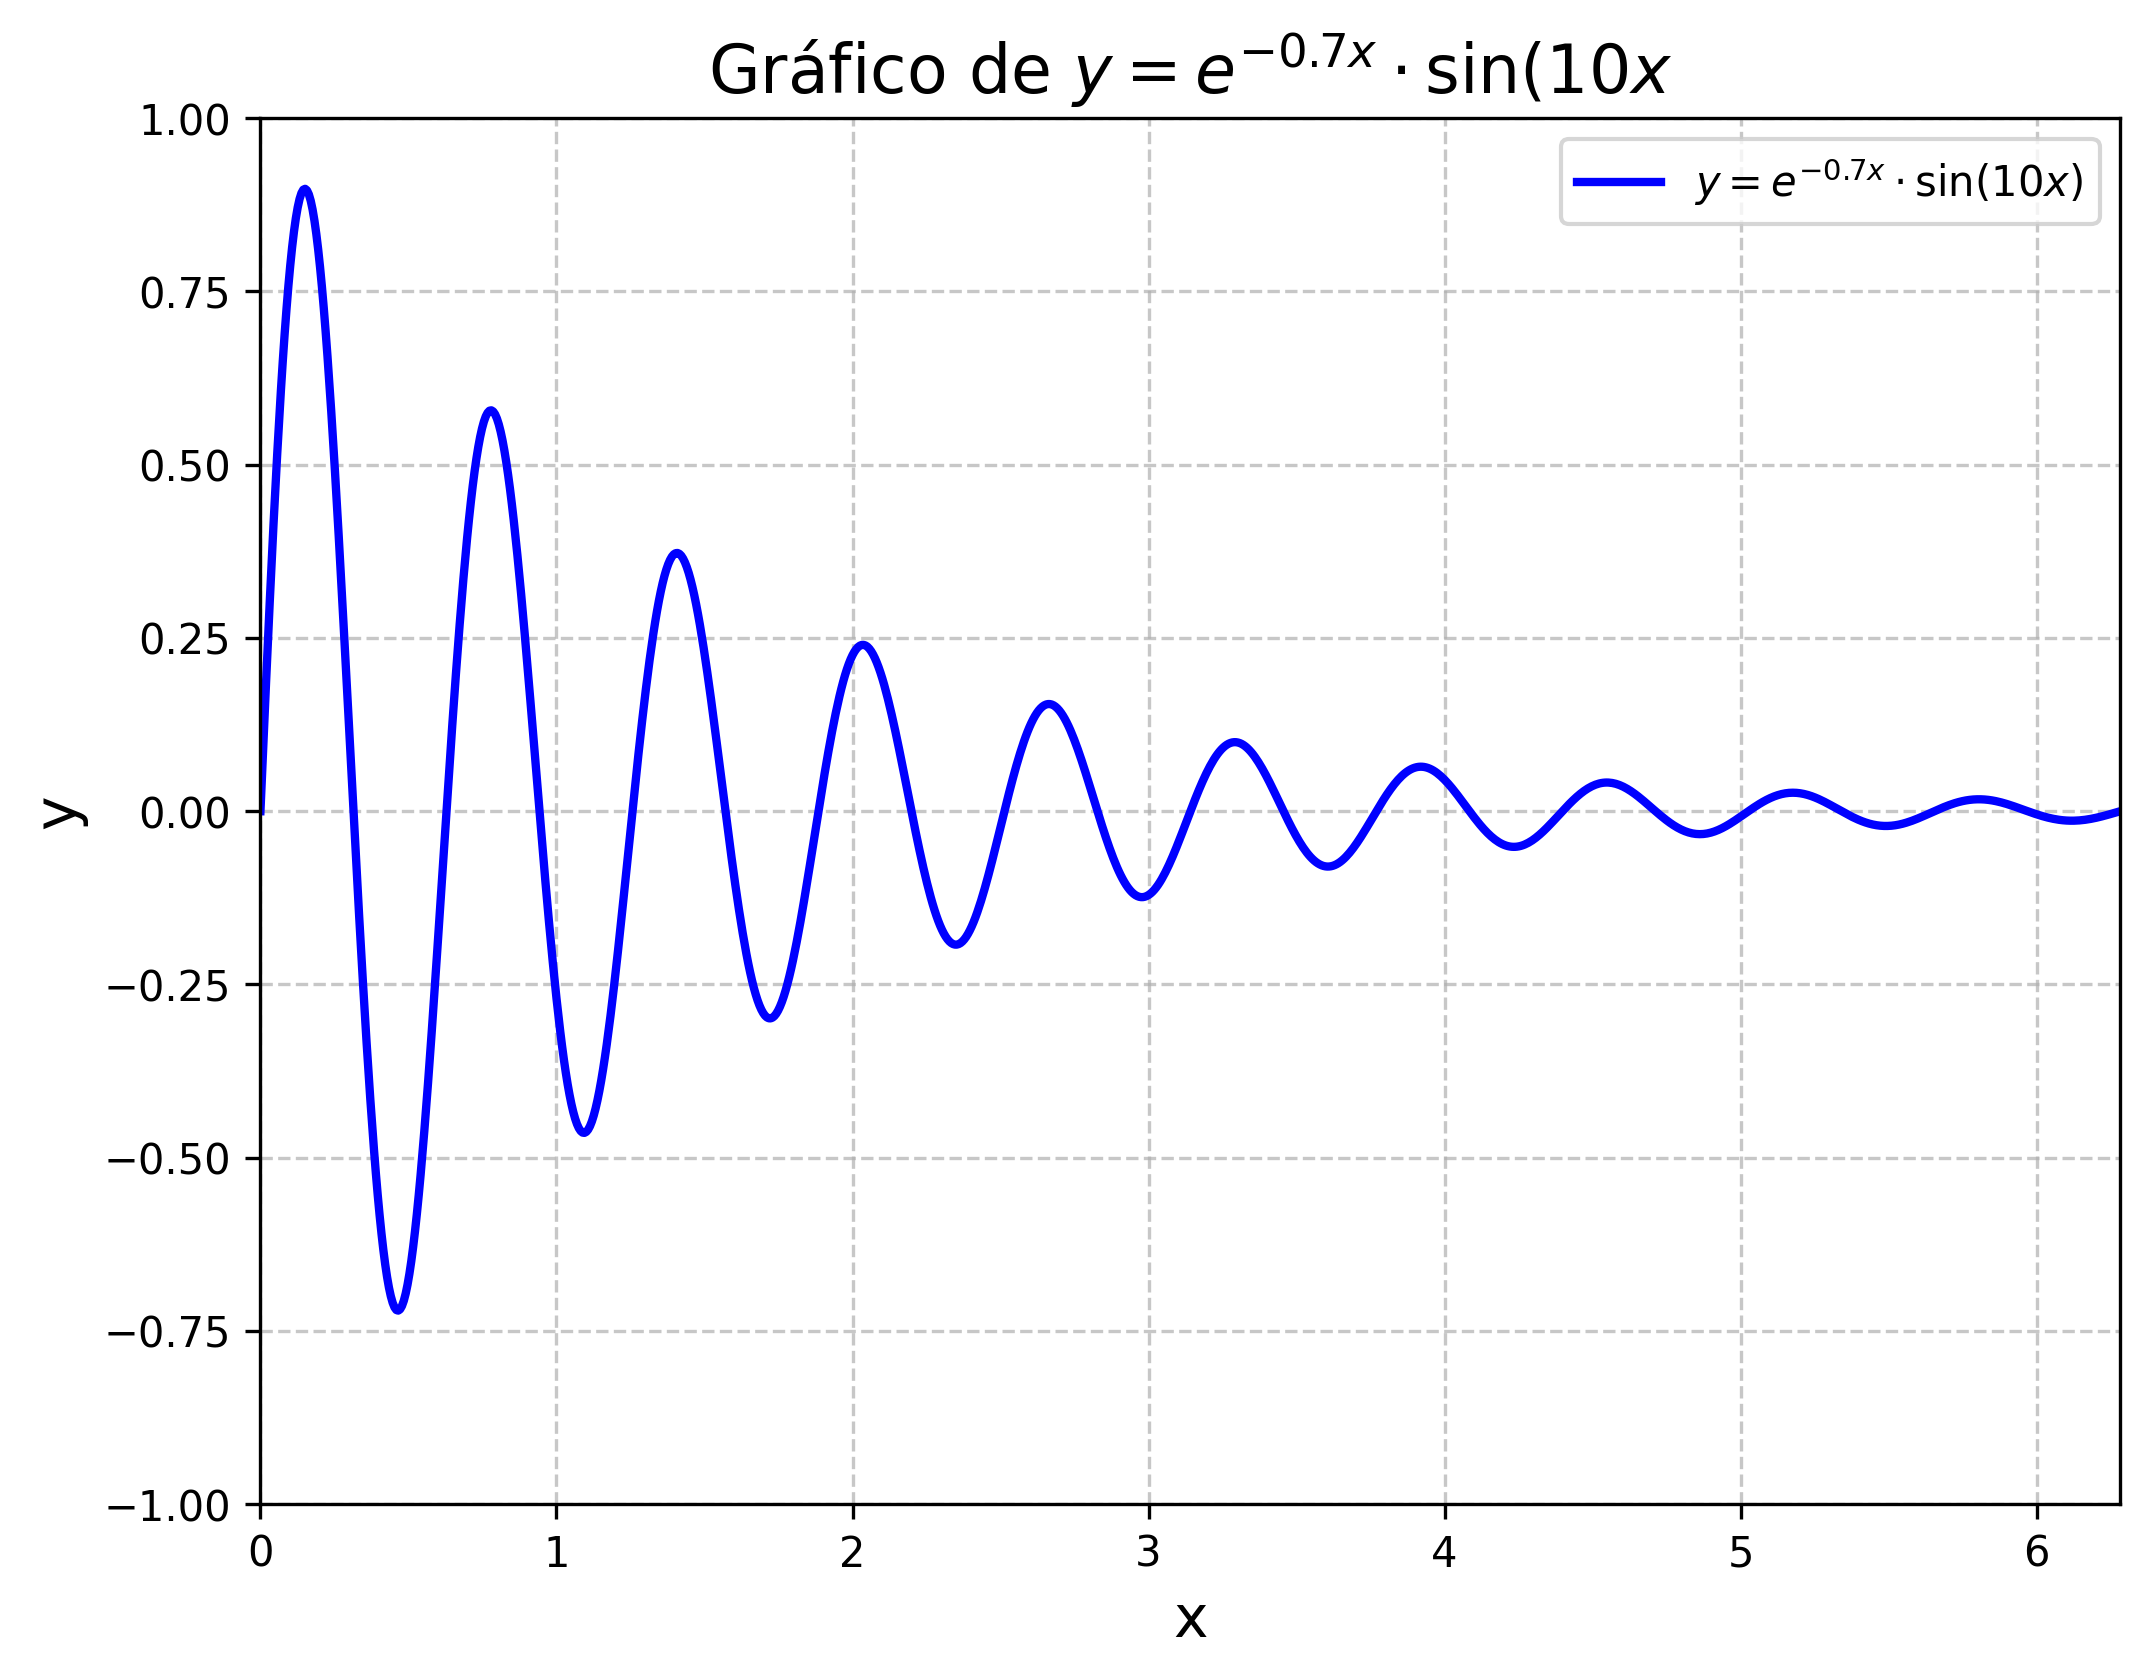

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de x
x = np.linspace(0, 2 * np.pi, 1000)

# Definir los parámetros alpha y beta
alpha = 0.7
beta = 10

# Calcular y a partir de la fórmula dada
y = np.exp(-alpha * x) * np.sin(beta * x)

# Crear el gráfico con personalización
plt.figure(figsize=(8, 6))

# Personalizar la línea: color, estilo y ancho de línea
plt.plot(x, y, label='$y = e^{-0.7x} \cdot \sin(10x)$', color='b', linestyle='-', linewidth=2)

# Personalizar el título y etiquetas de ejes
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Gráfico de $y = e^{-0.7x} \cdot \sin(10x}$', fontsize=16)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar una leyenda
plt.legend()

# Personalizar los límites de los ejes
plt.xlim(0, 2 * np.pi)
plt.ylim(-1, 1)

# Mostrar el gráfico
plt.show()

### **Tipos de Gráficos**

Mediante matplotlib podemos hacer prácticamente cualquier tipo de gráfico. En esta sección haremos un repaso por algunos de ellos.

**Gráficos de barras**

In [59]:
import pandas as pd

In [60]:
df = pd.read_excel('../data/medals.xlsx')
df.head()

/home/puma/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [61]:
df.rename(columns={'Team/NOC': 'Country'}, inplace=True)
df.set_index('Country', inplace=True)

df.head()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3


> **Importante**
>
>Para la carga de ficheros Excel, es necesario instalar un paquete adicional denominado `openpyxl`.

A continuación crearemos un gráfico de barras con las medallas de oro, plata y bronce de los 10 primeros países ordenados por su ranking. Lo primero será crear el subconjunto de datos sobre el que vamos a trabajar. Hay muchas maneras de hacerlo. Una de ellas:

In [62]:
df_best = df.nsmallest(10, 'Rank')

df_best

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3
Australia,6,17,7,22,46,6
Netherlands,7,10,12,14,36,9
France,8,10,12,11,33,10
Germany,9,10,11,16,37,8


Ahora ya podemos centrarnos en el diseño del gráfico de barras:

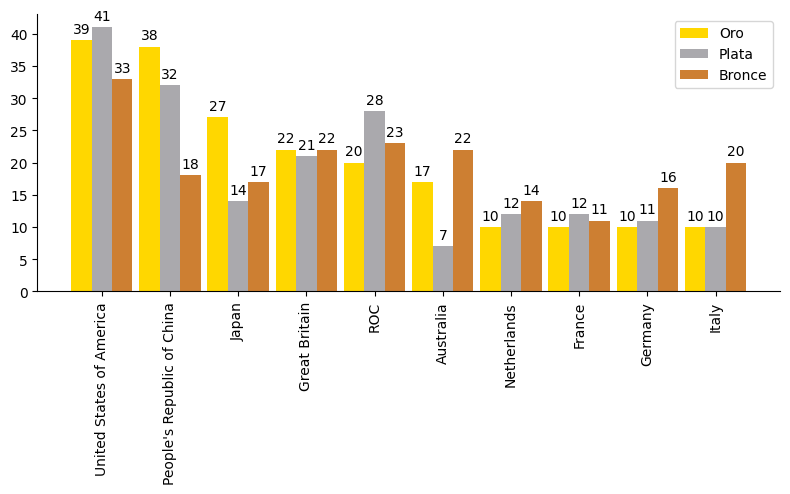

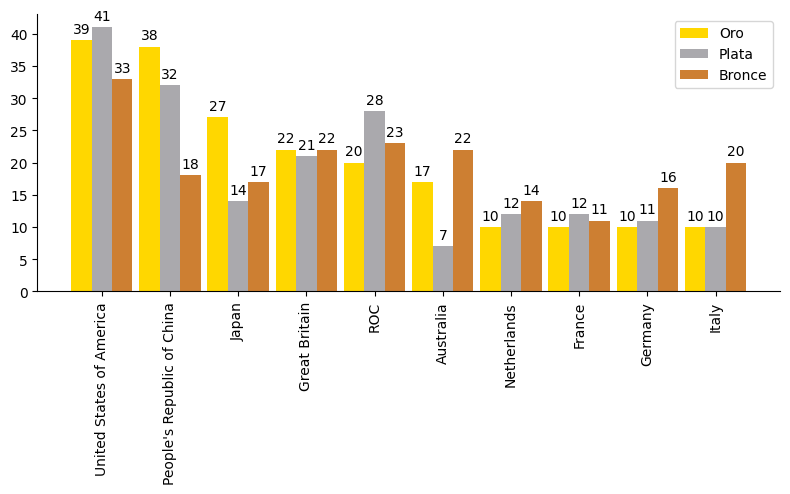

In [63]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)  # 800x500 px

bar_width = 0.30
x = np.arange(df_best.index.size)

golden_medals = ax.bar(x - bar_width, df_best['Gold'],
                       bar_width, label='Oro', color='#ffd700')
silver_medals = ax.bar(x, df_best['Silver'],
                       bar_width, label='Plata', color='#aaa9ad')
bronze_medals = ax.bar(x + bar_width, df_best['Bronze'],
                       bar_width, label='Bronce', color='#cd7f32')

ax.set_xticks(x)
ax.set_xticklabels(df_best.index, rotation=90)
ax.legend()

# Etiquetas en barras
ax.bar_label(golden_medals, padding=3)
ax.bar_label(silver_medals, padding=3)
ax.bar_label(bronze_medals, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura
fig

**Gráficos de dispersión**

Para este gráfico vamos a usar un «dataset» de jugadores de la NBA extraído desde esta página de Kaggle. El fichero nba-data.csv contiene información desde 1996 hasta 2019.

En primer lugar cargamos los datos y nos quedamos con un subconjunto de las columnas:

In [64]:
df = pd.read_csv('../data/nba-data.csv', usecols=['pts', 'reb', 'ast'])

df.head()

,pts,reb,ast
0,4.8,4.5,0.5
1,0.3,0.8,0.0
2,4.5,1.6,0.9
3,7.8,4.4,1.4
4,3.7,1.6,0.5


In [65]:
df.shape

(11700, 3)

El objetivo es crear un gráfico de dispersión en el relacionaremos los puntos anotados con los rebotes capturados, así como las asistencias dadas:

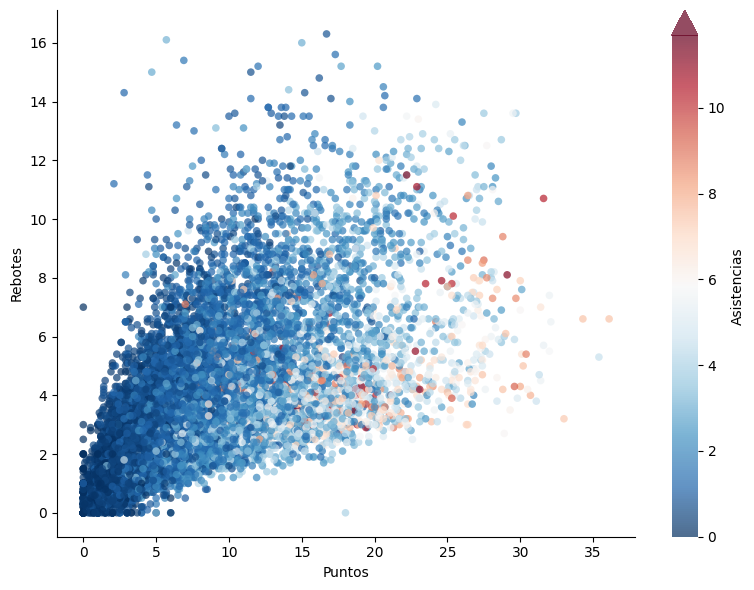

In [66]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px

# Crear variables auxiliares
x = df['pts']
y = df['reb']
colors = df['ast']

p = ax.scatter(x, y,
               s=30,  # tamaño de los puntos
               c=colors, cmap='RdBu_r',  # colores
               vmin=colors.min(), vmax=colors.max(),  # normalización de colores
               alpha=0.7,
               edgecolors='none')

# Barra de colores
cb = fig.colorbar(p, ax=ax, label='Asistencias', extend='max')
cb.outline.set_visible(False)

ax.set_xlabel('Puntos')
ax.set_ylabel('Rebotes')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Del gráfico anterior cabe destacar varios aspectos:

* **Normalización:** Cuando aplicamos una estética de color al gráfico basada en los datos de una variable, debemos normalizar dicha variable en el mapa de color («colormap») que elijamos. Para ello, matplotlib nos ofrece la normalización de mapas de color. En el caso concreto de `scatter()` pasaríamos esta normalización mediante el parámetro norm pero también podemos usar los parámetros `vmin` y `vmax`.

* **Barra de color:** Se trata de una leyenda particular en la que mostramos el gradiente de color vinculado a una determinada estética/variable del gráfico. Matplotlib también nos permite personalizar estas barras de color.

**Histogramas**

En esta ocasión vamos a trabajar con un «dataset» de «Avengers» extraído desde Kaggle. Hemos descargado el fichero avengers.csv.

Como punto de partida vamos a cargar la información y a quedarnos únicamente con la columna que hace referencia al año en el que se crearon los personajes:

In [67]:
df = pd.read_csv('../data/avengers.csv', usecols=['Year'])

df.head()

,Year
0,1963
1,1963
2,1963
3,1963
4,1963


In [68]:
df.shape

(173, 1)

Igualmente haremos un pequeño filtrado para manejar sólo registros a partir de 1960:

In [69]:
df = df[df['Year'] >= 1960]

df.shape

(159, 1)

Ahora ya podemos construir el histograma, que va a representar las frecuencias absolutas de creación de personajes Marvel según su año de creación.

Aunque es posible indicar un número determinado de contenedores («bins»), en este caso vamos a especificar directamente los intervalos (cada 5 años):

In [70]:
df['Year'].min(), df['Year'].max()

(1963, 2015)

In [71]:
bins = range(1960, 2021, 5)

Y a continuación el código necesario para montar el gráfico:

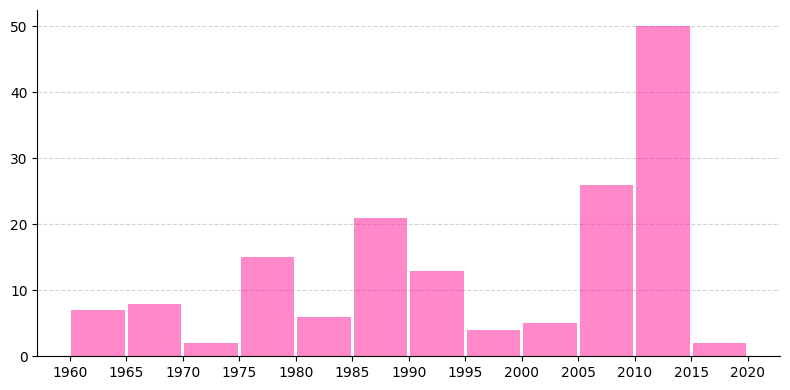

In [72]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400 px

ax.hist(df,
        bins=bins,     # intervalos de agrupación
        rwidth=0.95,   # ancho de cada barra
        zorder=2,      # barras por encima de rejilla
        color='deeppink',
        alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(bins)  # etiquetas de intervalos en el eje x
ax.yaxis.grid(color='lightgray', linestyle='--')  # rejilla

fig.tight_layout()

Descargo de responsabilidad: Técnicamente este gráfico no es un histograma ya que los años (fechas en general) no representan categorías válidas, pero sirve a efectos demostrativos de cómo se construyen este tipo de diagramas.

**Gráficos para series temporales**

Vamos a trabajar con un conjunto de datos extraído desde esta página de Kaggle que contiene información histórica de temperaturas del planeta Tierra. El fichero global-temperatures.csv se ha descargado para su tratamiento.

En primer lugar cargamos los datos, renombramos las columnas y eliminamos los valores nulos:

In [73]:
df = pd.read_csv('../data/global-temperatures.csv',
                 parse_dates=['dt'],  # conversión a tipo datetime
                 usecols=['dt', 'LandAverageTemperature'])

df.rename(columns={'dt': 'when', 'LandAverageTemperature': 'temp'}, inplace=True)
df.dropna(inplace=True)

df.head()

,when,temp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [74]:
df.shape

(3180, 2)

A continuación montamos un gráfico en el que se representan todas las mediciones históricas de la temperatura media global del planeta y añadimos una línea de tendencia:

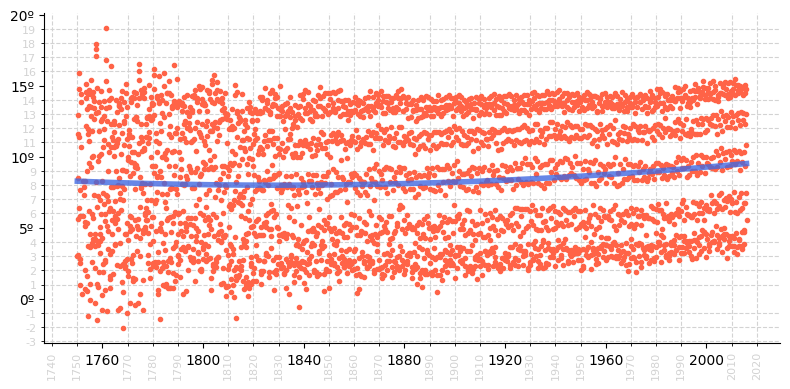

In [75]:
# Necesitamos algunas utilidades de gestión de fechas
from matplotlib.dates import YearLocator, DateFormatter, date2num
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400 px

# Alias para simplificar el acceso
x = df.when
y = df.temp

ax.plot(x, y,
        linestyle='None', marker='.', color='tomato',  # estilo de línea
        zorder=2)  # orden para colocar sobre rejilla

# Construcción de la línea de tendencia
x = date2num(x)
z = np.polyfit(x, y, 2)  # ajuste polinómico de grado 2
p = np.poly1d(z)
plt.plot(x, p(x), linewidth=4, alpha=0.8, color='royalblue')

# Formateo de los ejes
ax.xaxis.set_minor_locator(YearLocator(10))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', which='minor',
               labelsize=8, labelcolor='lightgray', rotation=90)
ax.xaxis.grid(which='minor', color='lightgray', linestyle='dashed')
ax.yaxis.set_major_formatter('{x:.0f}º')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='y', which='minor',
               labelsize=8, labelcolor='lightgray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightgray')
ax.yaxis.set_minor_formatter('{x:.0f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightgray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

**Mapas de calor**

Para este tipo de gráfico vamos a utilizar un «dataset» que recoge las 1000 películas más valoradas en IMDB. Está sacado desde esta página de Kaggle y se ha descargado el fichero de datos en imdb-top-1000.csv.

En primer lugar vamos a cargar los datos quedándonos con las columnas Certificate (clasificación de la película según edades), Genre (géneros de la película) e IMDB_Rating (valoración de la película en IMDB):

In [76]:
df = pd.read_csv('../data/imdb-top-1000.csv',
                 usecols=['Certificate', 'Genre', 'IMDB_Rating'])

df.head()

,Certificate,Genre,IMDB_Rating
0,A,Drama,9.3
1,A,"Crime, Drama",9.2
2,UA,"Action, Crime, Drama",9.0
3,A,"Crime, Drama",9.0
4,U,"Crime, Drama",9.0


Ahora creamos una nueva columna en el DataFrame donde guardaremos únicamente el género principal de cada película:

In [77]:
df['Main_Genre'] = df['Genre'].str.split(',', expand=True)[0]

df.head()

,Certificate,Genre,IMDB_Rating,Main_Genre
0,A,Drama,9.3,Drama
1,A,"Crime, Drama",9.2,Crime
2,UA,"Action, Crime, Drama",9.0,Action
3,A,"Crime, Drama",9.0,Crime
4,U,"Crime, Drama",9.0,Crime


A continuación agrupamos y obtenemos los valores medios de las valoraciones:

In [78]:
# unstack permite disponer la agrupación en forma tabular (para el heatmap)
ratings = df.groupby(['Certificate', 'Main_Genre'])['IMDB_Rating'].mean().unstack()

# Nos quedamos con un subconjunto de certificados y géneros
review_certificates = ['U', 'UA', 'PG-13', 'R', 'A']
review_genres = ['Animation', 'Action', 'Adventure', 'Biography',
                 'Comedy', 'Crime', 'Drama']
ratings = ratings.loc[review_certificates, review_genres]

# Recodificamos los certificados (clasificación) con códigos más entendibles
certs_description = {'U': 'ALL', 'UA': '>12', 'PG-13': '>13', 'R': '>17', 'A': '>18'}
ratings.index = ratings.reset_index()['Certificate'].replace(certs_description)

ratings

Main_Genre,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
ALL,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
>12,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
>13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
>17,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
>18,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


Ahora ya podemos construir el mapa de calor usando el DataFrame ratings generado previamente:

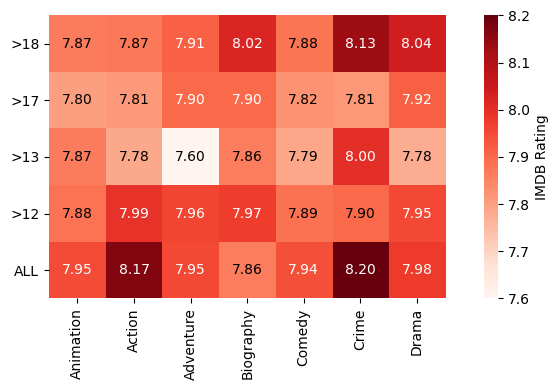

In [79]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

text_colors = ('black', 'white')
im = ax.imshow(ratings, cmap='Reds')  # mapa de calor
cbar = fig.colorbar(im, ax=ax, label='IMDB Rating')  # leyenda
cbar.outline.set_visible(False)

x = ratings.columns
y = ratings.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = ratings.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(j, i, f'{value:.2f}', color=text_color, va='center', ha='center')

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()

ax.spines[:].set_visible(False)

fig.tight_layout()

**Diagramas de caja**

Un diagrama de caja permite visualizar la distribución de los valores de manera rápida y muy visual:

![Diagrama de Caja](../img/caja.png "Diagrama de Caja")


Para mostrar el funcionamiento de los diagramas de caja en Matplotlib vamos a hacer uso de distintas distribuciones aleatorias que crearemos mediante funciones de Numpy:

In [80]:
DIST_SIZE = 100  # tamaño de la muestra

boxplots = []

boxplots.append(dict(
    dist=np.random.normal(0, 1, size=DIST_SIZE),
    label='Normal\n$\mu=0, \sigma=1$',
    fill_color='pink',
    brush_color='deeppink'))

boxplots.append(dict(
    dist=np.random.geometric(0.4, size=DIST_SIZE),
    label='Geometric\n$p=0.4$',
    fill_color='lightblue',
    brush_color='navy'))

boxplots.append(dict(
    dist=np.random.chisquare(2, size=DIST_SIZE),
    label='Chi-squared\n$df=2$',
    fill_color='lightgreen',
    brush_color='darkgreen'))

Ahora ya podemos construir el gráfico de cajas que nos permite visualizar la distribución de las muestras:

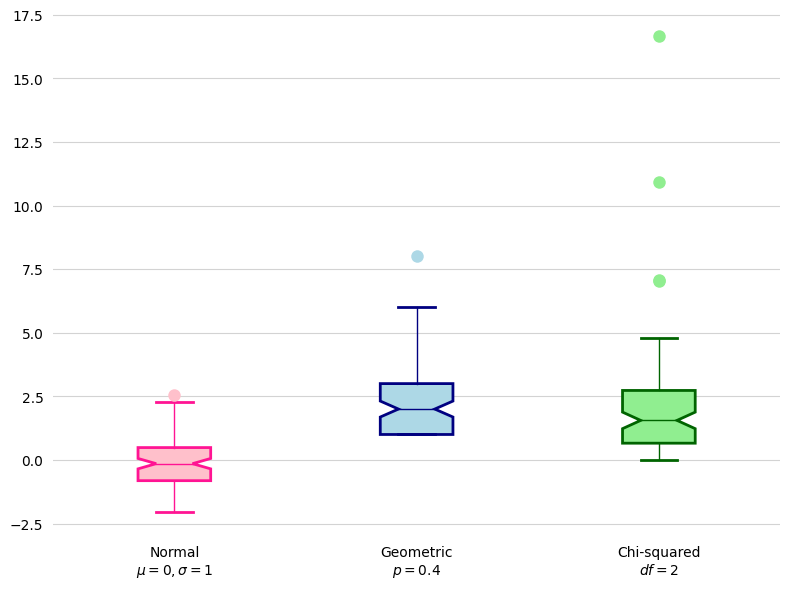

In [81]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px

for i, boxplot in enumerate(boxplots):
    fcolor, bcolor = boxplot['fill_color'], boxplot['brush_color']
    ax.boxplot(boxplot['dist'],
               labels=[boxplot['label']],
               positions=[i],
               widths=[.3],
               notch=True,
               patch_artist=True,
               boxprops=dict(edgecolor=bcolor,
                             facecolor=fcolor,
                             linewidth=2),
               capprops=dict(color=bcolor, linewidth=2),
               flierprops=dict(color=bcolor,
                               markerfacecolor=fcolor,
                               linestyle='none',
                               markeredgecolor='none',
                               markersize=9),
               medianprops=dict(color=bcolor),
               whiskerprops=dict(color=bcolor,
                                 linewidth=1))

ax.yaxis.grid(color='lightgray')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines[:].set_visible(False)

fig.tight_layout()

> **Consejo**
>
> El código para preparar el gráfico se ha complicado porque se ha incidido en mejorar la estética. En cualquier caso, una vez hecho, se puede refactorizar en una función y reutilizarlo para futuros trabajos.

**Gráficos de evolución**

Partiendo de un conjunto de datos temporales, vamos a aprovechar para elaborar un gráfico de evolución del precio de criptomonedas. En esta ocasión hemos utilizado el «dataset» eth-usd.csv descargado desde esta página de Kaggle. Contiene la valoración de la criptomoneda Ethereum en función de una marca temporal, así como el volumen de «moneda» existente en cada momento.

El objetivo será crear un gráfico que represente el valor de la criptomoneda (a lo largo del tiempo) en contraposición al volumen de unidades.

Lo primero que haremos, además de cargar los datos, será lo siguiente:

* Seleccionar las columnas Date (fecha de referencia), Open (precio de la moneda a la apertura) y Volume (volumen de moneda).

* Parsear el campo fecha.

* Filtrar sólo aquellos registros a partir del 1 de enero de 2017 (por simplicidad).

* Dividir la columna de volumen por 10M de cara a equiparar cantidades con la valoración (ajuste de gráfico).

* Aplicar una media móvil para suavizar las curvas a representar.

In [82]:
import datetime

df = pd.read_csv('../data/eth-usd.csv',
                  parse_dates=['Date'],
                  usecols=['Date', 'Open', 'Volume'],
                  index_col='Date')

min_date = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > min_date]

df['Volume'] /= 1e7

df_smooth = df.rolling(20).mean().dropna()

df_smooth.head()

,Open,Volume
Date,,
2017-01-21,9.968611,2.146882
2017-01-22,10.105573,2.117377
2017-01-23,10.222339,1.985587
2017-01-24,10.273270,1.821968
2017-01-25,10.239854,1.647938


Ahora ya podemos montar el gráfico dedicando algo de esfuerzo a la parte estética:

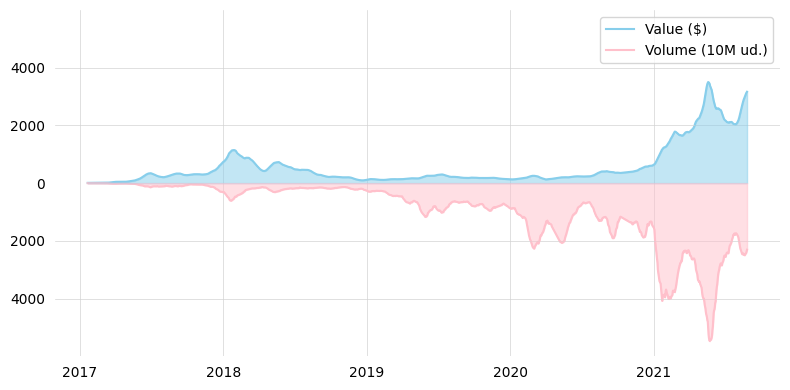

In [83]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400px

# Alias para facilitar el acceso
x = df_smooth.index
y_open = df_smooth['Open']
y_vol = df_smooth['Volume']

# Líneas de evolución
ax.plot(x, y_open, label='Value ($)', color='skyblue', linewidth=1.5)
ax.plot(x, -y_vol, label='Volume (10M ud.)', color='pink', linewidth=1.5)
# Relleno del área
plt.fill_between(x, y_open, alpha=0.5, color='skyblue', zorder=3)
plt.fill_between(x, -y_vol, alpha=0.5, color='pink', zorder=3)

# Formateo de los ejes
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
y_ticks = [-4000, -2000, 0, 2000, 4000]
y_tick_labels = ['4000', '2000', '0', '2000', '4000']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-6000, 6000)

# Rejilla
ax.xaxis.grid(color='lightgray', linewidth=.5)
for y_tick in y_ticks:
    if y_tick != 0:
        ax.axhline(y_tick, color='lightgray', linewidth=.5)

ax.legend()
ax.spines[:].set_visible(False)

fig.tight_layout()

| **Inicio** | **Siguiente 2** |
|----------- |---------------|
| [🏠](../../README.md) | [⏩](./2_Pandas.ipynb)|